In [66]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from sklearn.cluster import KMeans
import geopandas as gpd
import pycountry

In [67]:
#open dataset.csv
df = pd.read_csv('dataset/dataset.csv')

#count row with geo.country = None
#print(df['geo.country_code'].isnull().sum())

#count to each column if there are null values for row
#print(df.isnull().sum())
#drop rows with geo.country = None
#df = df.dropna(subset=['geo.country_code'])

#print the number of rows and columns
#print(df.shape)
#print(df['geo.country_code'].value_counts())

In [68]:
#view number of rows and columns
#print(df.shape)
#view first 5 rows
#display(df.head(10))

In [69]:
#plot the number of tweet to every year from created_at column and geo.country column
#df['created_at'] = pd.to_datetime(df['created_at'])
#df['year'] = df['created_at'].dt.year
#df['year'].value_counts().sort_index().plot(kind='bar')
#plt.title('Number of tweets to every year')
#plt.xlabel('Year')
#plt.ylabel('Number of tweets')
#plt.show()

In [70]:
continent_mapping = {
    'Africa': ['NG', 'ZA', 'EG', 'KE', 'DZ', 'MA', 'ET', 'TZ', 'GH', 'AO',
               'CI', 'CM', 'TN', 'UG', 'MZ', 'SN', 'MG', 'ZM', 'SD', 'ZW',
               'NA', 'MW', 'BW', 'ML', 'MR'],
    'Asia': ['CN', 'IN', 'ID', 'PK', 'BD', 'JP', 'PH', 'VN', 'TR', 'IR',
             'TH', 'MM', 'KR', 'IQ', 'AF', 'SA', 'UZ', 'YE', 'NP', 'MY',
             'LK', 'KP', 'KZ', 'SY', 'KH'],
    'Europe': ['RU', 'DE', 'GB', 'FR', 'IT', 'ES', 'UA', 'PL', 'RO',
               'NL', 'BE', 'GR', 'PT', 'CZ', 'HU', 'SE', 'BY', 'AT',
               'CH', 'BG', 'RS', 'DK', 'FI', 'SK', 'NO'],
    'North America': ['US', 'CA', 'MX', 'CU', 'HT', 'DO', 'JM', 'HN',
                      'SV', 'CR', 'NI', 'PA', 'GT', 'BS', 'TT', 'BZ',
                      'BB', 'HT', 'KN', 'AG', 'DM', 'LC', 'VC', 'GD'],
    'Oceania': ['AU', 'PG', 'NZ', 'FJ', 'SB', 'WS', 'FM', 'VU', 'KI',
                'TO', 'PW', 'MH', 'NR', 'TV', 'NU', 'CK', 'KI', 'AS',
                'TK', 'WF', 'PN', 'PF', 'GU', 'NR', 'TV']
}

inverted_mapping = {code: continent for continent, codes in continent_mapping.items() for code in codes}
df['Continent'] = df['geo.country_code'].map(inverted_mapping)
grouped = df.groupby('Continent')

In [71]:
continent_mapping = {
    'Africa': ['NG', 'ZA', 'EG', 'KE', 'DZ', 'MA', 'ET', 'TZ', 'GH', 'AO',
               'CI', 'CM', 'TN', 'UG', 'MZ', 'SN', 'MG', 'ZM', 'SD', 'ZW',
               'NA', 'MW', 'BW', 'ML', 'MR'],
    'Asia': ['CN', 'IN', 'ID', 'PK', 'BD', 'JP', 'PH', 'VN', 'TR', 'IR',
             'TH', 'MM', 'KR', 'IQ', 'AF', 'SA', 'UZ', 'YE', 'NP', 'MY',
             'LK', 'KP', 'KZ', 'SY', 'KH'],
    'Europe': ['RU', 'DE', 'GB', 'FR', 'IT', 'ES', 'UA', 'PL', 'RO',
               'NL', 'BE', 'GR', 'PT', 'CZ', 'HU', 'SE', 'BY', 'AT',
               'CH', 'BG', 'RS', 'DK', 'FI', 'SK', 'NO'],
    'North America': ['US', 'CA', 'MX', 'CU', 'HT', 'DO', 'JM', 'HN',
                      'SV', 'CR', 'NI', 'PA', 'GT', 'BS', 'TT', 'BZ',
                      'BB', 'HT', 'KN', 'AG', 'DM', 'LC', 'VC', 'GD'],
    'Oceania': ['AU', 'PG', 'NZ', 'FJ', 'SB', 'WS', 'FM', 'VU', 'KI',
                'TO', 'PW', 'MH', 'NR', 'TV', 'NU', 'CK', 'KI', 'AS',
                'TK', 'WF', 'PN', 'PF', 'GU', 'NR', 'TV'],
    'South America': ['BR', 'AR', 'CO', 'PE', 'VE', 'CL', 'EC', 'BO',
                      'GY', 'PY', 'UY', 'SR', 'GF']
}
inverted_mapping = {code: continent for continent, codes in continent_mapping.items() for code in codes}
df['Continent'] = df['geo.country_code'].map(inverted_mapping)
grouped = df.groupby('Continent')

In [72]:
#sum of likes, replies and retweets for every country in the continent
def plot_continent_sum(df, grouped):
    for continent, data in grouped:

        country_grouped = data.groupby('geo.country')
        likes_sum = country_grouped['public_metrics.like_count'].sum()
        reply_sum = country_grouped['public_metrics.reply_count'].sum()
        retweet_sum = country_grouped['public_metrics.retweet_count'].sum()
        quote_sum = country_grouped['public_metrics.quote_count'].sum()

        bar_width = 0.2
        index = np.arange(len(likes_sum.index))

        plt.figure(figsize=(30, 10))
        plt.bar(index, likes_sum.values, width=bar_width, label='Like')
        plt.bar(index + bar_width, reply_sum.values, width=bar_width, label='Risposte')
        plt.bar(index + 2 * bar_width, retweet_sum.values, width=bar_width, label='Retweet')
        plt.bar(index + 3 * bar_width, quote_sum.values, width=bar_width, label='Retweet con commento')
    
        #plt.title(f'Somma dei Like, risposte, retweet e citazioni - {continent}')
        plt.title(f'{continent}')
        plt.xlabel('Paese')
        plt.ylabel('Interazioni')
        plt.xticks(index, likes_sum.index, rotation='vertical')
        plt.legend()

#means of likes, replies and retweets for each country in the continent
def plot_continent_mean(df, grouped):
    for continent, data in grouped:

        country_grouped = data.groupby('geo.country')
        likes_mean = country_grouped['public_metrics.like_count'].mean()
        reply_mean = country_grouped['public_metrics.reply_count'].mean()
        retweet_mean = country_grouped['public_metrics.retweet_count'].mean()
        quote_mean = country_grouped['public_metrics.quote_count'].mean()
        
        bar_width = 0.2
        index = np.arange(len(likes_mean.index))

        plt.figure(figsize=(30, 10))
        plt.bar(index, likes_mean.values, width=bar_width, label='Like')
        plt.bar(index + bar_width, reply_mean.values, width=bar_width, label='Risposte')
        plt.bar(index + 2 * bar_width, retweet_mean.values, width=bar_width, label='Retweet')
        plt.bar(index + 3 * bar_width, quote_mean.values, width=bar_width, label='Retweet con commento')

        plt.title(f'Media dei Like, risposte, retweet e citazioni - {continent}')
       #plt.title(f'{continent}')
        plt.xlabel('Paese')
        plt.ylabel('Interazioni')
        plt.xticks(index, likes_mean.index, rotation='vertical')
        plt.legend()
       

In [73]:
def plot_daily_trends(df):
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['month'] = df_1['created_at'].dt.to_period('D')

    reply_counts = df['public_metrics.reply_count'].groupby(df['month']).sum()
    like_counts = df['public_metrics.like_count'].groupby(df['month']).sum()
    retweet_counts = df['public_metrics.retweet_count'].groupby(df['month']).sum()
    quote_counts = df['public_metrics.quote_count'].groupby(df['month']).sum()

    fig, ax = plt.subplots(figsize=(10, 10))
    like_counts.plot(kind='line', marker='o',  label='Like')
    reply_counts.plot(kind='line', marker='o', label='Risposte')
    retweet_counts.plot(kind='line',  marker='o', label='Retweet')
    quote_counts.plot(kind='line',  marker='o', label='Retweet con commento')   
    #ax.set_ylim(0, 100)
    plt.xlabel('Giorno')
    plt.ylabel('Numero')
    plt.title('Andamento dei Tweet, risposte, like e citazioni')
    plt.legend()
    plt.grid()

    plt.show()


#### Primo crollo 18/05/2020

In [74]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_1 = df[(df['created_at'] >= '2021-05-07') & (df['created_at'] <= '2021-05-19')]
df_1 = df_1.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count', 'public_metrics.quote_count'], ascending=False)

df_1 = df_1.reset_index(drop=True)
display (df_1.head(10))

,id,created_at,text,author.username,geo.country,geo.country_code,in_reply_to_user_id,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,Continent
0,1391523807148527620,2021-05-09T22:41:43.000Z,SpaceX launching satellite Doge-1 to the moon ...,elonmusk,NaN,NaN,NaN,508942,15749,34035,106990,NaN
1,1392602041025843203,2021-05-12T22:06:14.000Z,Tesla &amp; Bitcoin https://t.co/YSswJmVZhP,elonmusk,NaN,NaN,NaN,472939,50315,115370,70428,NaN
2,1392950720979030019,2021-05-13T21:11:46.000Z,"To be clear, I strongly believe in crypto, but...",elonmusk,NaN,NaN,NaN,347559,8152,54190,32174,NaN
3,1394724627566391297,2021-05-18T18:40:38.000Z,Big Pharma says they need to charge astronomic...,RepKatiePorter,NaN,NaN,NaN,223470,13674,8499,65801,NaN
4,1390522866979033092,2021-05-07T04:24:20.000Z,"Cryptocurrency is promising, but please invest...",elonmusk,NaN,NaN,NaN,210248,4617,17455,35113,NaN
5,1393595559705972739,2021-05-15T15:54:07.000Z,"You see all of the kids around me, they’re jus...",EoinHiggins_,NaN,NaN,NaN,101092,5796,1630,43929,NaN
6,1394170030741413888,2021-05-17T05:56:52.000Z,"@BTC_Archive To clarify speculation, Tesla has...",elonmusk,NaN,NaN,9.709945e+17,95142,7196,16689,16177,NaN
7,1393939232373280769,2021-05-16T14:39:45.000Z,just let her enjoy astrology dude u like talki...,bocxtop,NaN,NaN,NaN,91726,459,126,11378,NaN
8,1392657323965829123,2021-05-13T01:45:55.000Z,Elon probably did not research how much energy...,cz_binance,NaN,NaN,NaN,59828,1247,5000,11388,NaN
9,1394625128257007618,2021-05-18T12:05:16.000Z,MicroStrategy has purchased an additional 229 ...,saylor,NaN,NaN,NaN,57116,2096,3520,9895,NaN


In [75]:
#plot the number of tweet in every day from created_at between 2021/05/11 to 2021/05/24
#df['created_at'] = pd.to_datetime(df['created_at'])
#df['day'] = df['created_at'].dt.day
#df['day'].value_counts().sort_index().plot(kind='bar')
#plt.title('Number of tweets in every day')
#plt.xlabel('Day')
#plt.ylabel('Number of tweets')
#plt.show()



In [76]:
#create a plot with the id of twitter and the number of likes, retweets and replies
#df=pd.DataFrame(df,columns=["id","public_metrics.like_count","public_metrics.reply_count","public_metrics.retweet_count"])
#df.plot(x="id", y=["public_metrics.like_count","public_metrics.reply_count","public_metrics.retweet_count"], kind="bar")
#plt.title('')
#plt.xlabel('Id')
#plt.ylabel('Number of likes, replies and retweets')
#plt.show()



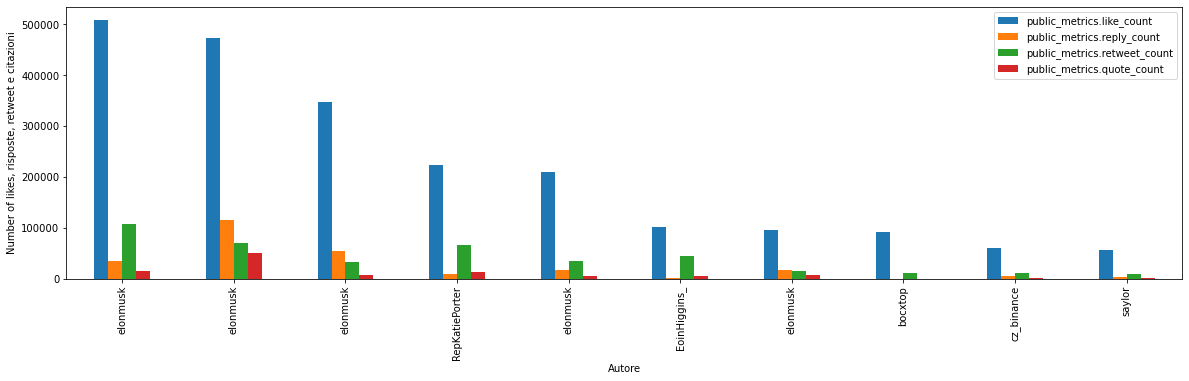

In [77]:
df1_sorted = df_1.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count', 'public_metrics.quote_count'], ascending=False)
df1_top10 = df1_sorted.head(10)

df1_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count', 'public_metrics.quote_count'], kind='bar', figsize=(20,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, risposte, retweet e citazioni')
plt.show()

------------------ MEAN ------------------


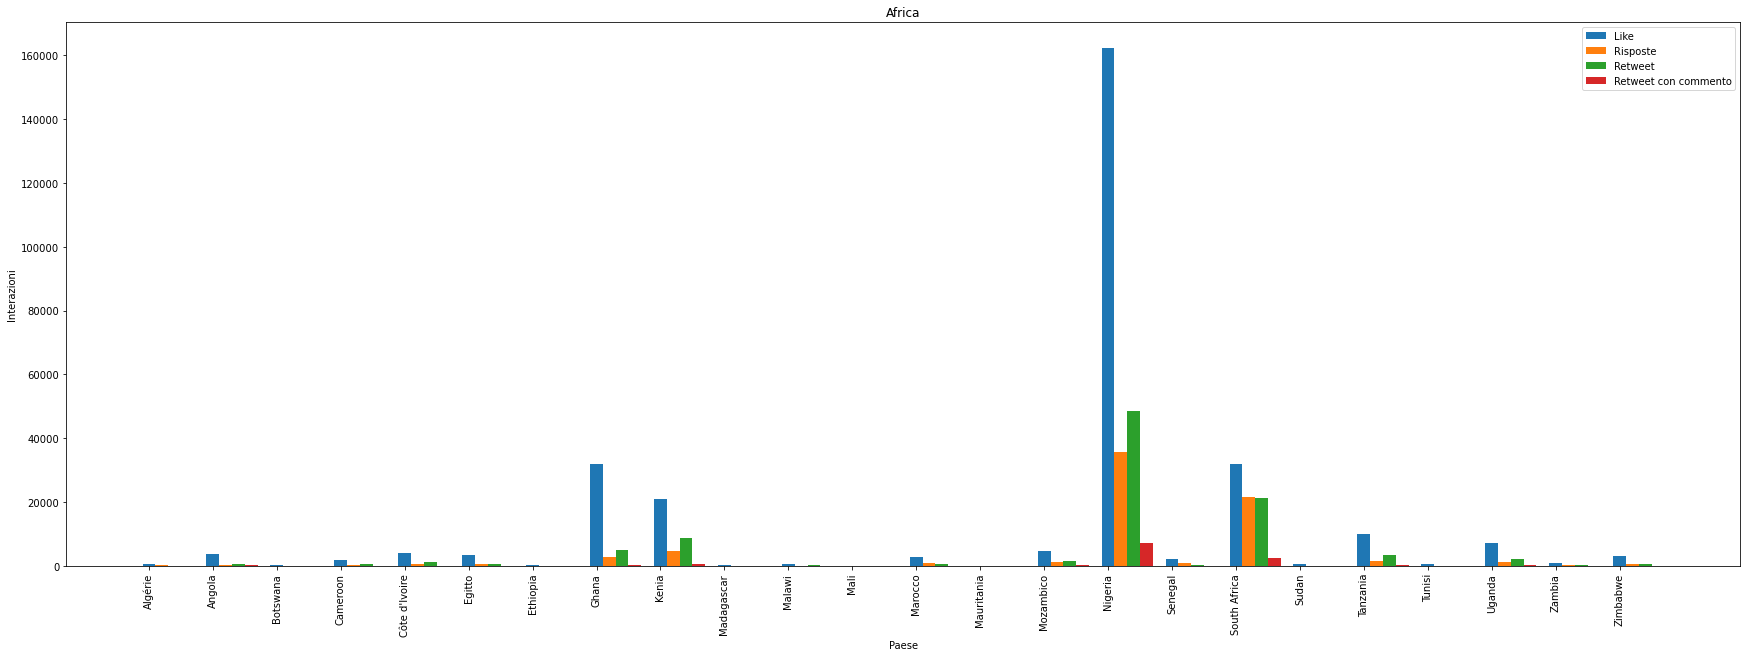

/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIF

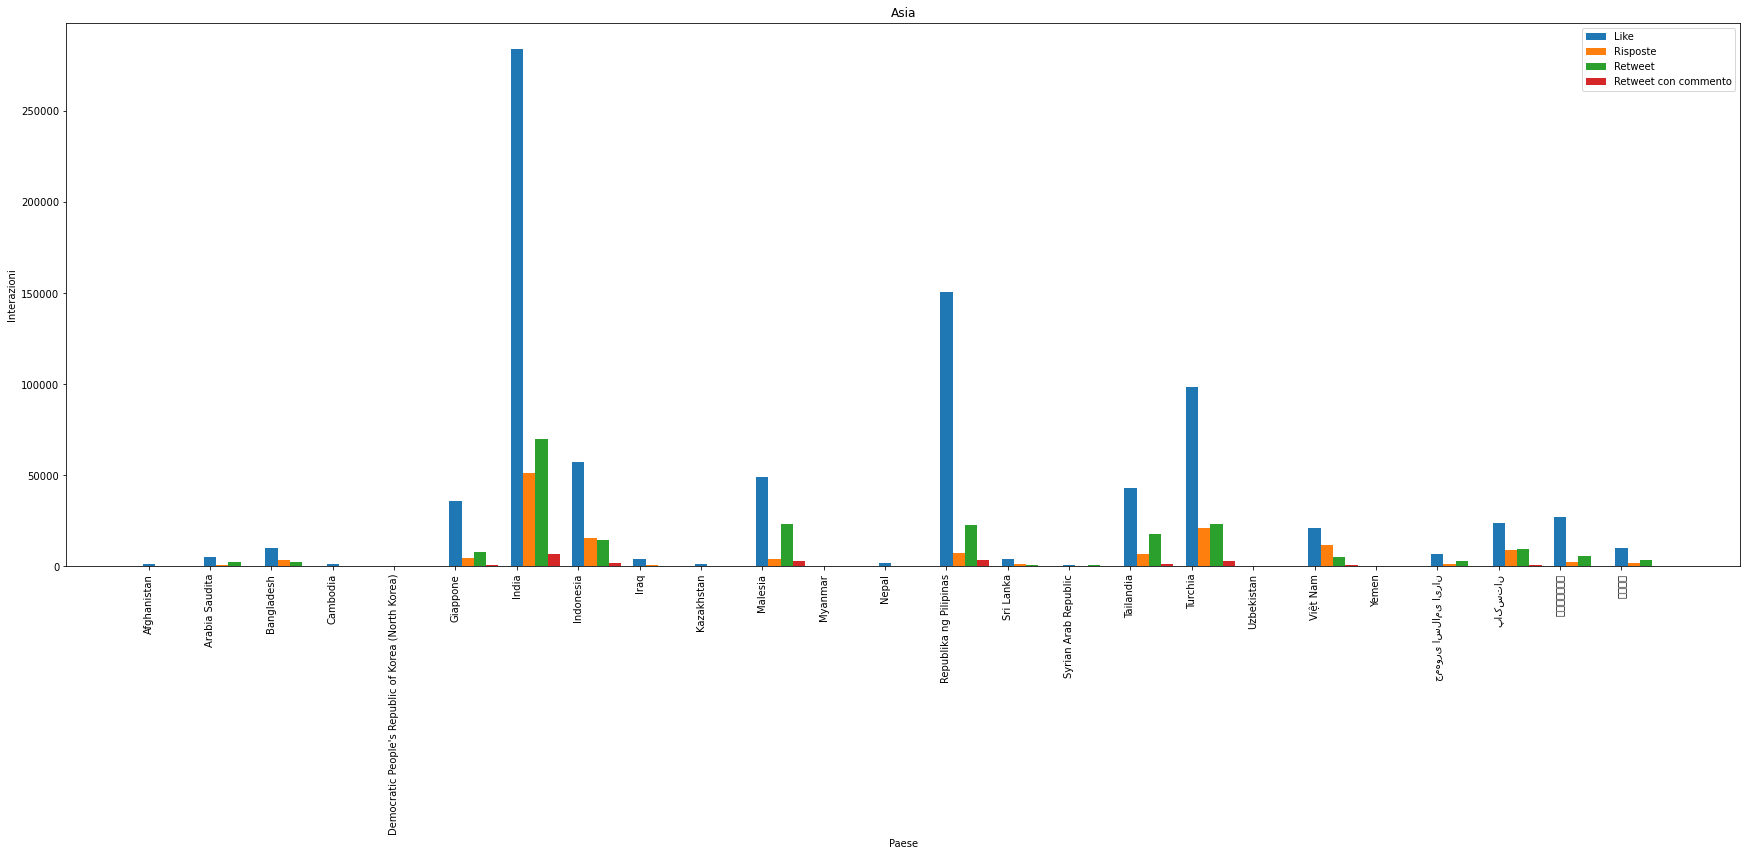

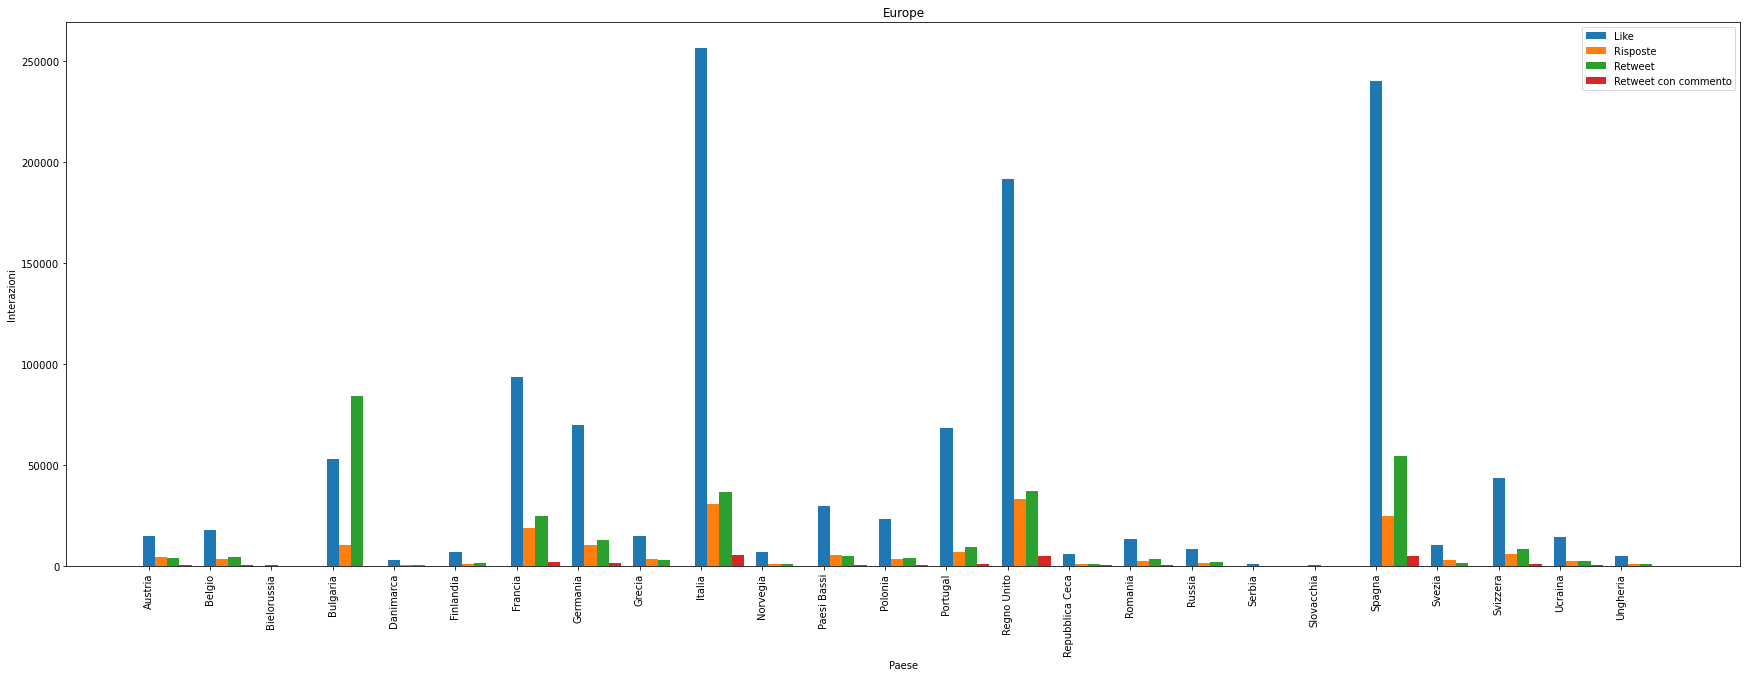

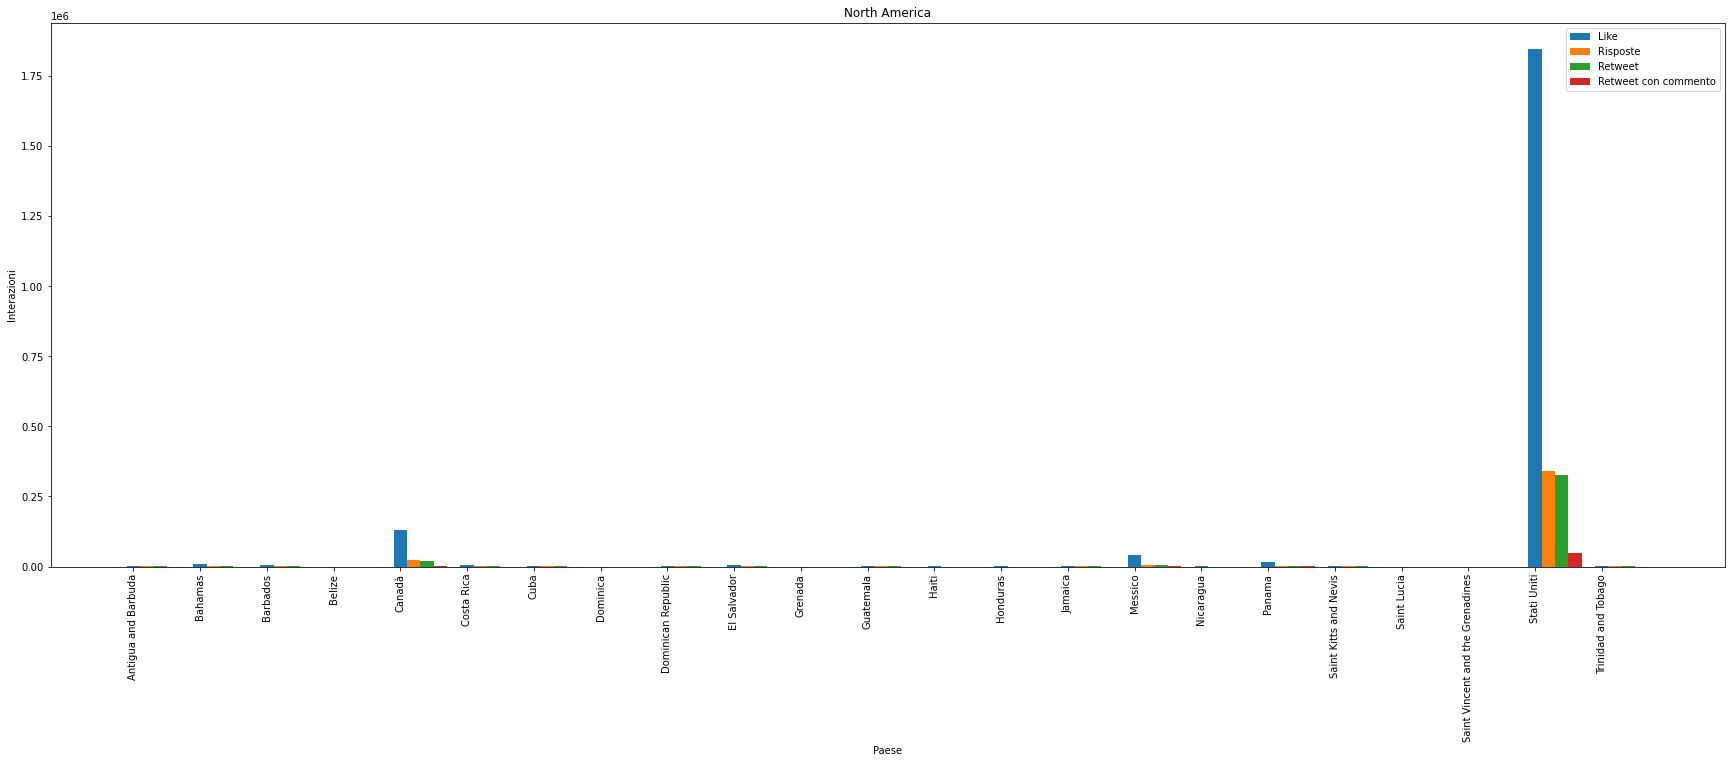

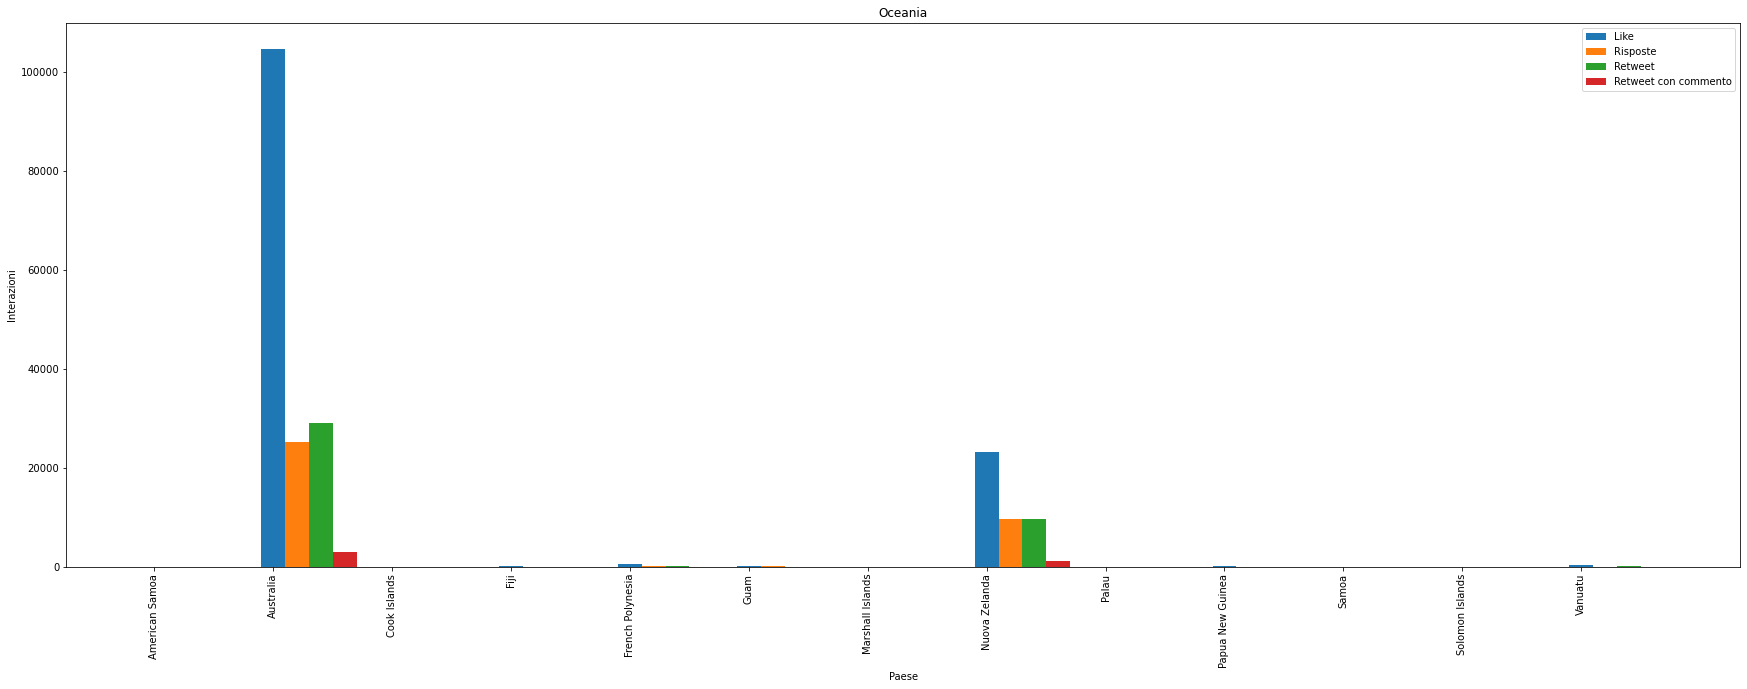

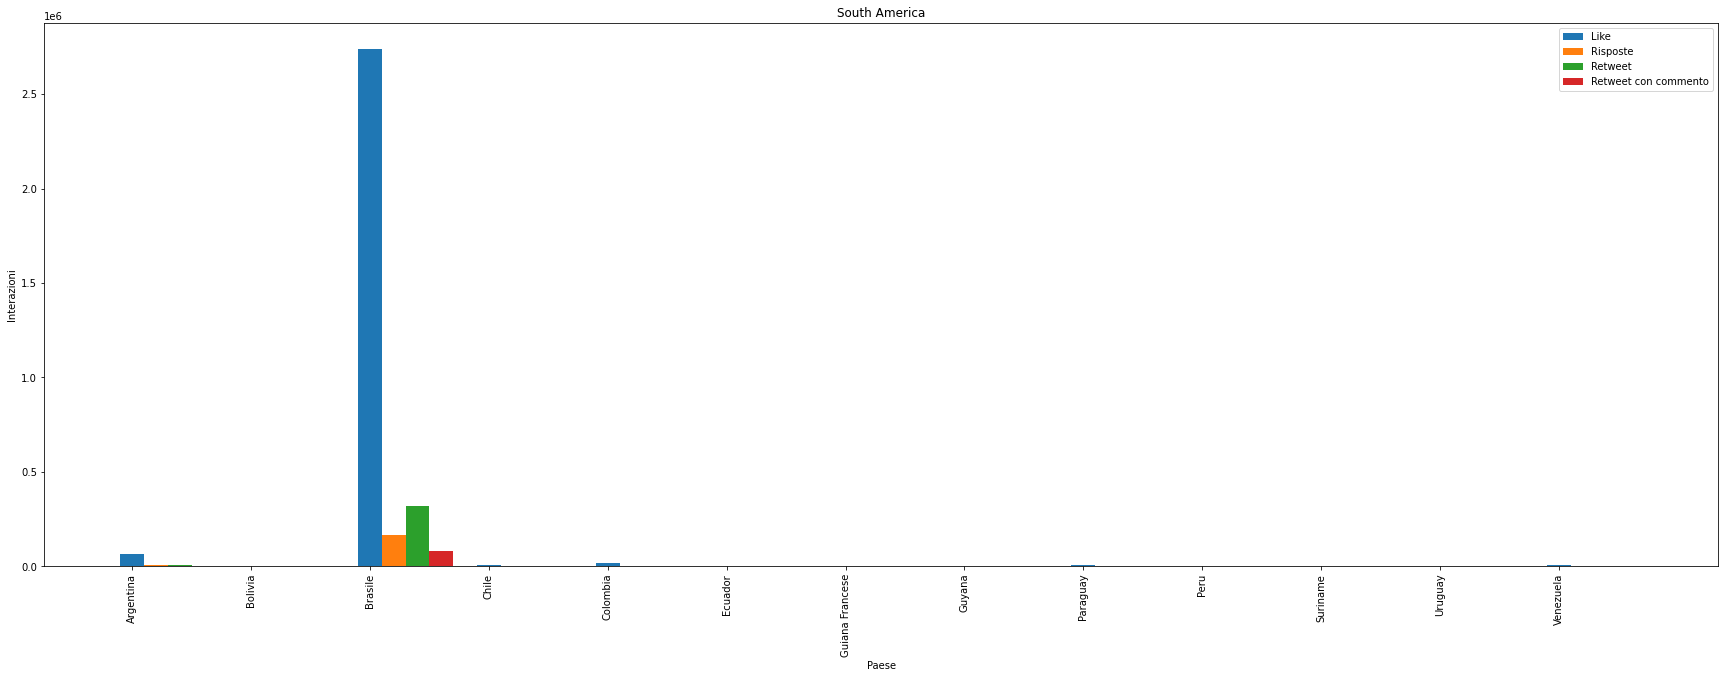

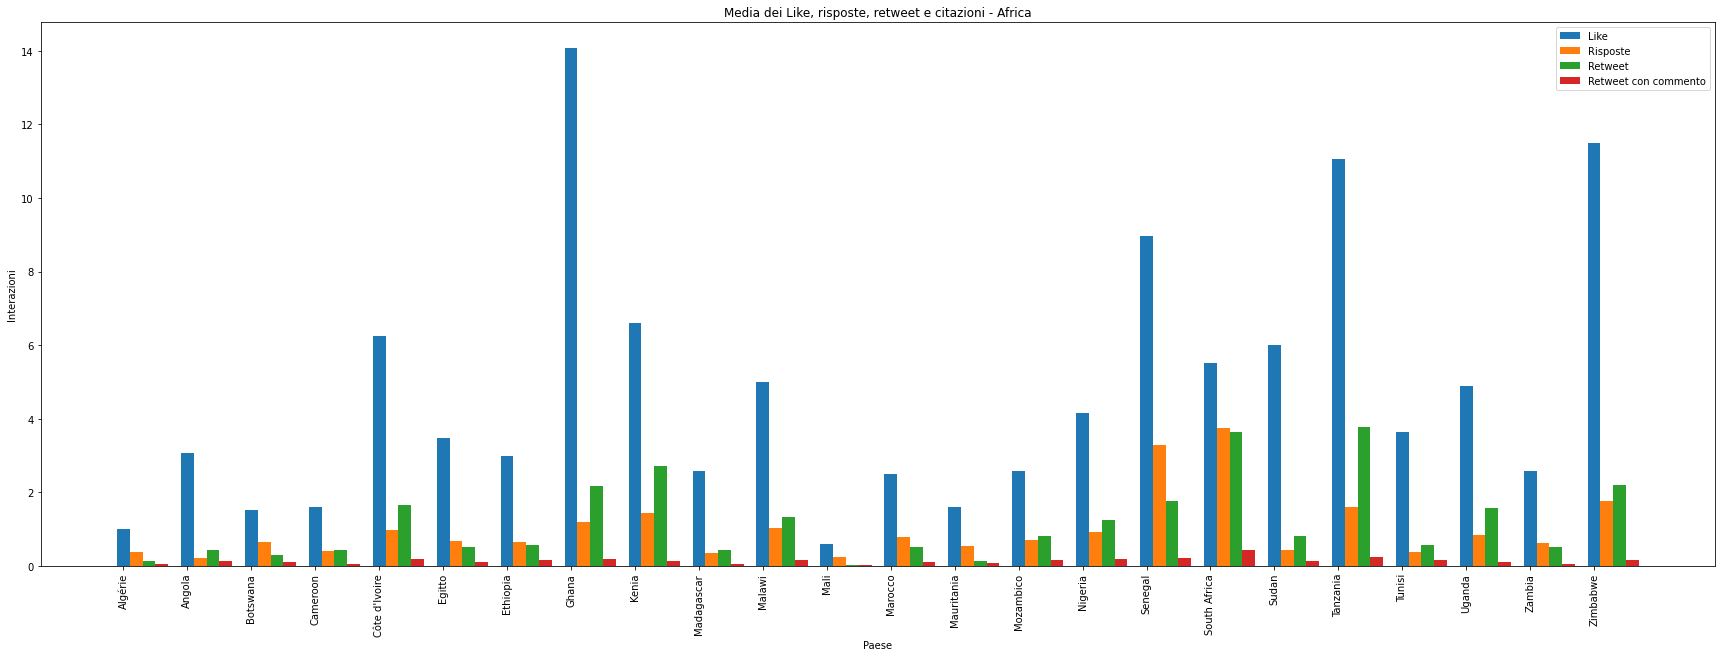

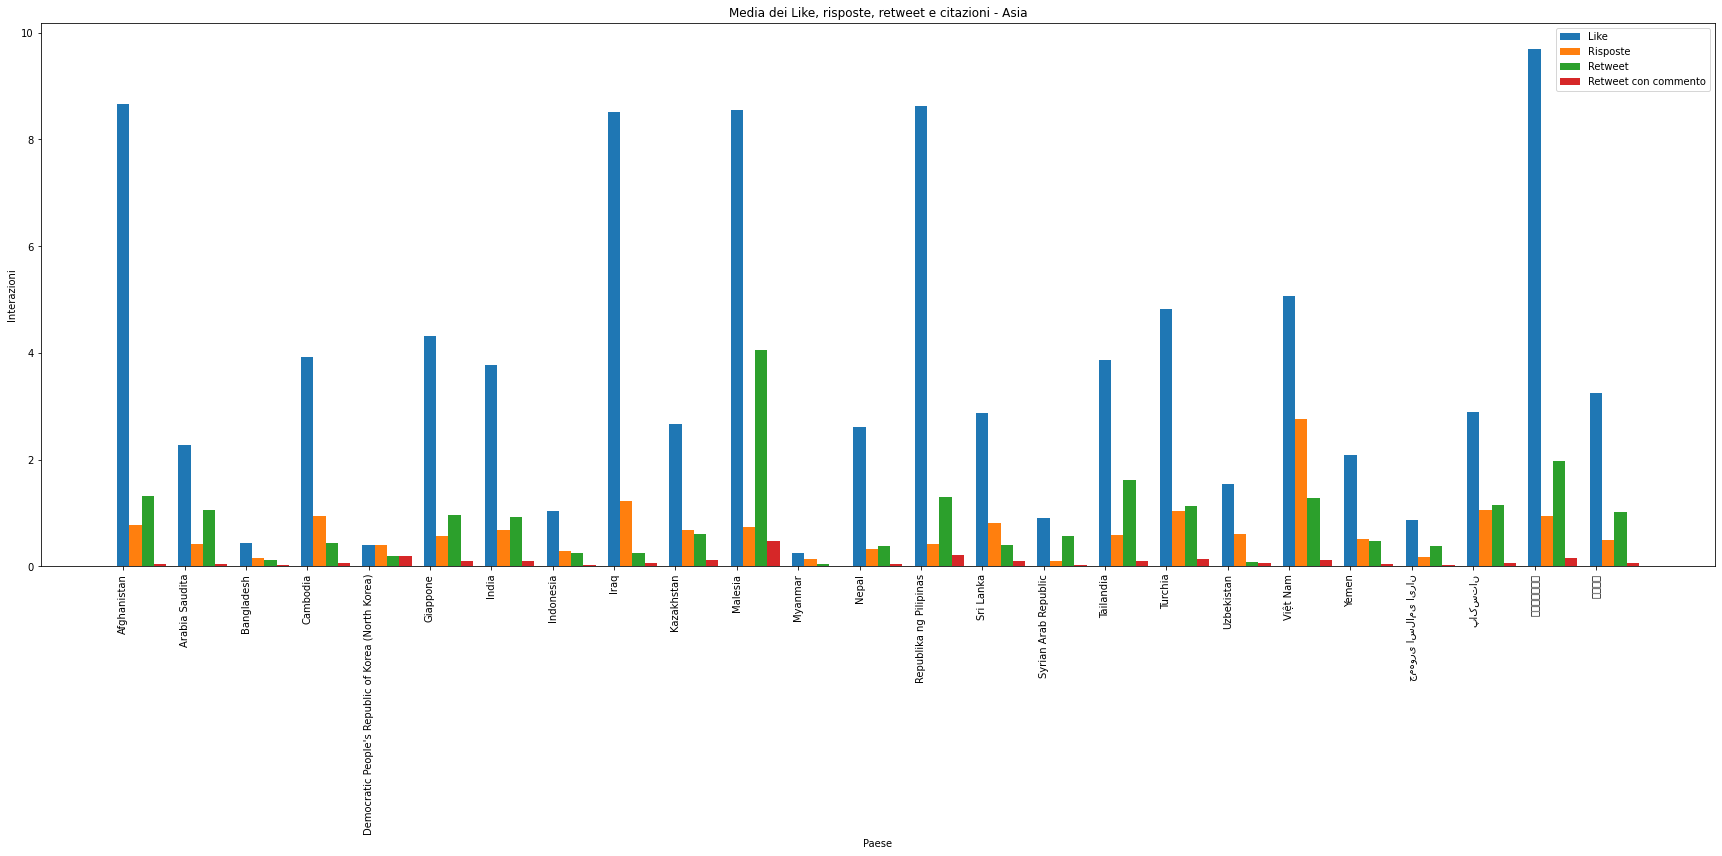

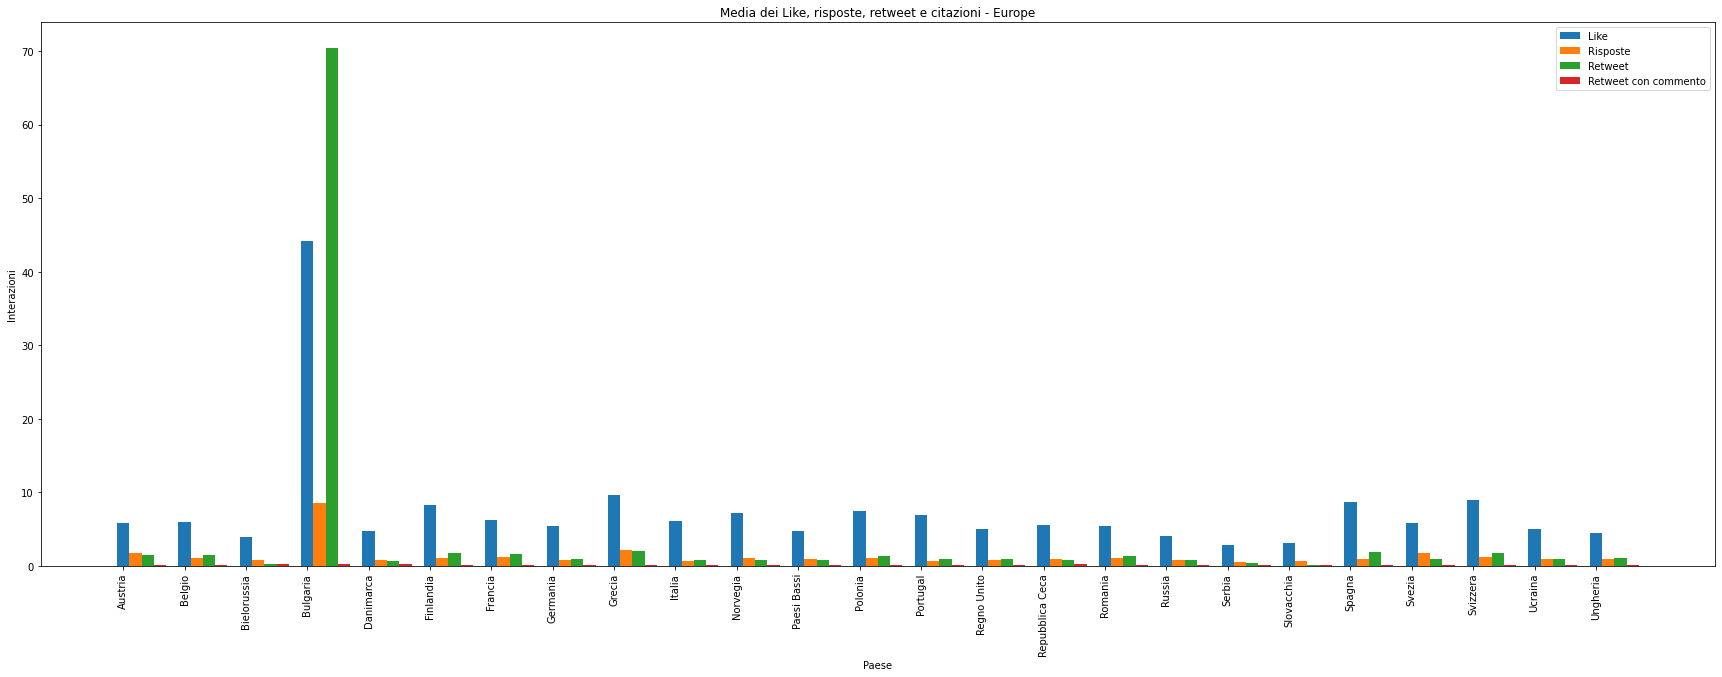

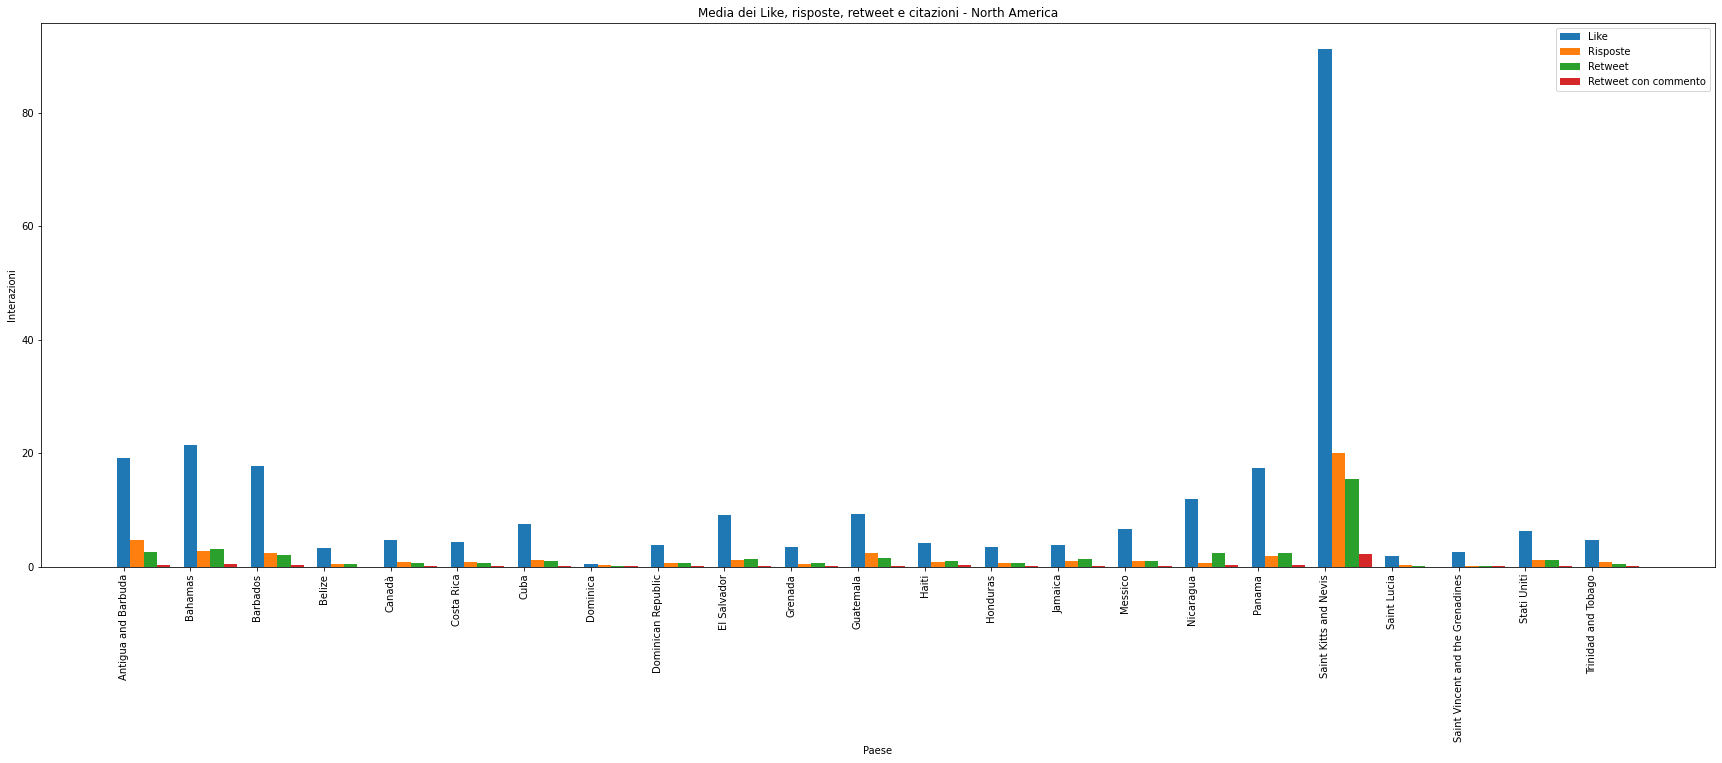

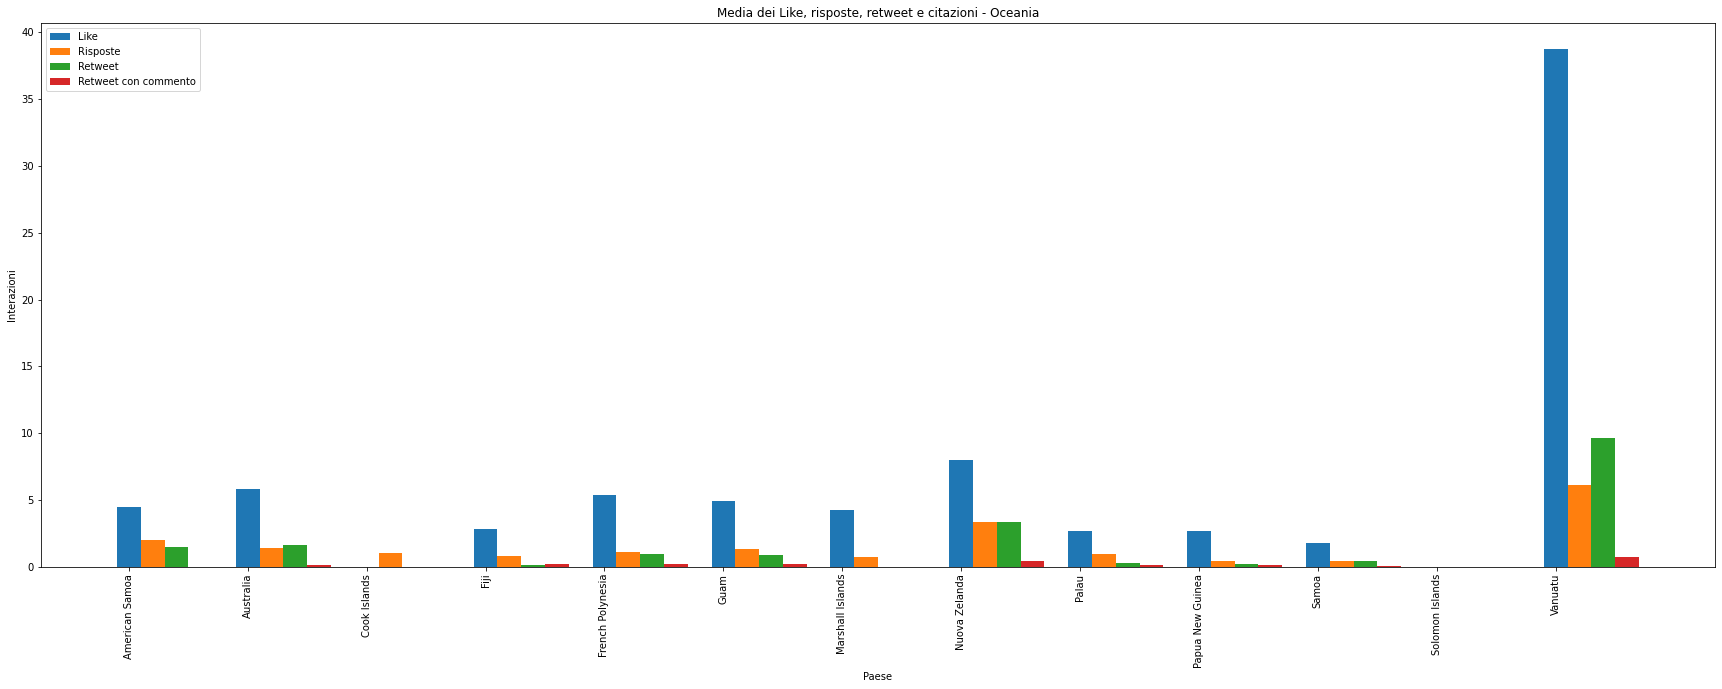

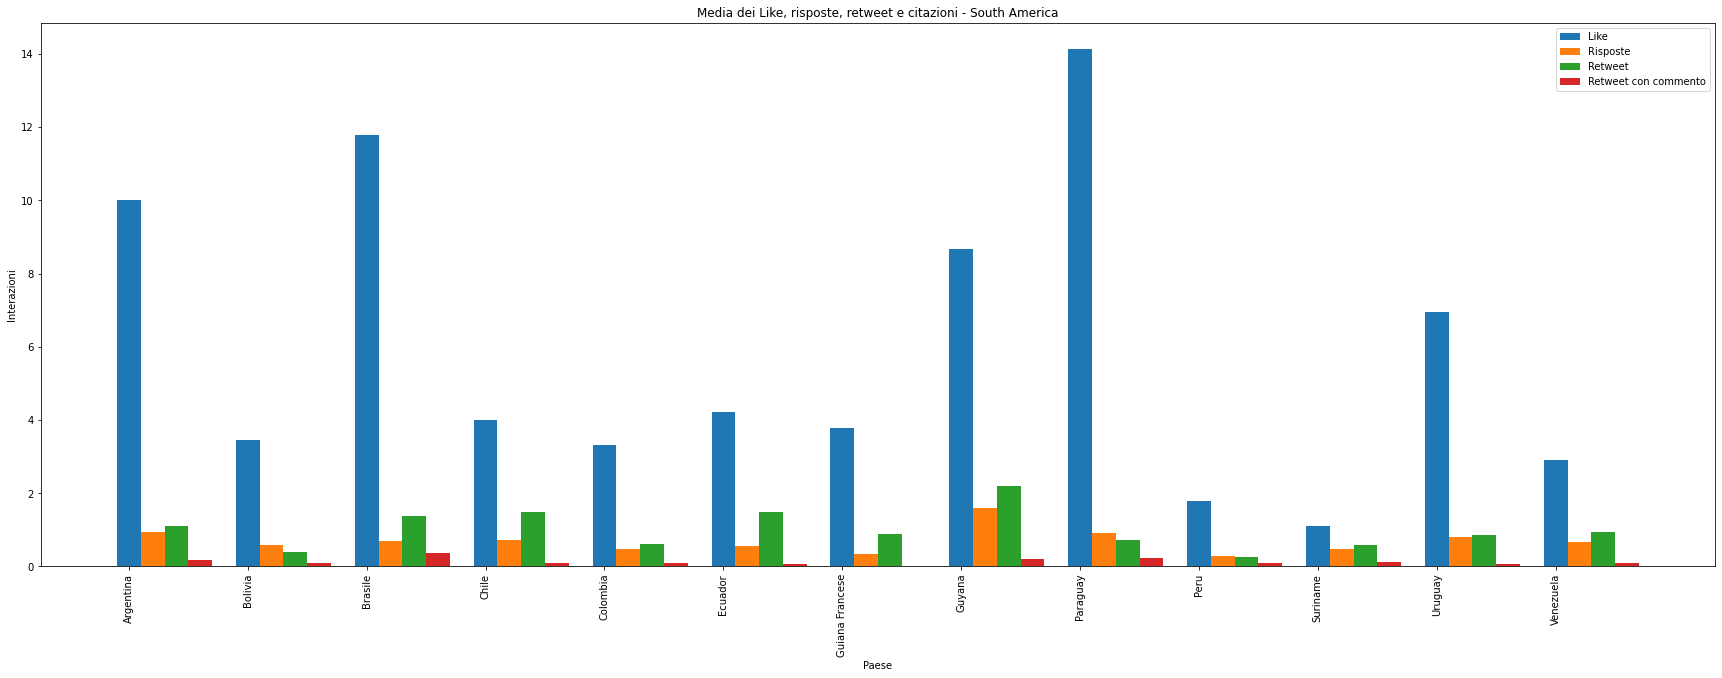

In [78]:
### OBIETTIVO 4 ###
plot_continent_sum(df_1, grouped)

print ('------------------ MEAN ------------------')
plot_continent_mean(df_1, grouped)

/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


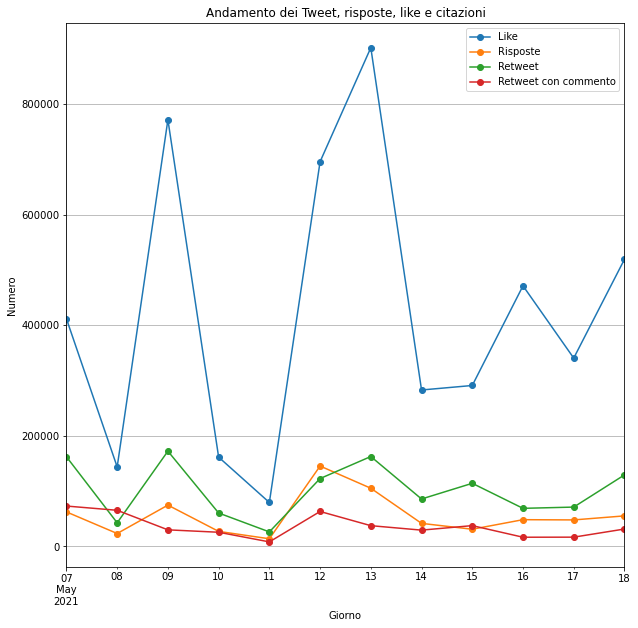

In [79]:
plot_daily_trends(df_1)

#### Incremento valore 22/09/2021 04/10/2021

In [80]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_2 = df[(df['created_at'] >= '2021-09-22') & (df['created_at'] <= '2021-10-04')]
df_2 = df_2.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count', 'public_metrics.quote_count'], ascending=False)

df_2 = df_2.reset_index(drop=True)
display (df_2.head(10))

,id,created_at,text,author.username,geo.country,geo.country_code,in_reply_to_user_id,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,Continent
0,1441416830485073924,2021-09-24T14:58:47.000Z,crypto is illegal and elon mucks gf broke up w...,BronzeHammer,NaN,NaN,NaN,61470,284,133,7425,NaN
1,1442949756993490945,2021-09-28T20:30:05.000Z,First steps...\n\n🌋#Bitcoin🇸🇻 https://t.co/duh...,nayibbukele,NaN,NaN,NaN,56368,2758,3268,11812,NaN
2,1444032835531182080,2021-10-01T20:13:51.000Z,JUST IN: Kyrsten Sinema has left DC amid negot...,NoLieWithBTC,NaN,NaN,NaN,55718,2696,2717,16714,NaN
3,1442581561300426756,2021-09-27T20:07:00.000Z,We need to reward work in this country—not jus...,JoeBiden,NaN,NaN,NaN,52577,626,3883,5077,NaN
4,1441846960332361730,2021-09-25T19:27:58.000Z,2.1 million Salvadorans are ACTIVELY USING @ch...,nayibbukele,NaN,NaN,NaN,39262,945,1881,7064,NaN
5,1441398415712129024,2021-09-24T13:45:36.000Z,"China’s authoritarian crackdown on crypto, inc...",SenToomey,NaN,NaN,NaN,38743,934,1957,7879,NaN
6,1440575543611592708,2021-09-22T07:15:48.000Z,Congratulations Prime Minister @JustinTrudeau ...,ImranKhanPTI,NaN,NaN,NaN,35365,96,840,3806,NaN
7,1441387389876723716,2021-09-24T13:01:48.000Z,🔍 New #Airdrop: Dr. Skull\n\n💲 Reward: Up to $...,DrSkull6,NaN,NaN,NaN,34952,9410,7304,31834,NaN
8,1443629579416002567,2021-09-30T17:31:27.000Z,The United States has no intention to ban #Bit...,saylor,NaN,NaN,NaN,33236,875,1376,7970,NaN
9,1444183509740883968,2021-10-02T06:12:35.000Z,💥 𝐓𝐇𝐄 $𝐑𝐄𝐍𝐀 𝐀𝐈𝐑𝐃𝐑𝐎𝐏 💥\nWARENA is giving away i...,WarenaOfficial,NaN,NaN,NaN,31849,9978,6482,36209,NaN


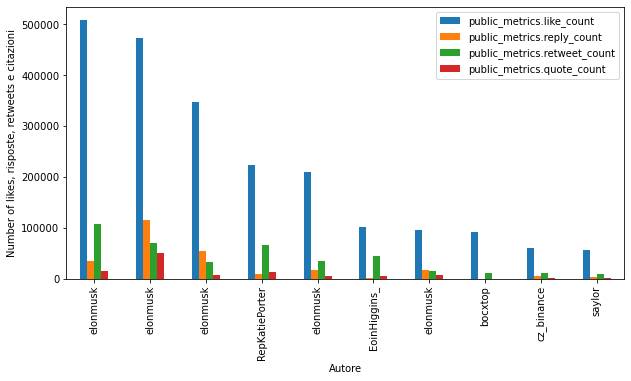

In [81]:
# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df2_sorted = df_2.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count', 'public_metrics.quote_count'], ascending=False)
df2_top10 = df1_sorted.head(10)

# Plot
df2_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count', 'public_metrics.quote_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, risposte, retweets e citazioni')
plt.show()


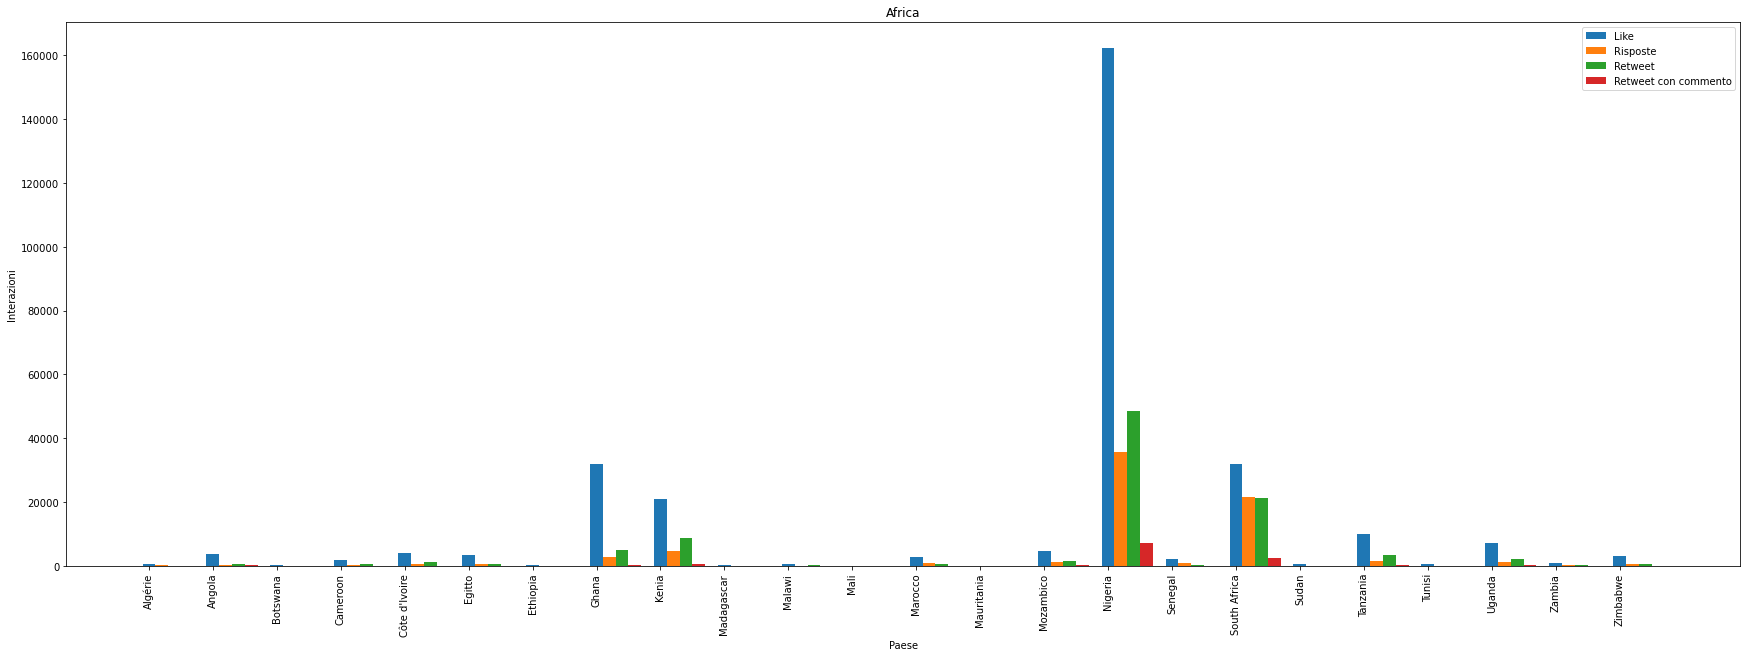

/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIF

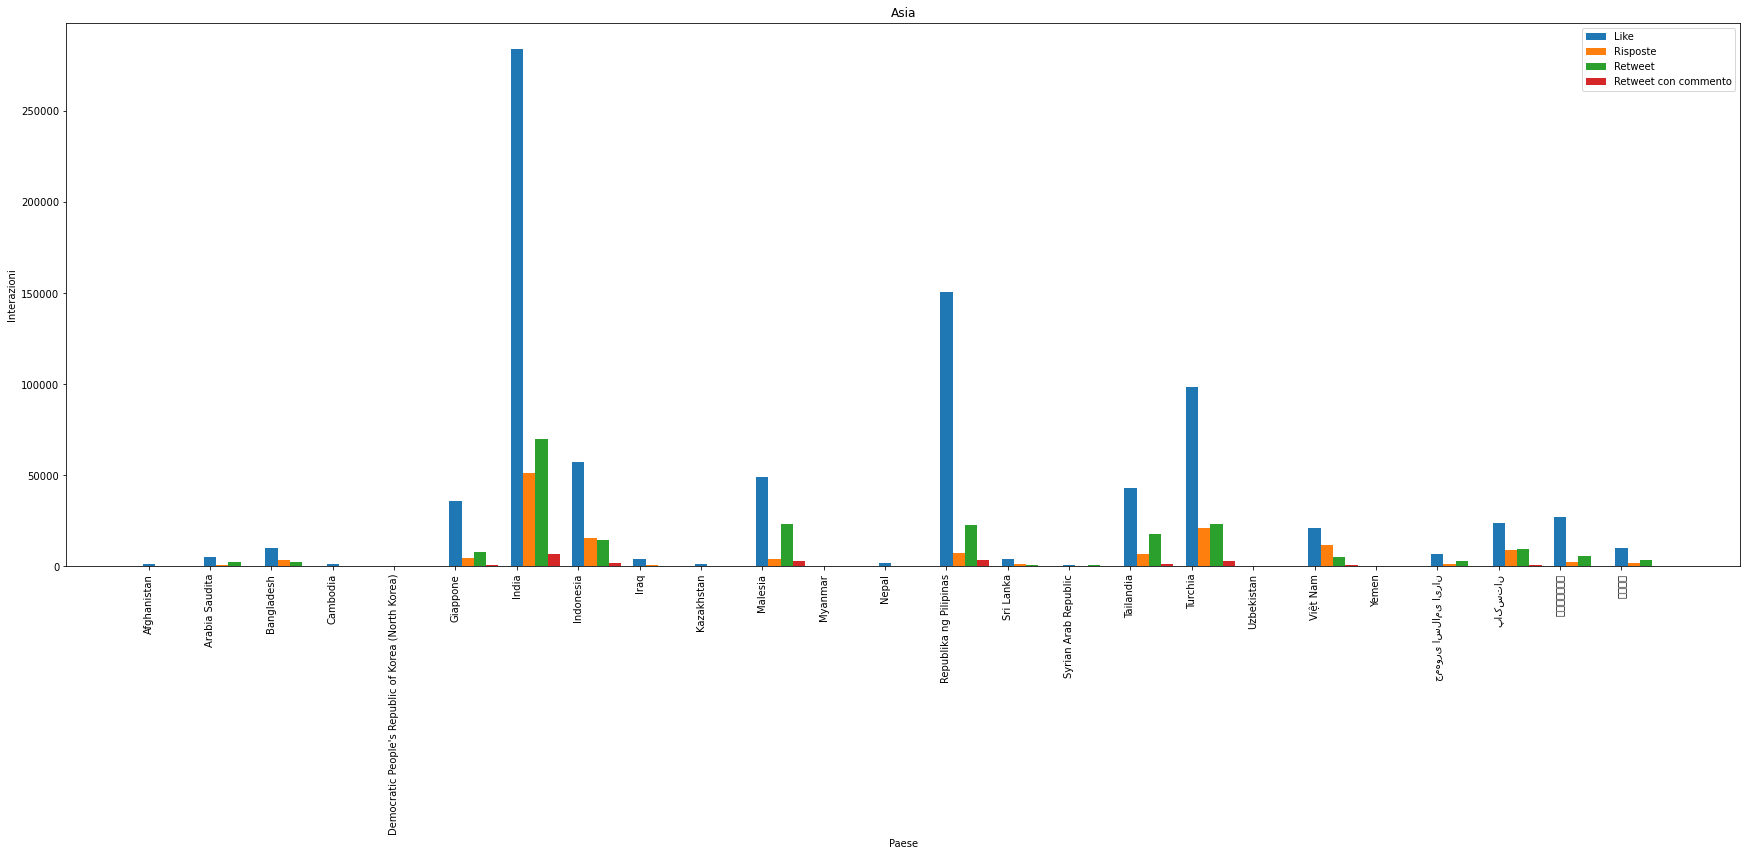

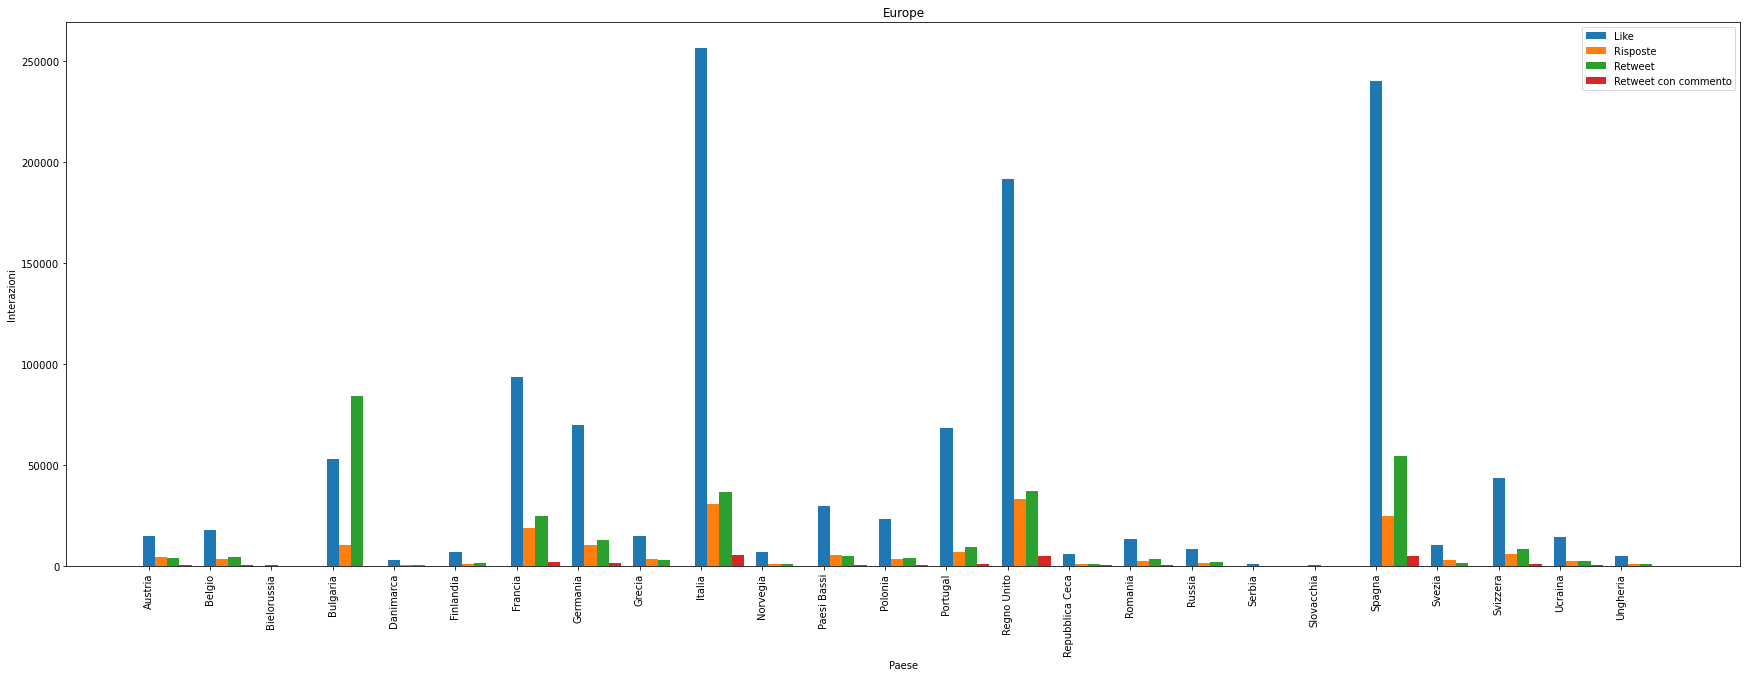

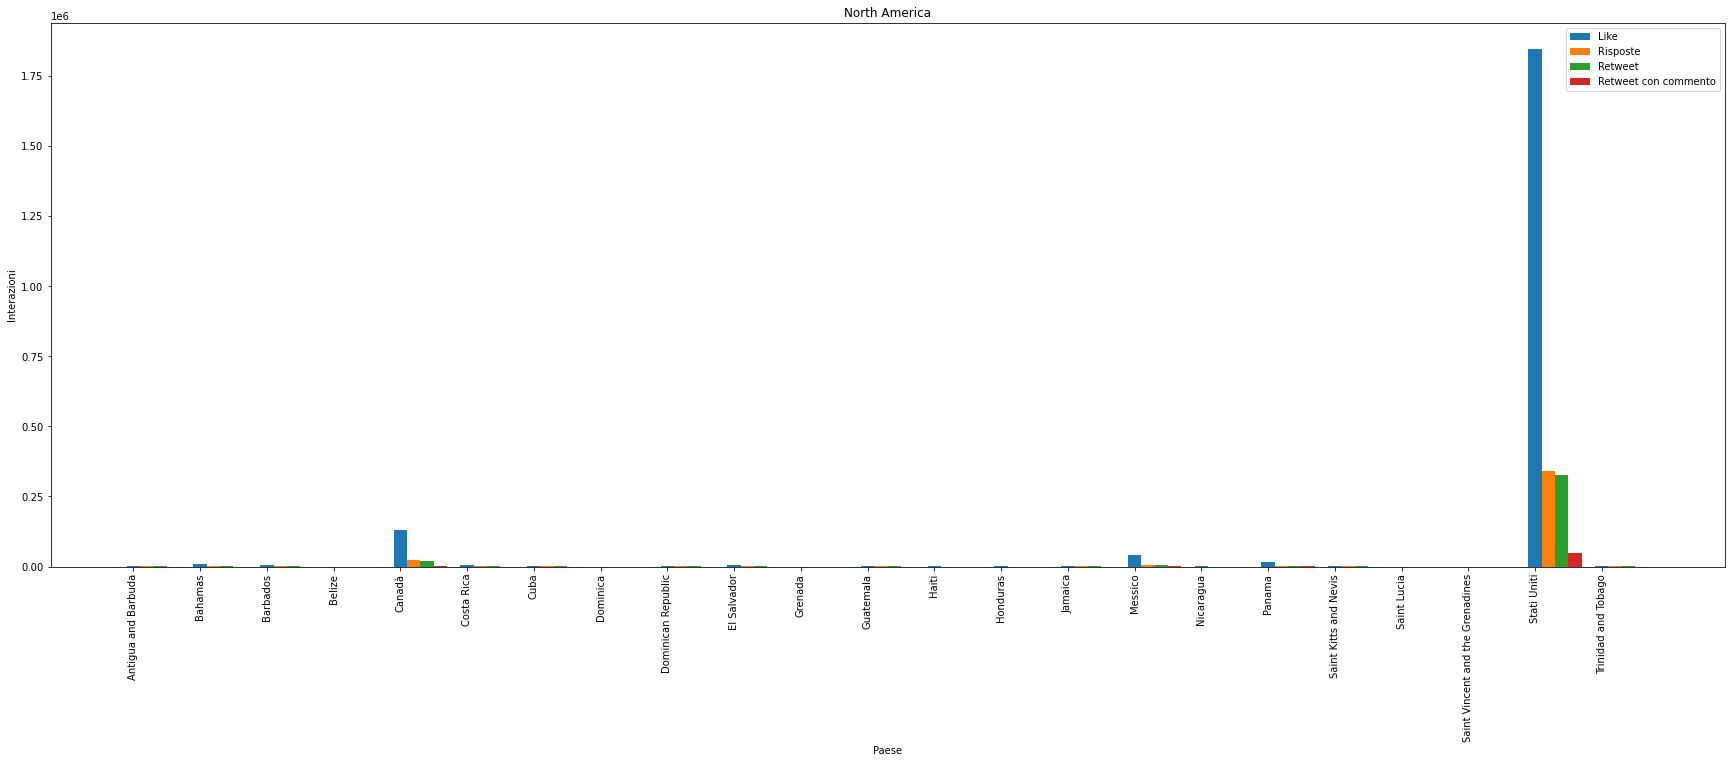

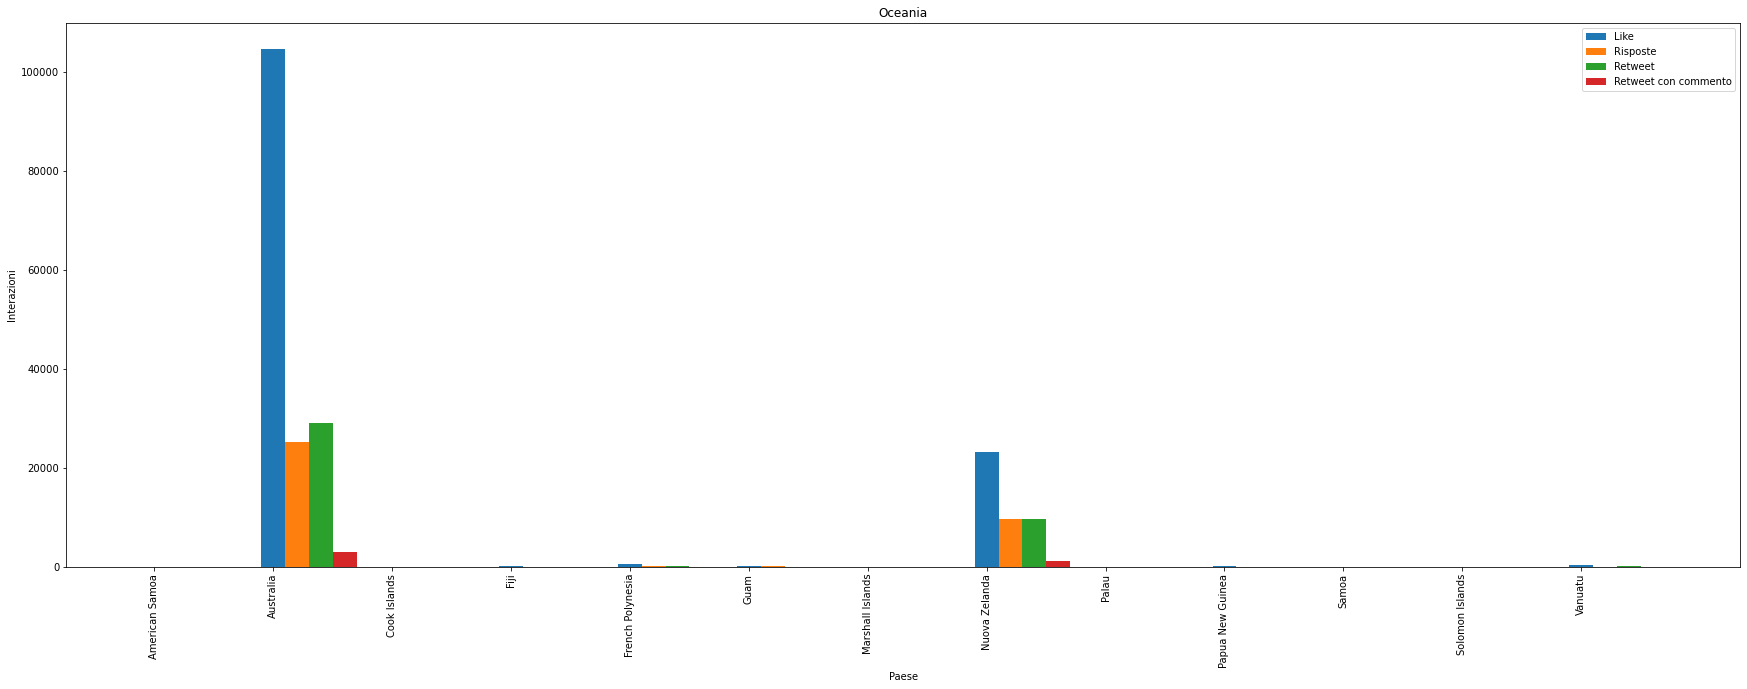

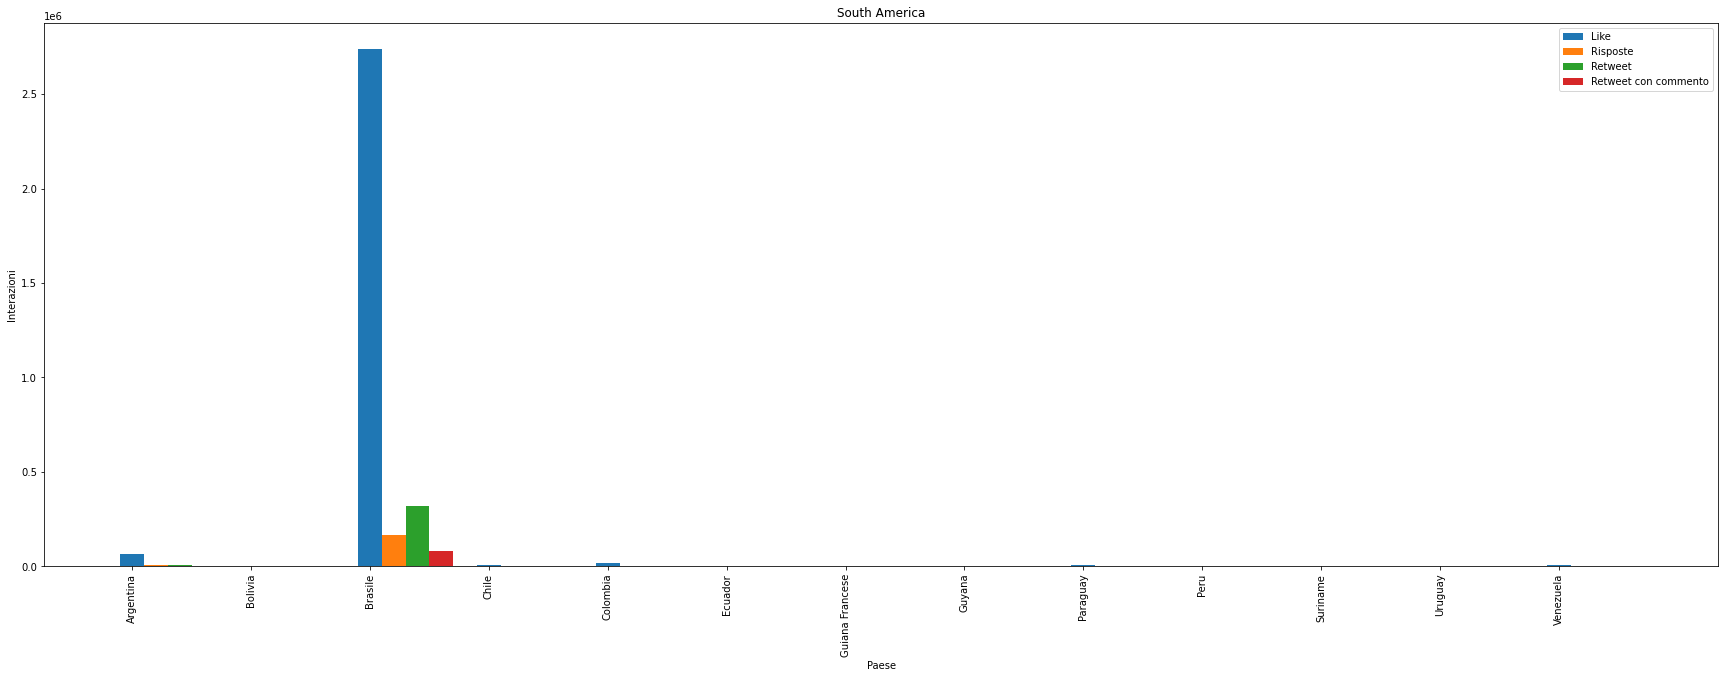

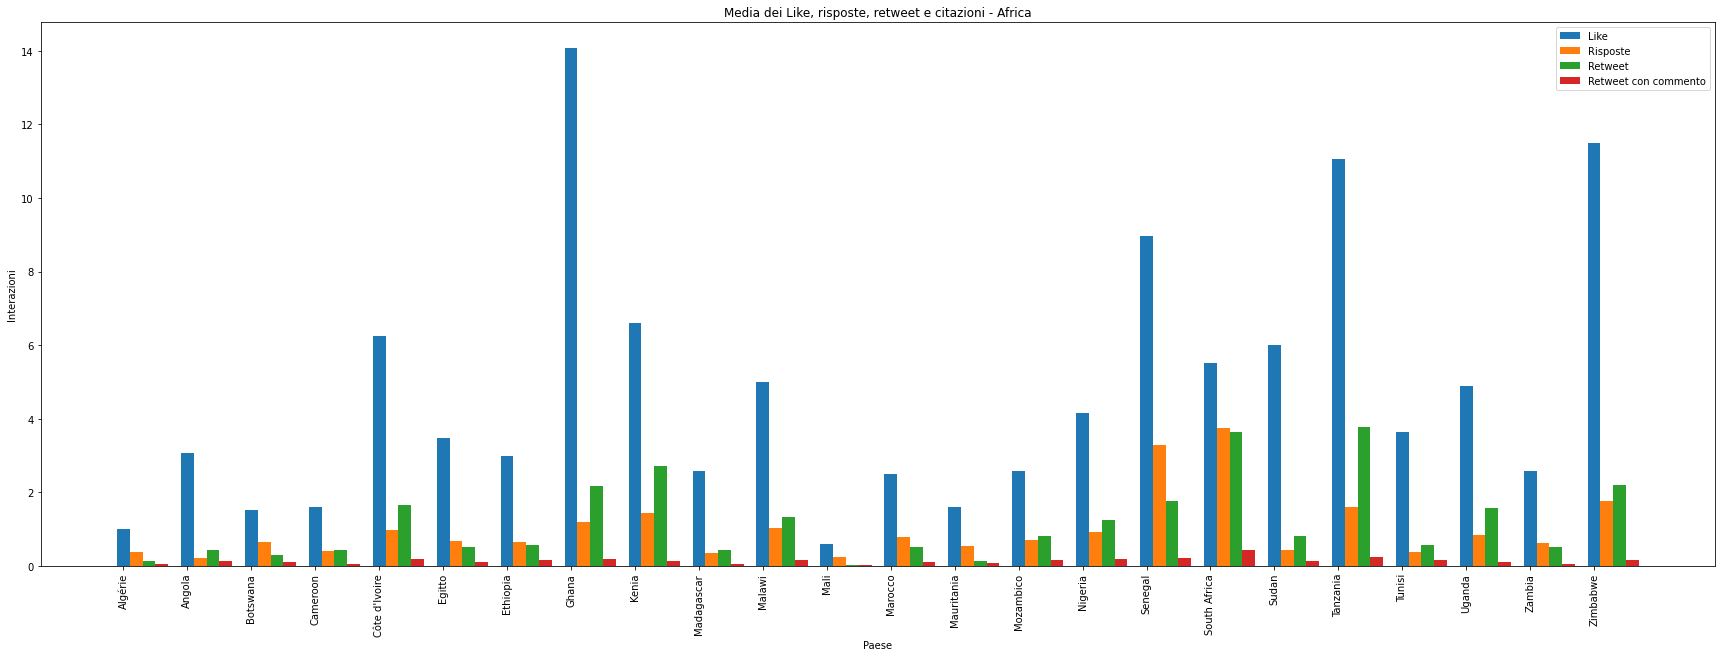

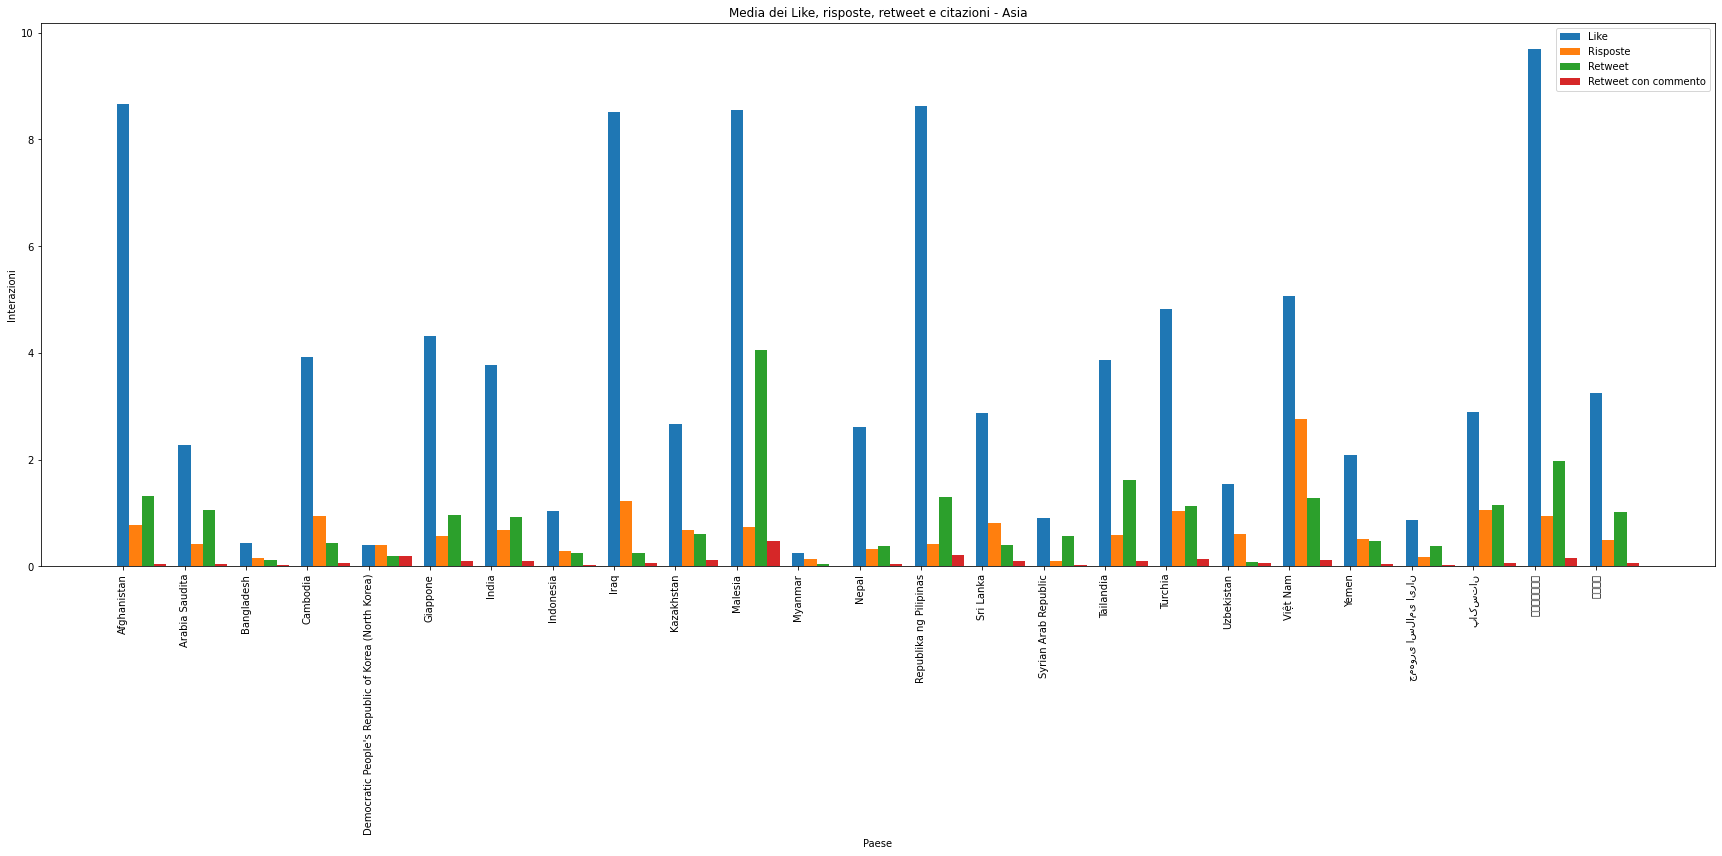

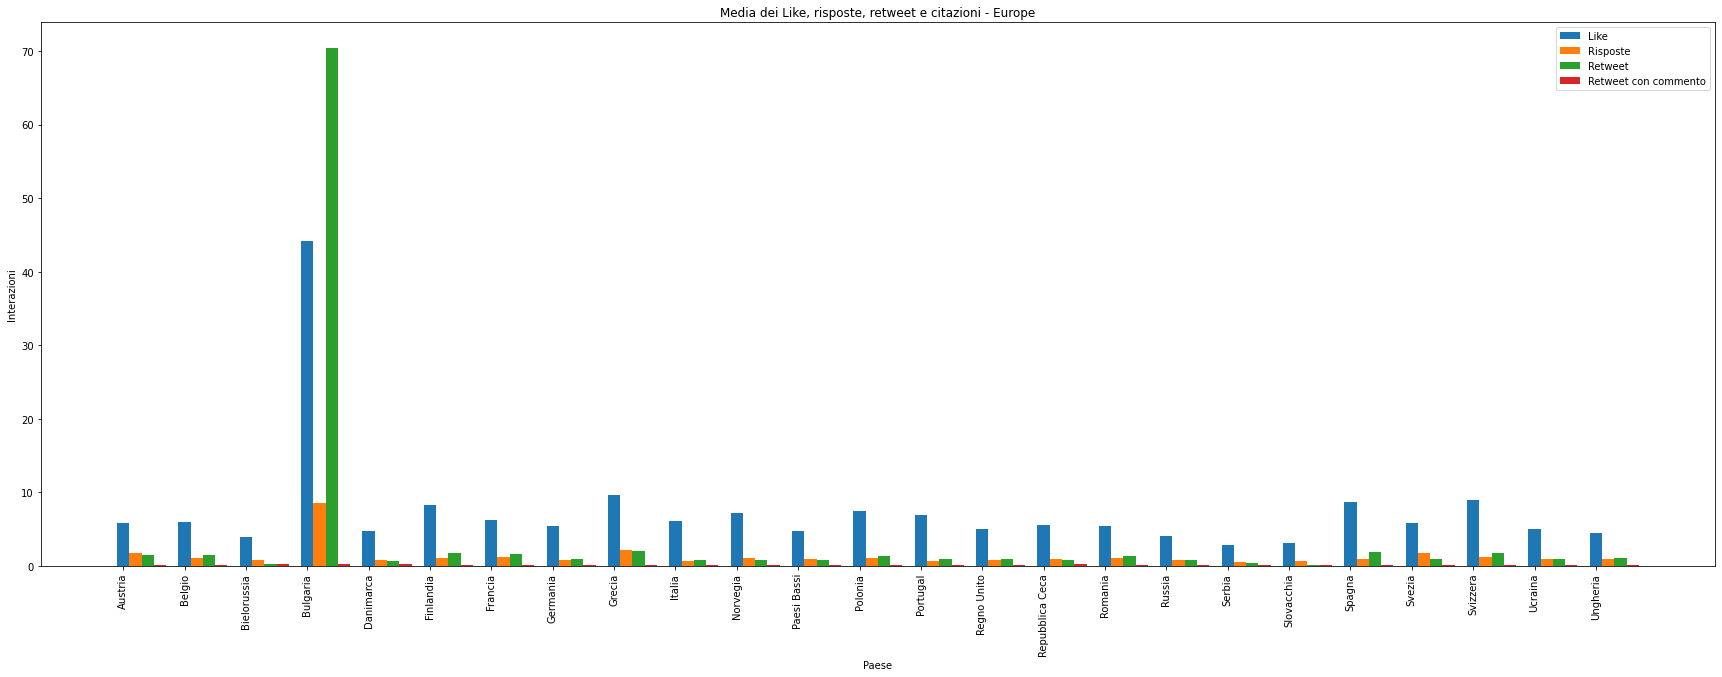

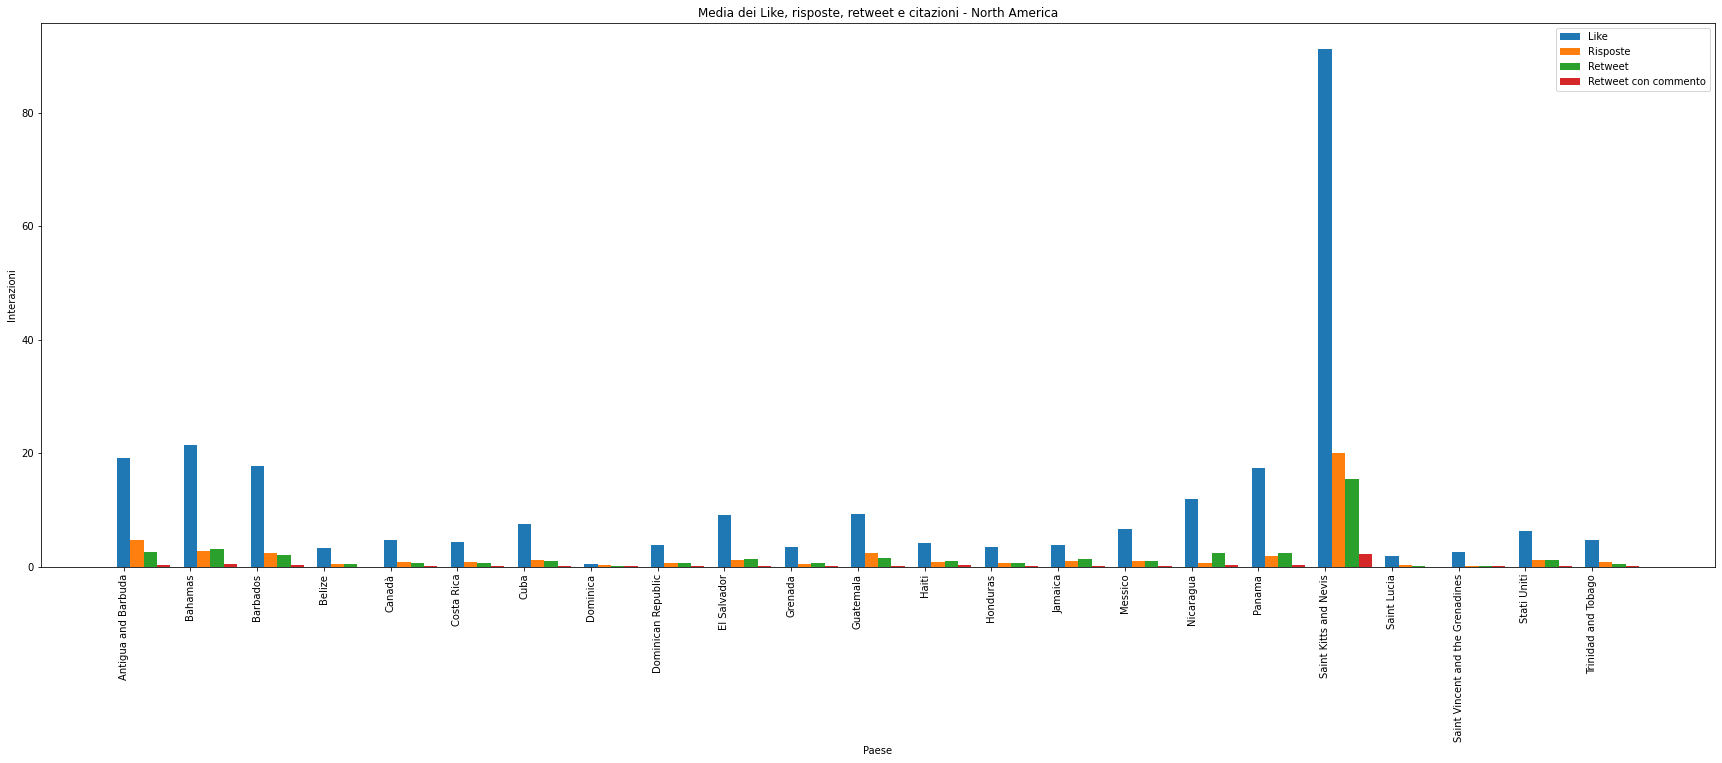

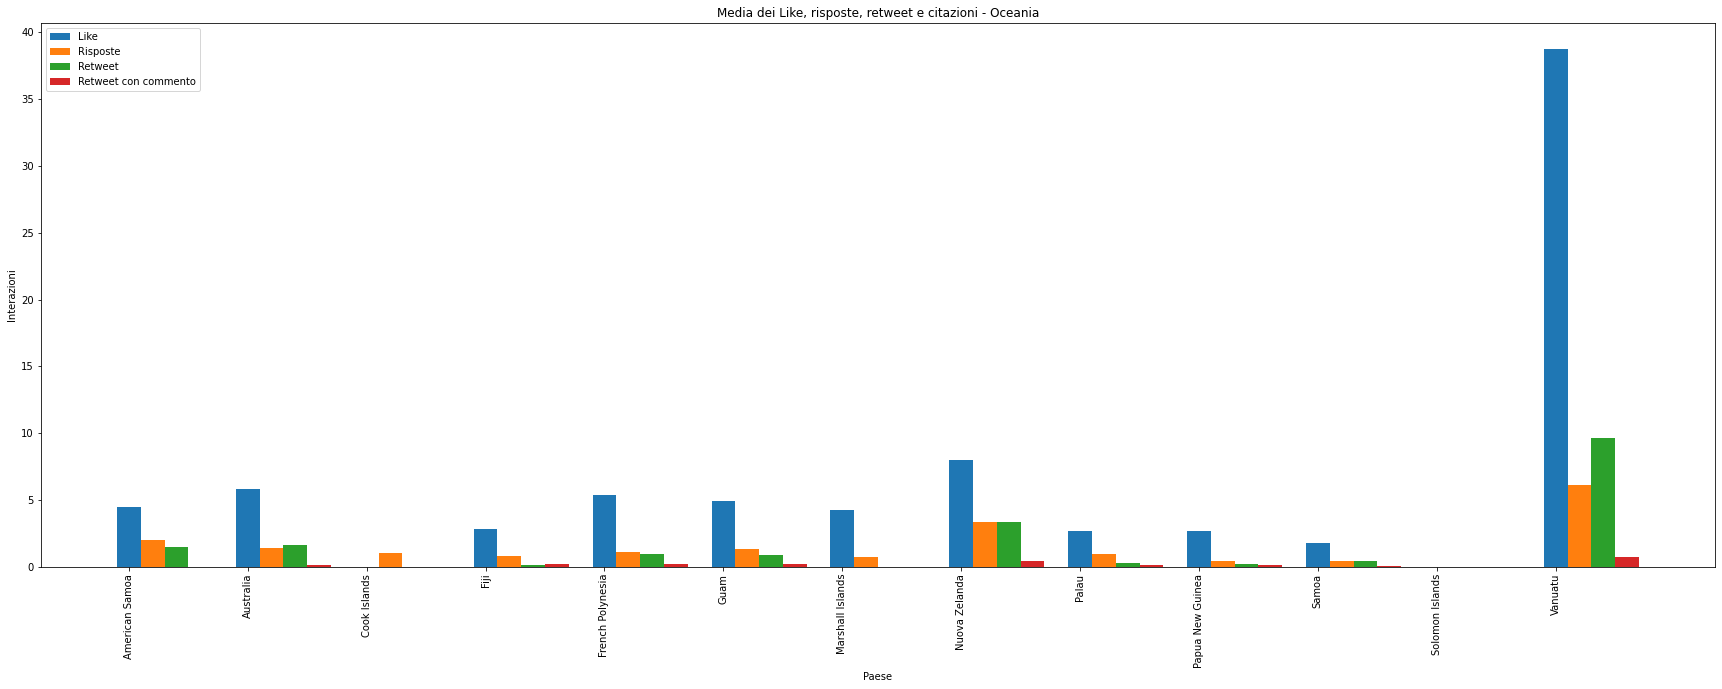

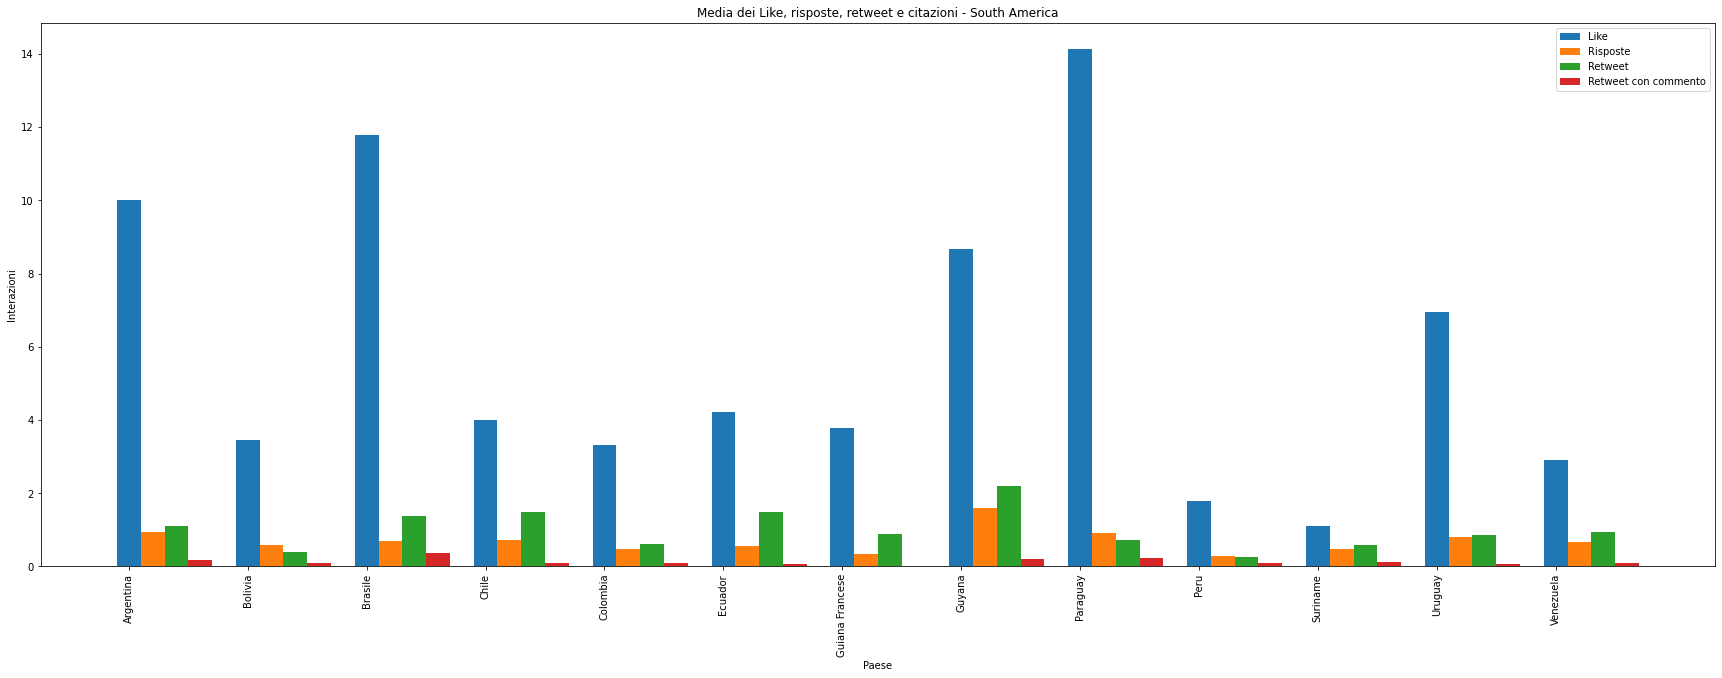

In [82]:
### OBIETTIVO 4 ###
plot_continent_sum(df_2, grouped)
plot_continent_mean(df_2, grouped)

/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


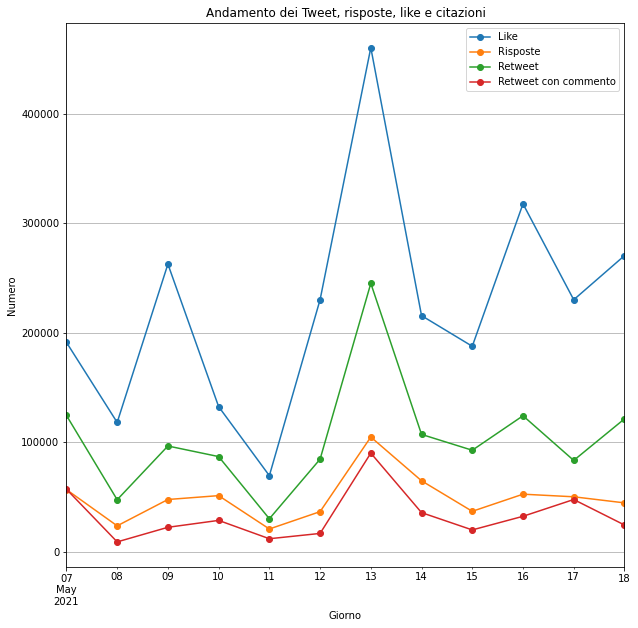

In [83]:
plot_daily_trends(df_2)

#### Crollo 16/01/2022 - 05/02/2022

In [84]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_3 = df[(df['created_at'] >= '2022-02-20') & (df['created_at'] <= '2022-02-25')]
df_3 = df_3.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count', 'public_metrics.quote_count'], ascending=False)

df_3 = df_3.reset_index(drop=True)
display (df_3.head(15))

,id,created_at,text,author.username,geo.country,geo.country_code,in_reply_to_user_id,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,Continent
0,1496124393361129475,2022-02-22T14:07:06.000Z,Crypto is just the stock market for people who...,joshgondelman,NaN,NaN,NaN,69260,491,332,6032,NaN
1,1496876913893203969,2022-02-24T15:57:21.000Z,O planeta Terra registrado hoje pelo satélite ...,Astronomiaum,NaN,NaN,NaN,56646,1162,399,2895,NaN
2,1496711163530424324,2022-02-24T04:58:43.000Z,The world must act immediately. Future of Euro...,DmytroKuleba,NaN,NaN,NaN,49684,1551,1459,15772,NaN
3,1496980981617946624,2022-02-24T22:50:53.000Z,we just gave $25 to each Ukrainian on FTX\n\nd...,SBF_FTX,NaN,NaN,NaN,44130,1064,1942,4997,NaN
4,1495519382247821317,2022-02-20T22:03:00.000Z,"um, stolen? what do you mean? they changed h...",eevee,NaN,NaN,NaN,42879,187,130,7065,NaN
5,1495338575092670466,2022-02-20T10:04:33.000Z,8) A cara do DG para o casal Laís e Gustavo 😂\...,tracklist,NaN,NaN,1.326999e+08,35783,1985,166,2773,NaN
6,1495948972141297675,2022-02-22T02:30:03.000Z,Adult Arthur looks like he used to front a reg...,NifMuhammad,NaN,NaN,NaN,25757,293,100,1542,NaN
7,1495750705797287938,2022-02-21T13:22:12.000Z,"Ontem recebi essa mensagem, no direct do Insta...",vitorsergio,NaN,NaN,NaN,25196,191,583,428,NaN
8,1496483049579634689,2022-02-23T13:52:16.000Z,Como Bolsonaro justificará aos seus eleitores ...,gugachacra,NaN,NaN,NaN,24224,345,2818,2345,NaN
9,1495191977289142273,2022-02-20T00:22:01.000Z,BREAKING: The state of California has introduc...,Dennis_Porter_,NaN,NaN,NaN,23264,427,923,3672,NaN


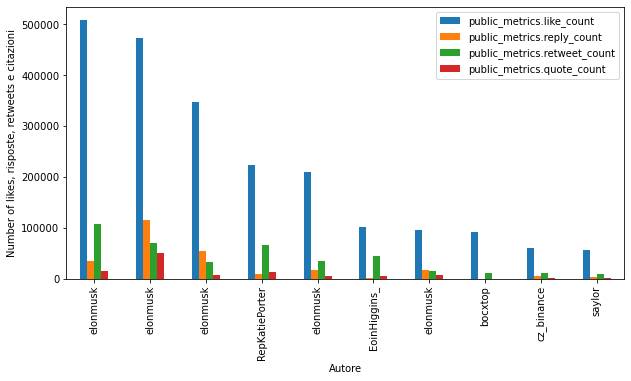

In [85]:
# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df3_sorted = df_3.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count', 'public_metrics.quote_count'], ascending=False)
df3_top10 = df1_sorted.head(10)

# Plot
df3_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count', 'public_metrics.quote_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, risposte, retweets e citazioni')
plt.show()

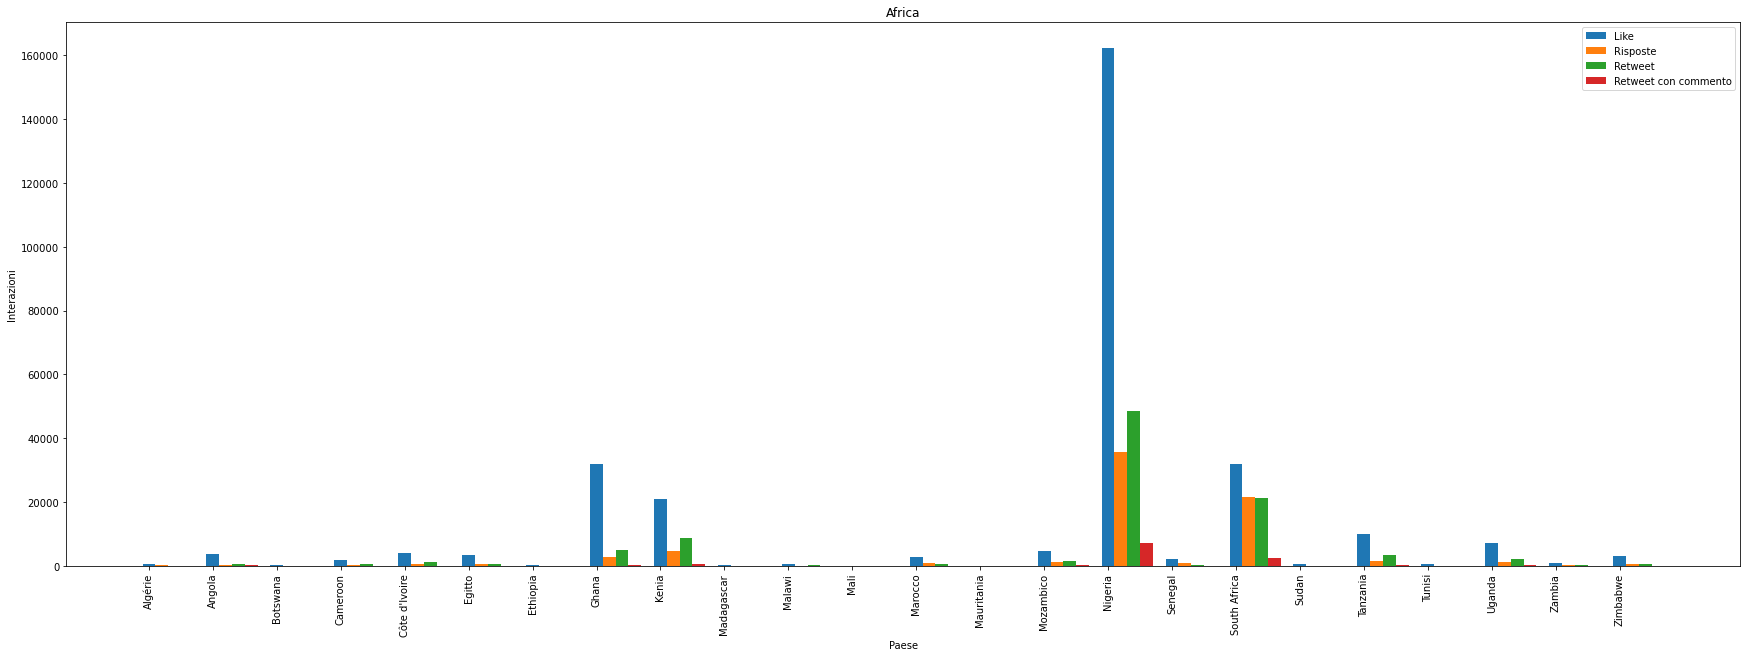

/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIF

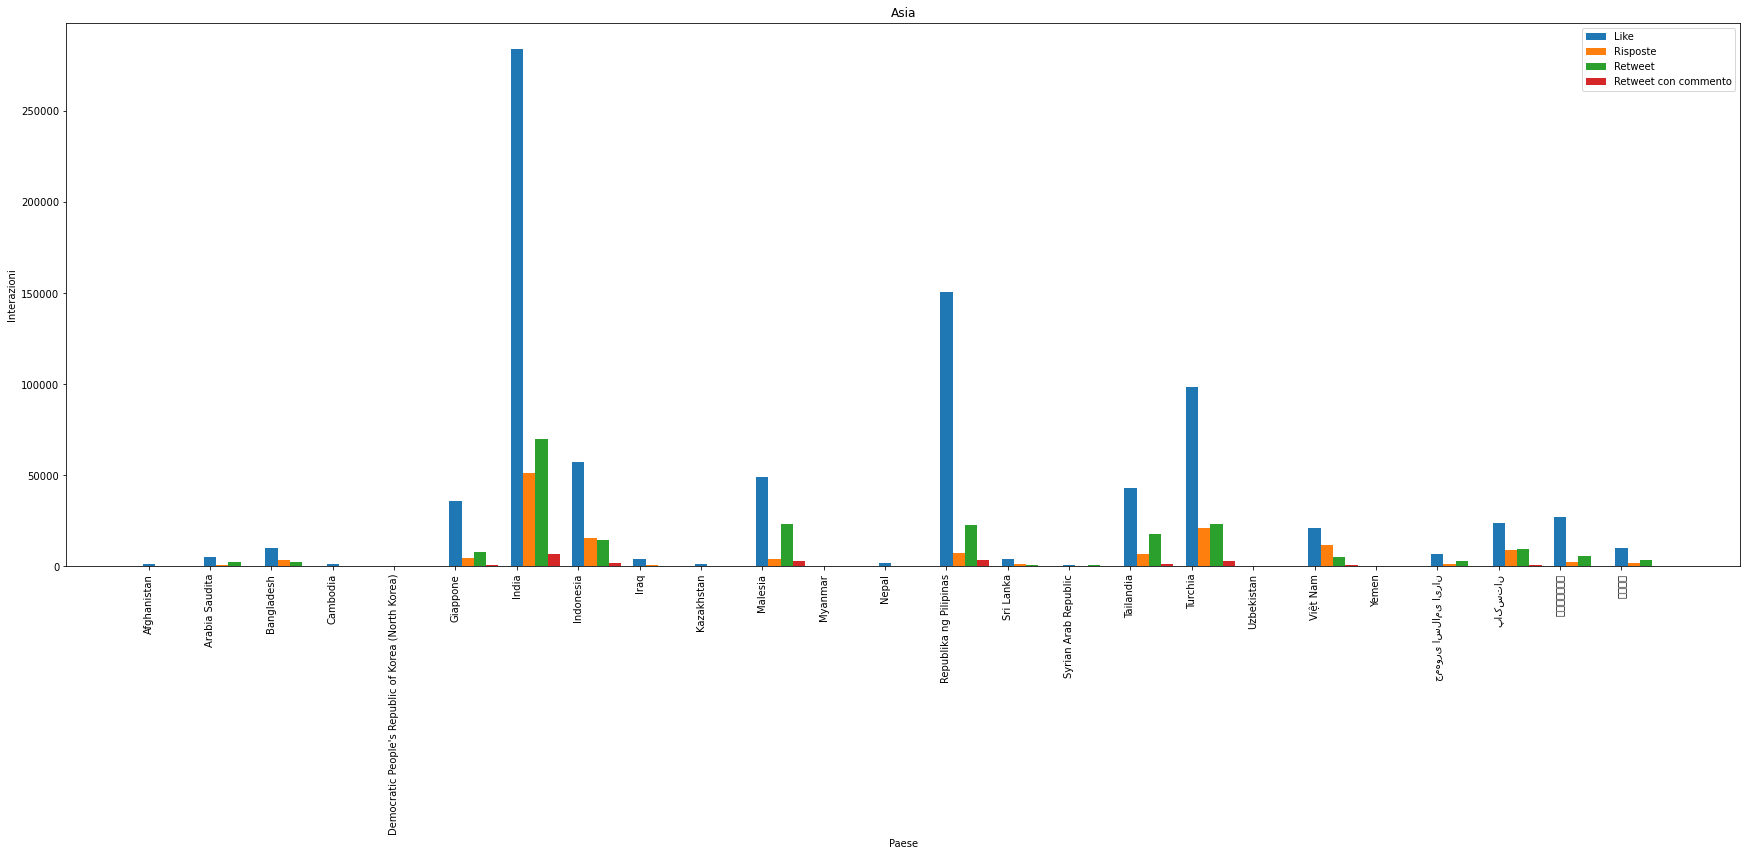

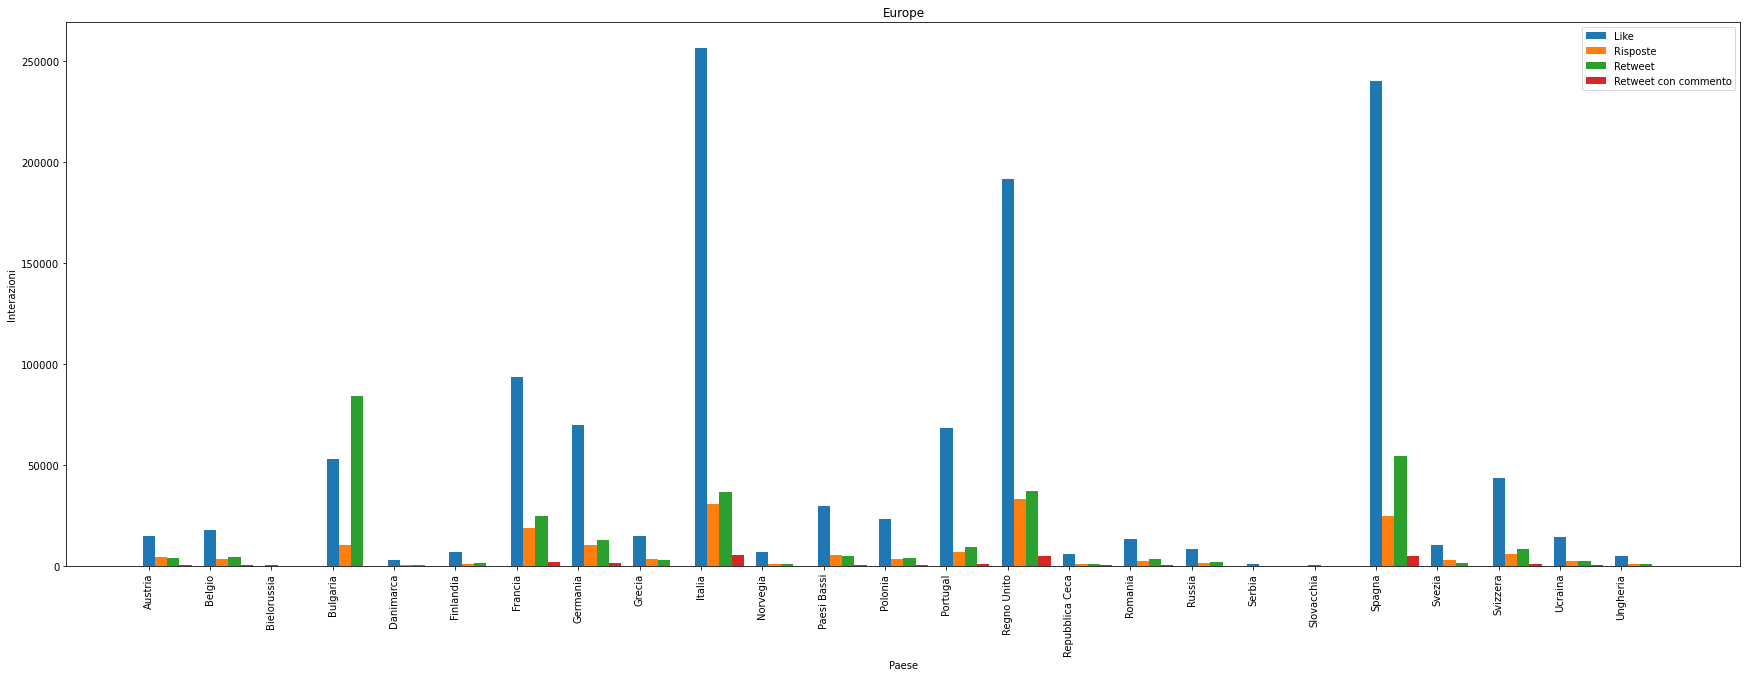

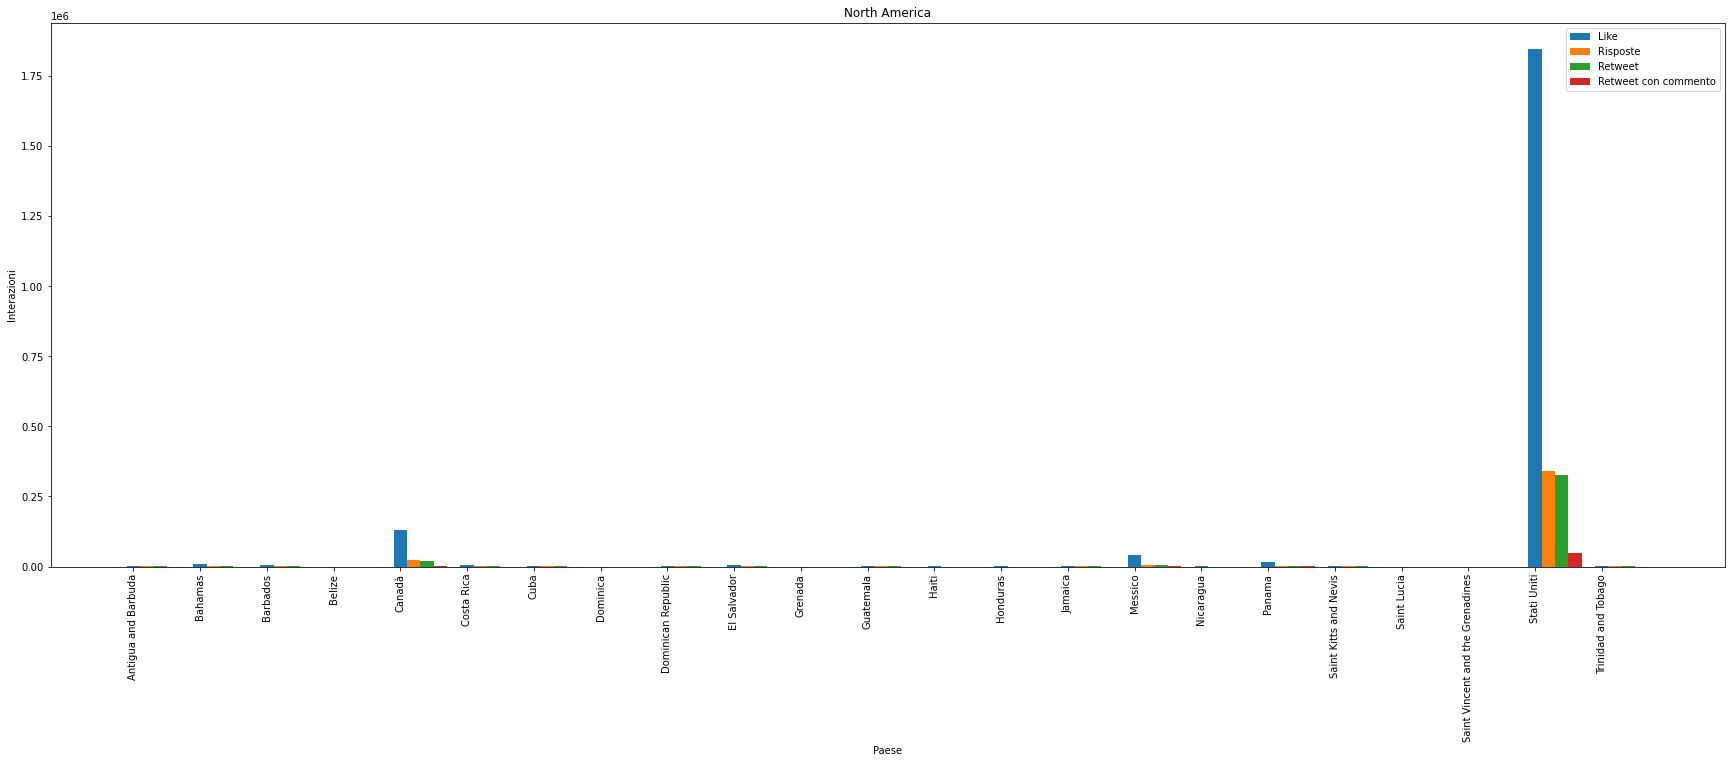

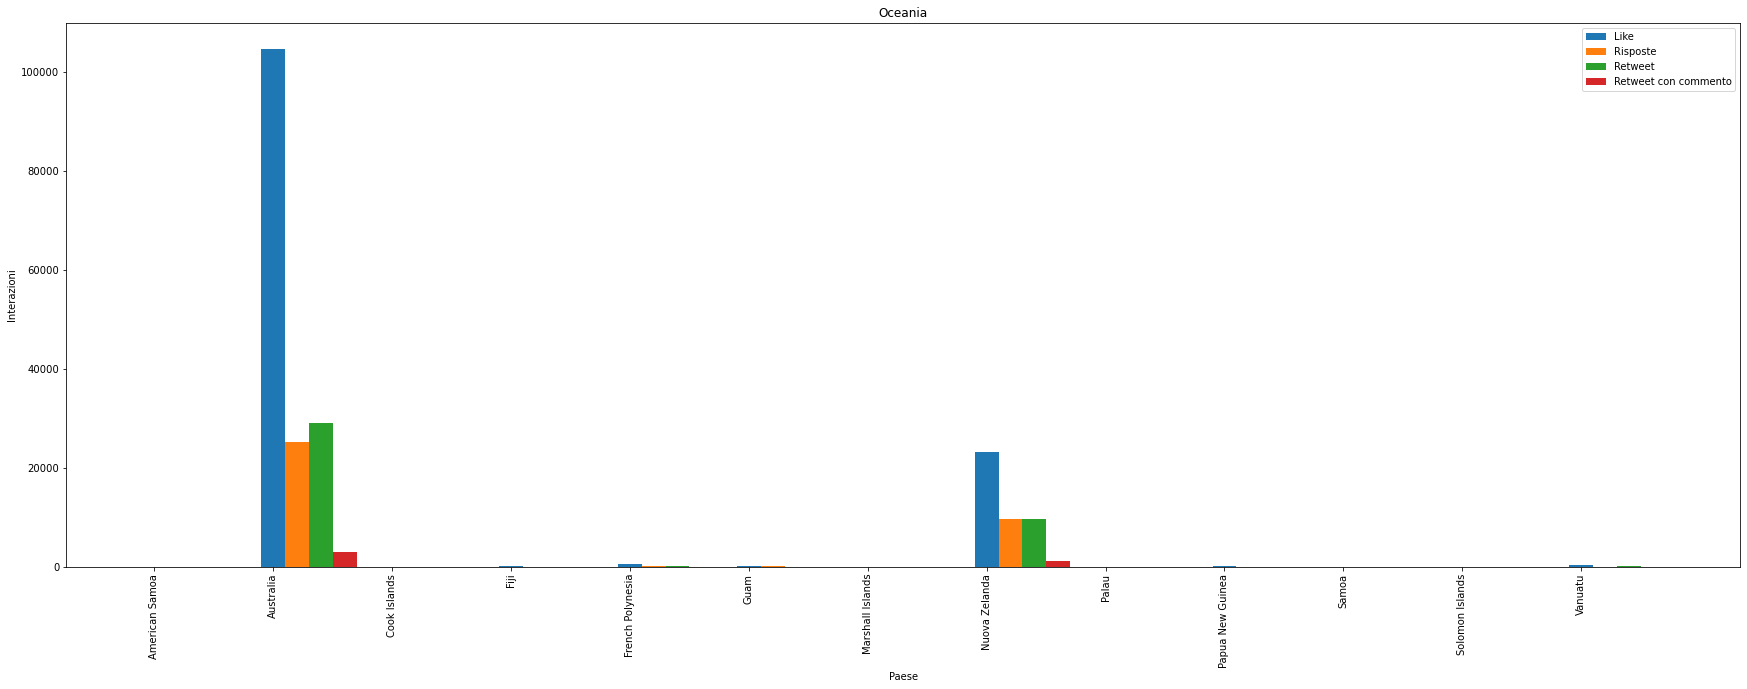

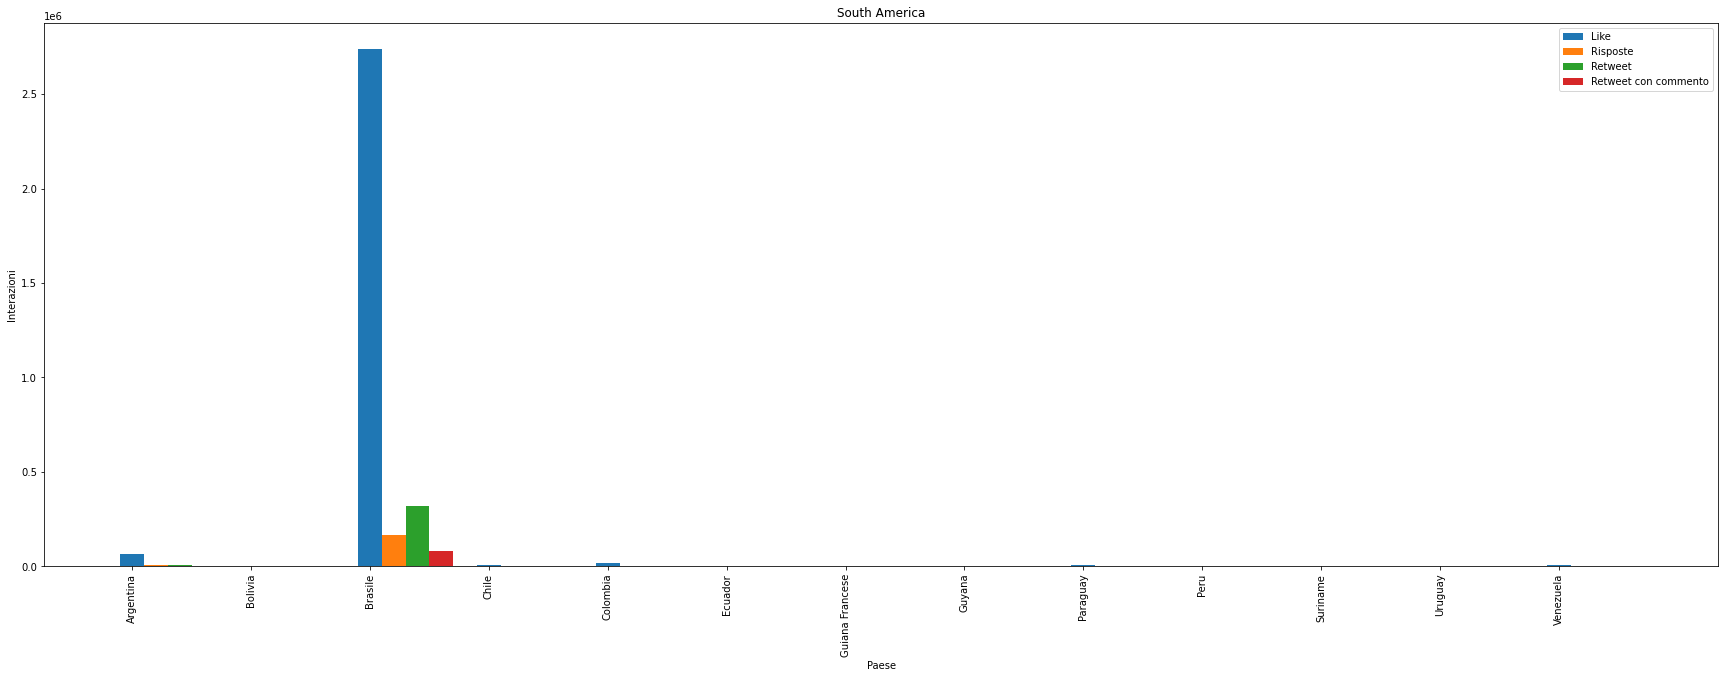

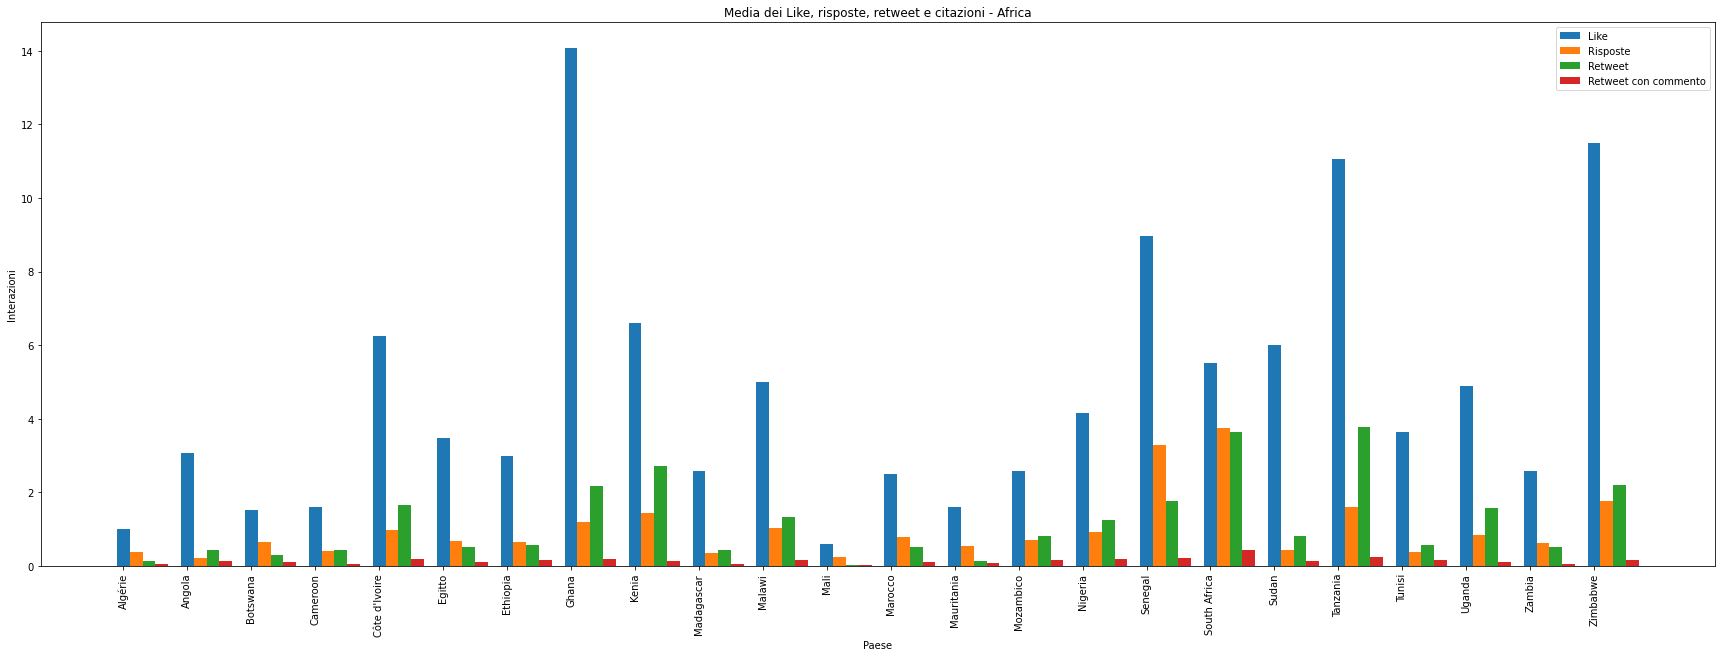

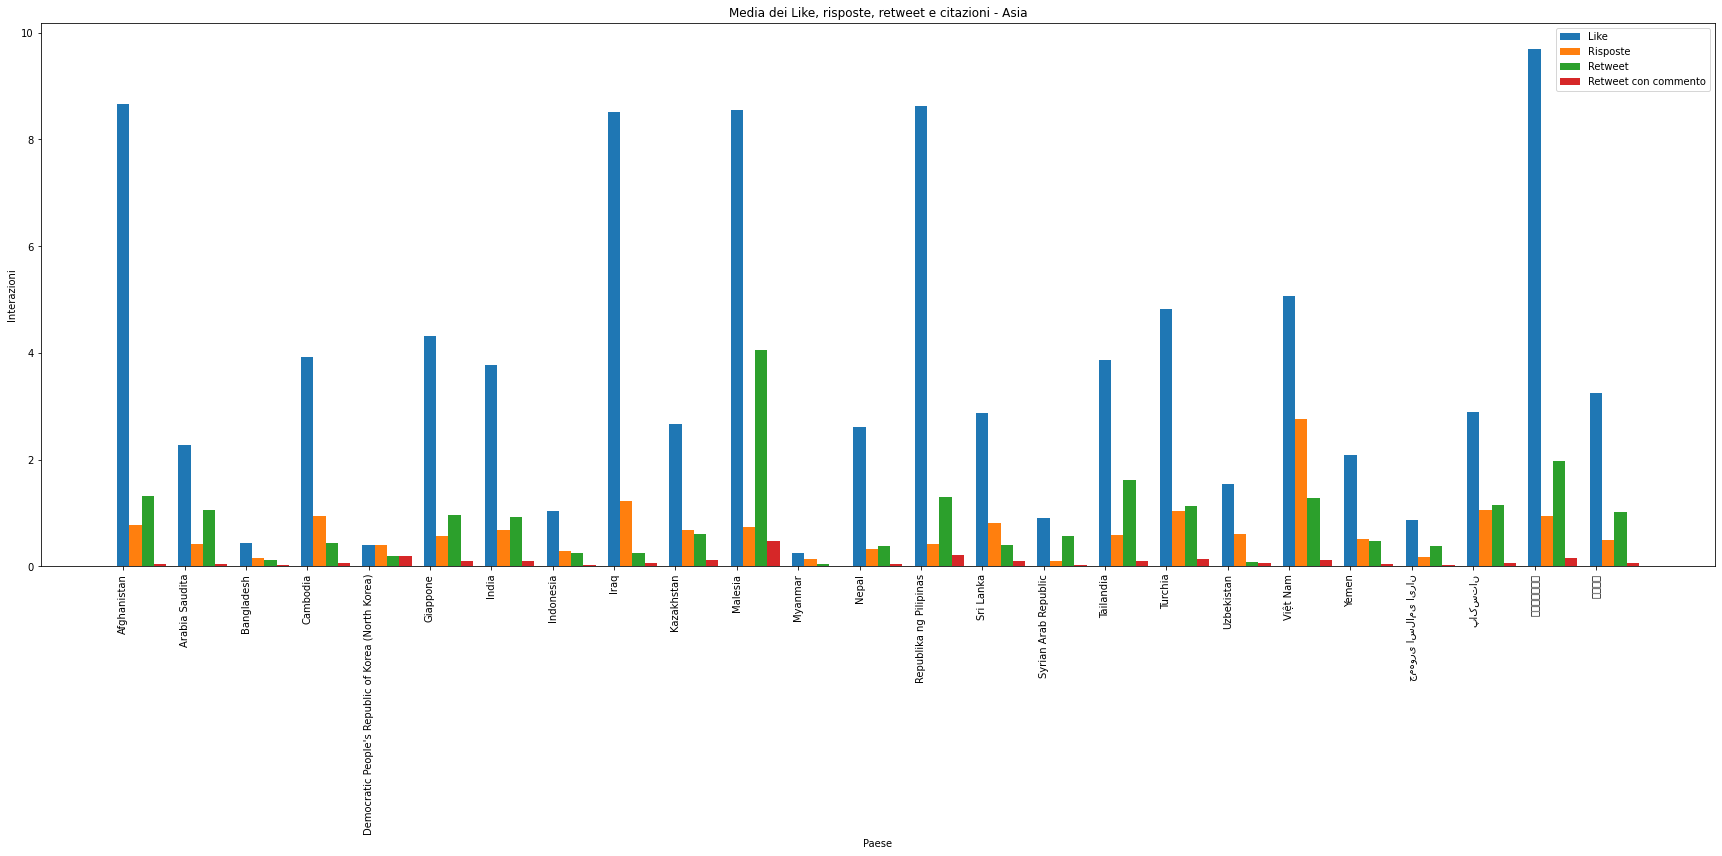

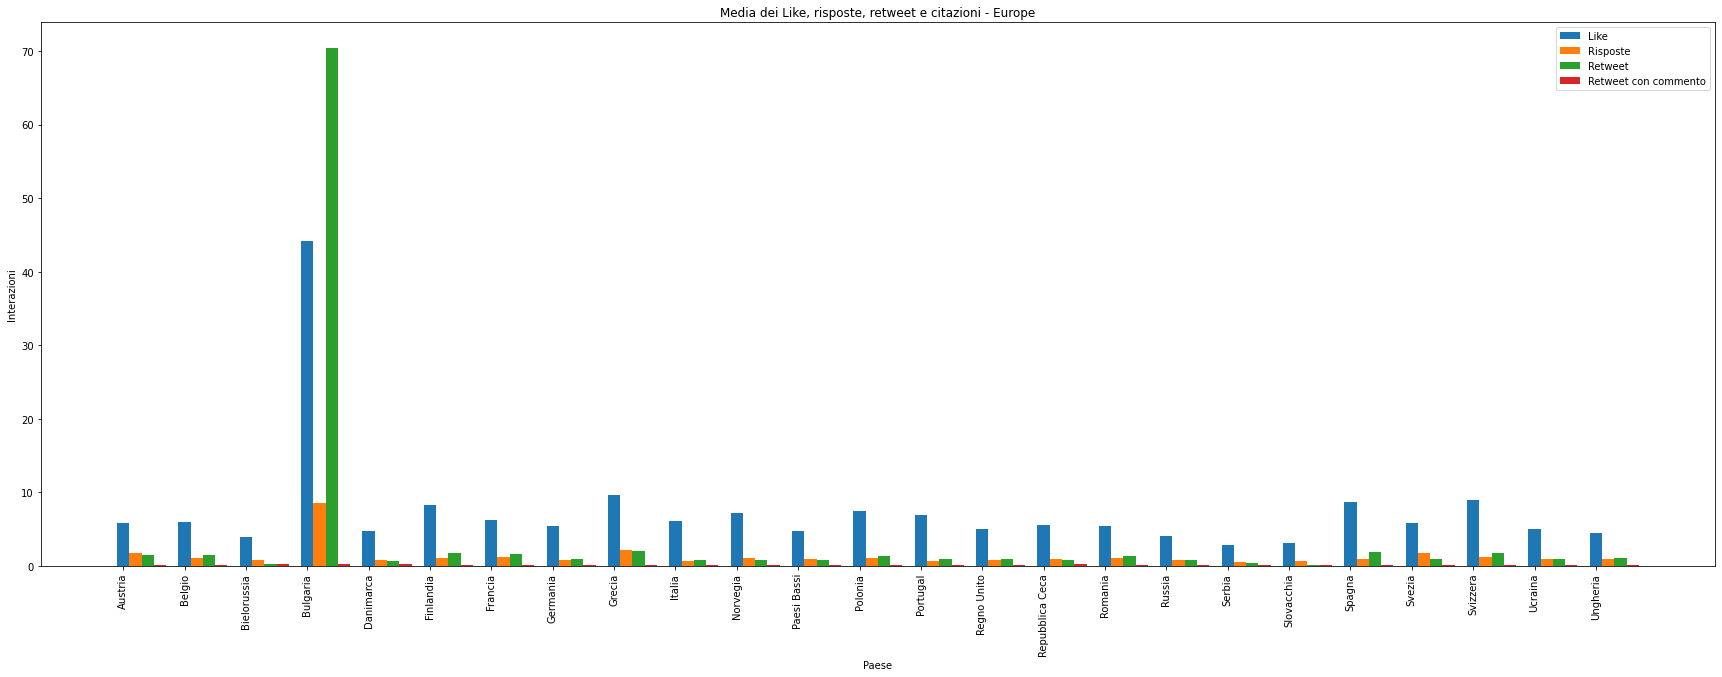

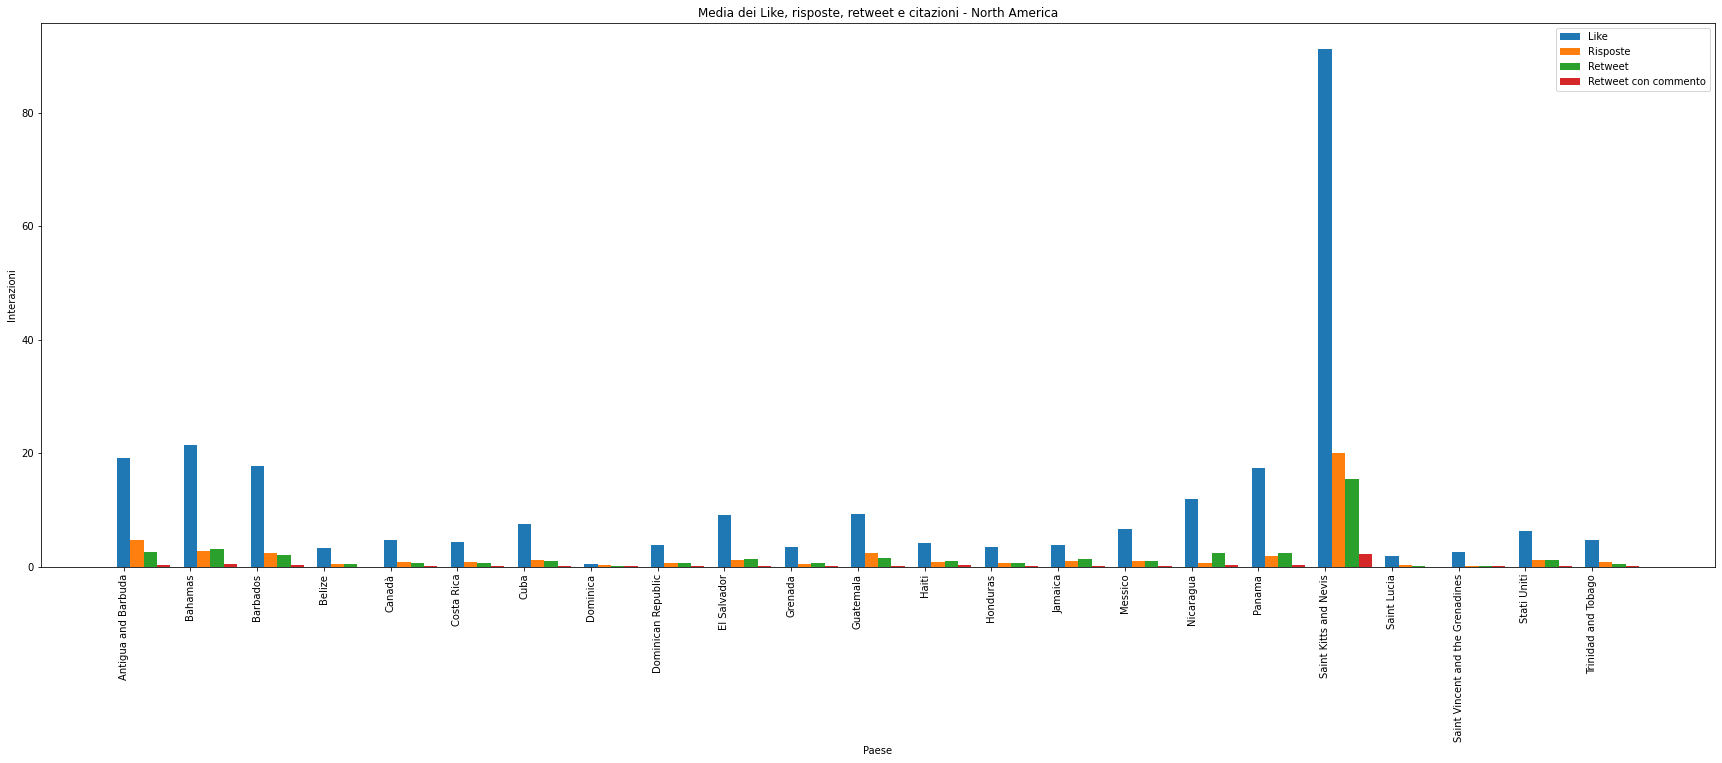

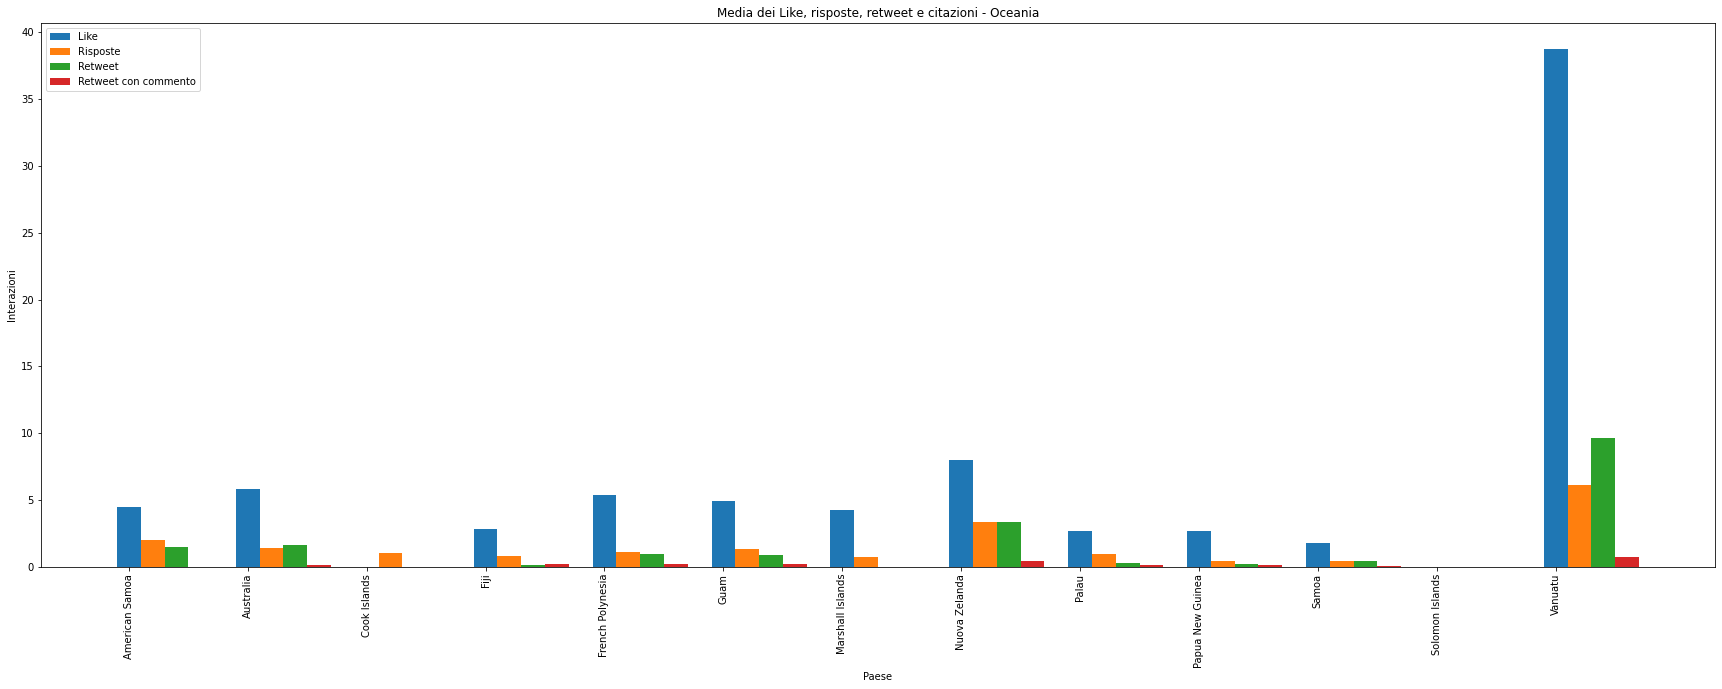

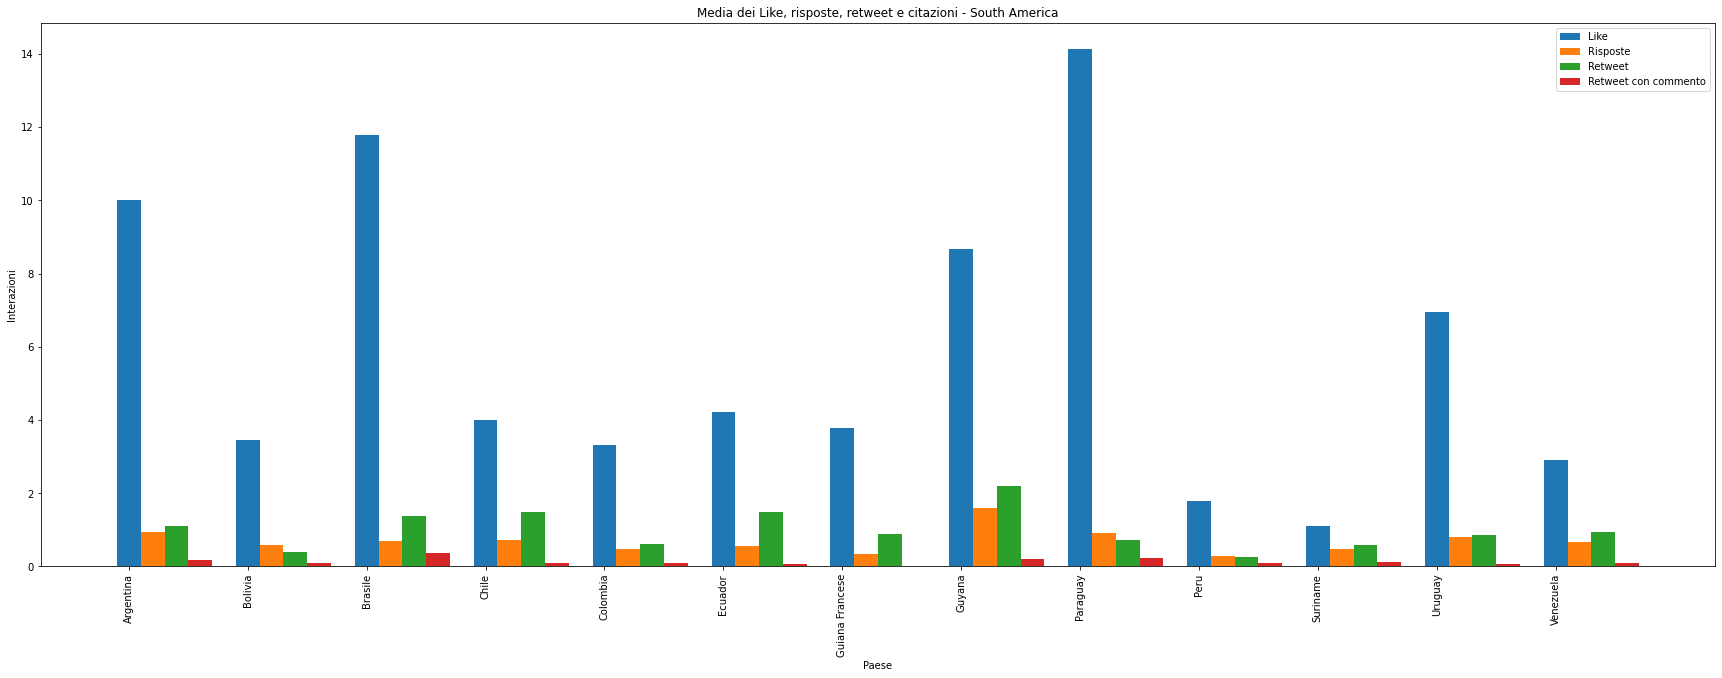

In [86]:
### OBIETTIVO 4 ###
plot_continent_sum(df_3, grouped)
plot_continent_mean(df_3, grouped)

/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


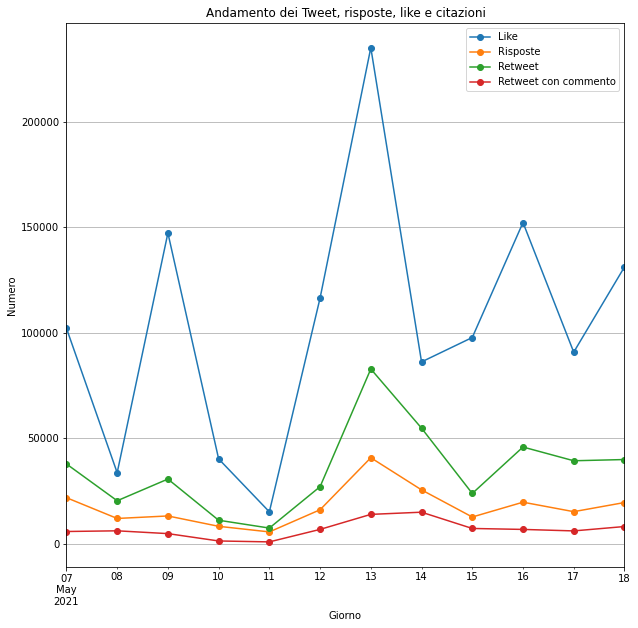

In [87]:
plot_daily_trends(df_3)

#### Crollo 5/05/2022 - 18-05-2022 restringere fino al giorno del crollo

In [88]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_4 = df[(df['created_at'] >= '2022-05-08') & (df['created_at'] <= '2022-05-15')]
df_4 = df_4.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count', 'public_metrics.quote_count'], ascending=False)

df_4 = df_4.reset_index(drop=True)
display (df_4.head(15))

,id,created_at,text,author.username,geo.country,geo.country_code,in_reply_to_user_id,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,Continent
0,1523658010241155073,2022-05-09T13:35:52.000Z,Chocolate milk is insanely good. Just had some.,elonmusk,NaN,NaN,NaN,1121022,15423,70205,74123,NaN
1,1524883482836623373,2022-05-12T22:45:27.000Z,Biden’s mistake is that he thinks he was elect...,elonmusk,NaN,NaN,NaN,1062304,13916,59739,91926,NaN
2,1525083159725056002,2022-05-13T11:58:54.000Z,Crypto bros yesterday vs. Crypto bros today #w...,Ryanair,NaN,NaN,NaN,231324,4634,2833,23565,NaN
3,1525276552900100097,2022-05-14T00:47:23.000Z,The only remaining stablecoin https://t.co/GlH...,baldridgecpa,NaN,NaN,NaN,192634,1284,949,17994,NaN
4,1524724947460911104,2022-05-12T12:15:30.000Z,"If you invested $100 in Luna one month ago, th...",paleofuture,NaN,NaN,NaN,161564,2306,1056,12208,NaN
5,1525485642204987395,2022-05-14T14:38:13.000Z,KKKKKKKKKKKK O GUSTAVO 🗣 https://t.co/JnQsIUhm19,Itspedrito,NaN,NaN,NaN,104967,3660,518,3012,NaN
6,1525123256977612800,2022-05-13T14:38:14.000Z,crypto is an mlm for people who think they're ...,MikeDrucker,NaN,NaN,NaN,103898,736,676,10230,NaN
7,1523742670044413954,2022-05-09T19:12:16.000Z,El Salvador just bought the dip! 🇸🇻\n\n500 coi...,nayibbukele,NaN,NaN,NaN,99887,4092,6144,13362,NaN
8,1523646766549434373,2022-05-09T12:51:11.000Z,Monday morning is time to get back to work. #B...,saylor,NaN,NaN,NaN,87148,1483,4068,11038,NaN
9,1523842052718358528,2022-05-10T01:47:11.000Z,Crowd here in COMELEC now about 2k. More stude...,iskrukutoy,Republika ng Pilipinas,PH,NaN,83428,920,325,11681,Asia


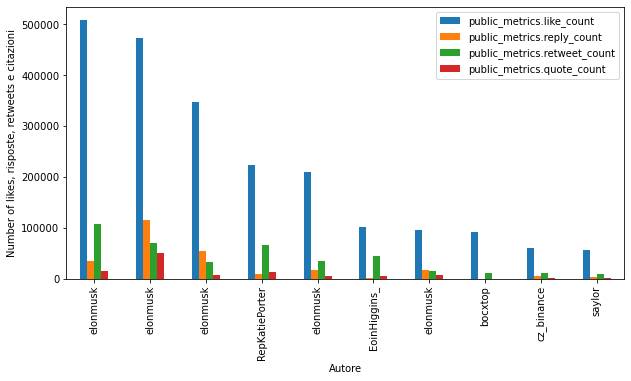

In [89]:
# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df4_sorted = df_4.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count', 'public_metrics.quote_count'], ascending=False)
df4_top10 = df1_sorted.head(10)

# Plot
df4_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count', 'public_metrics.quote_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, risposte, retweets e citazioni')
plt.show()


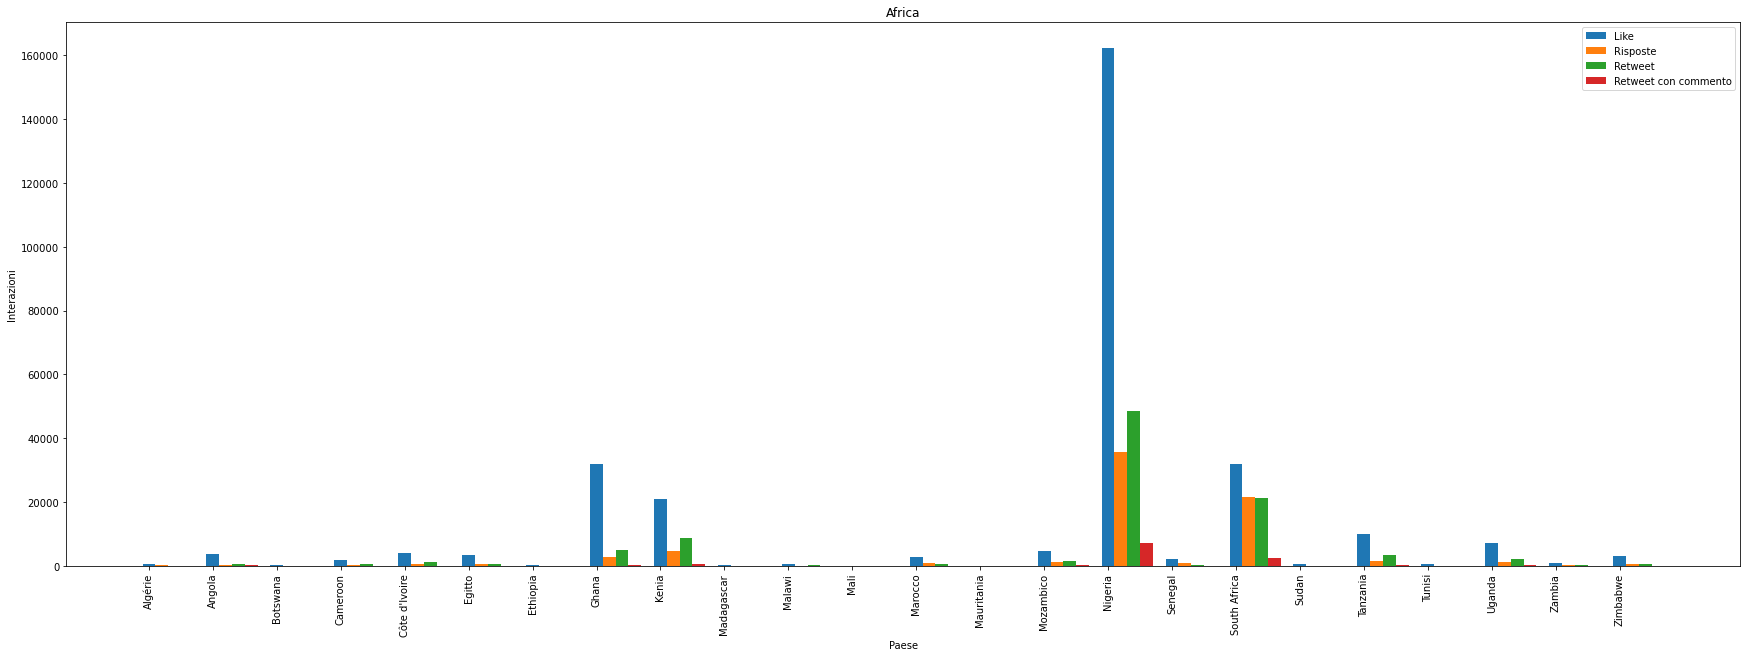

/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIF

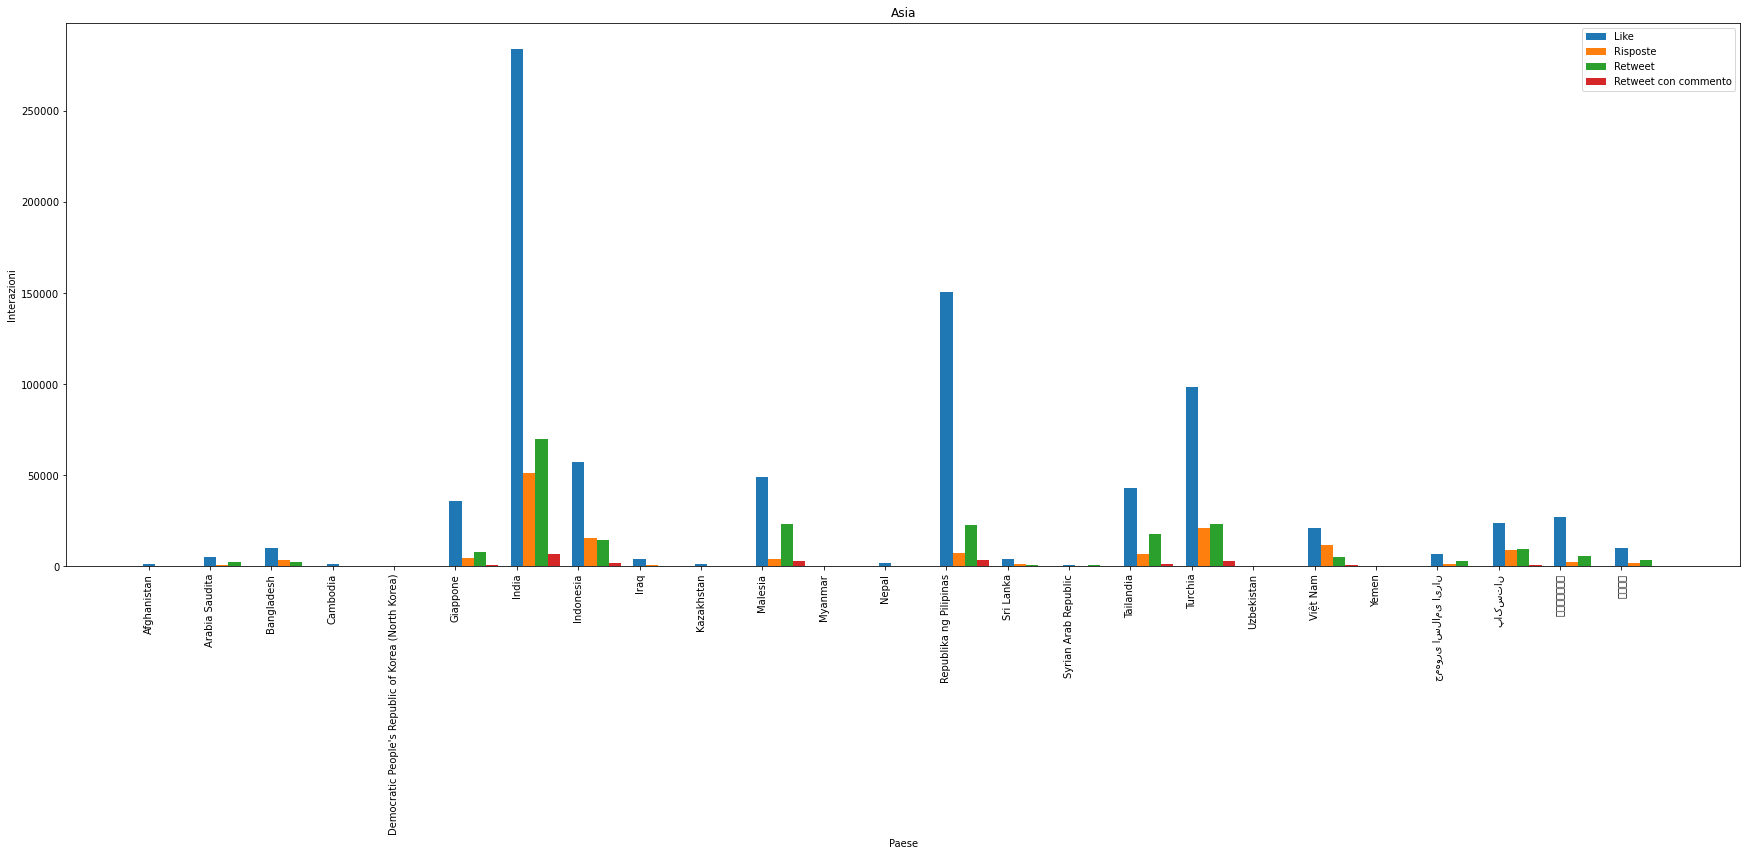

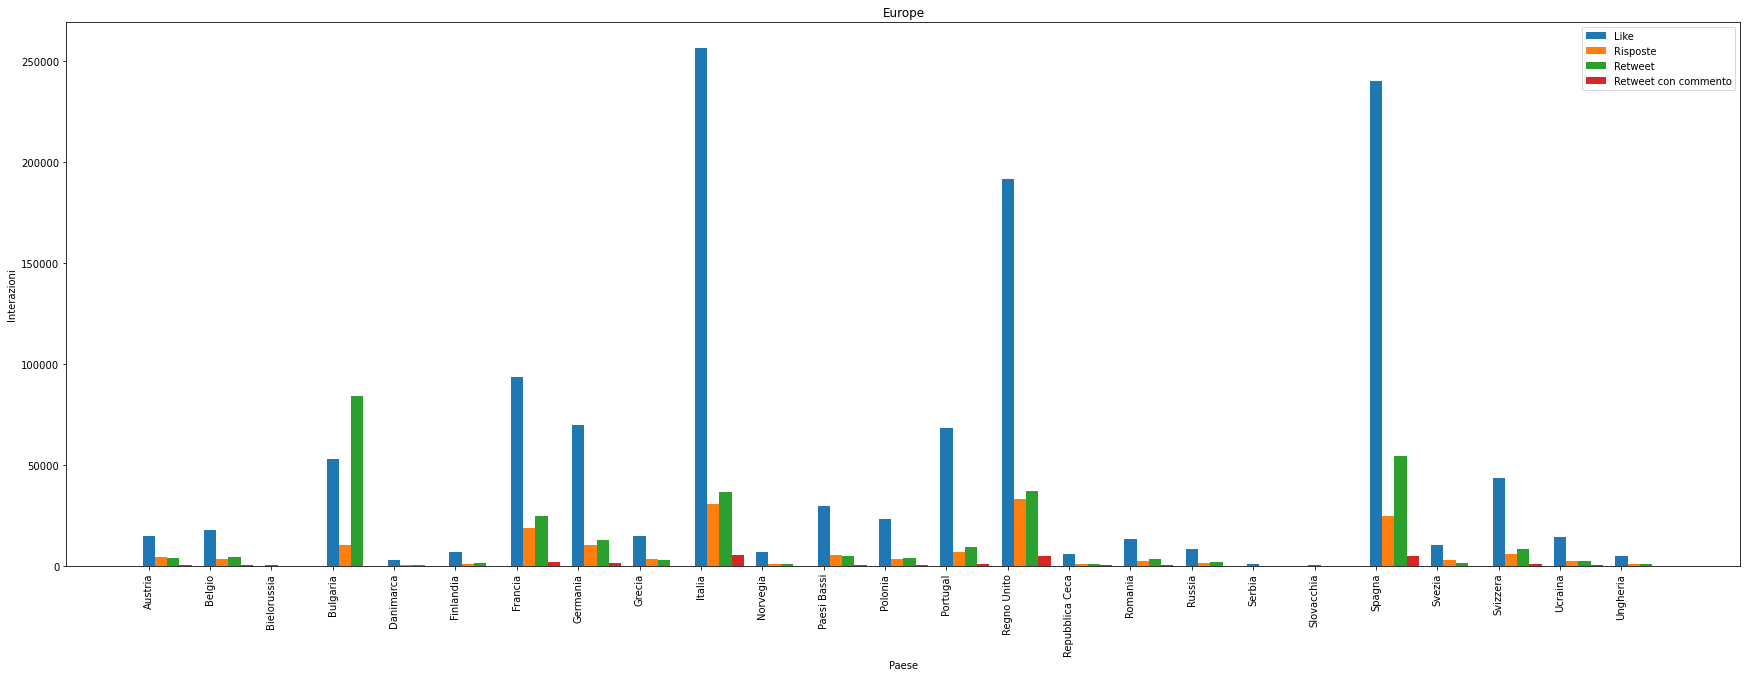

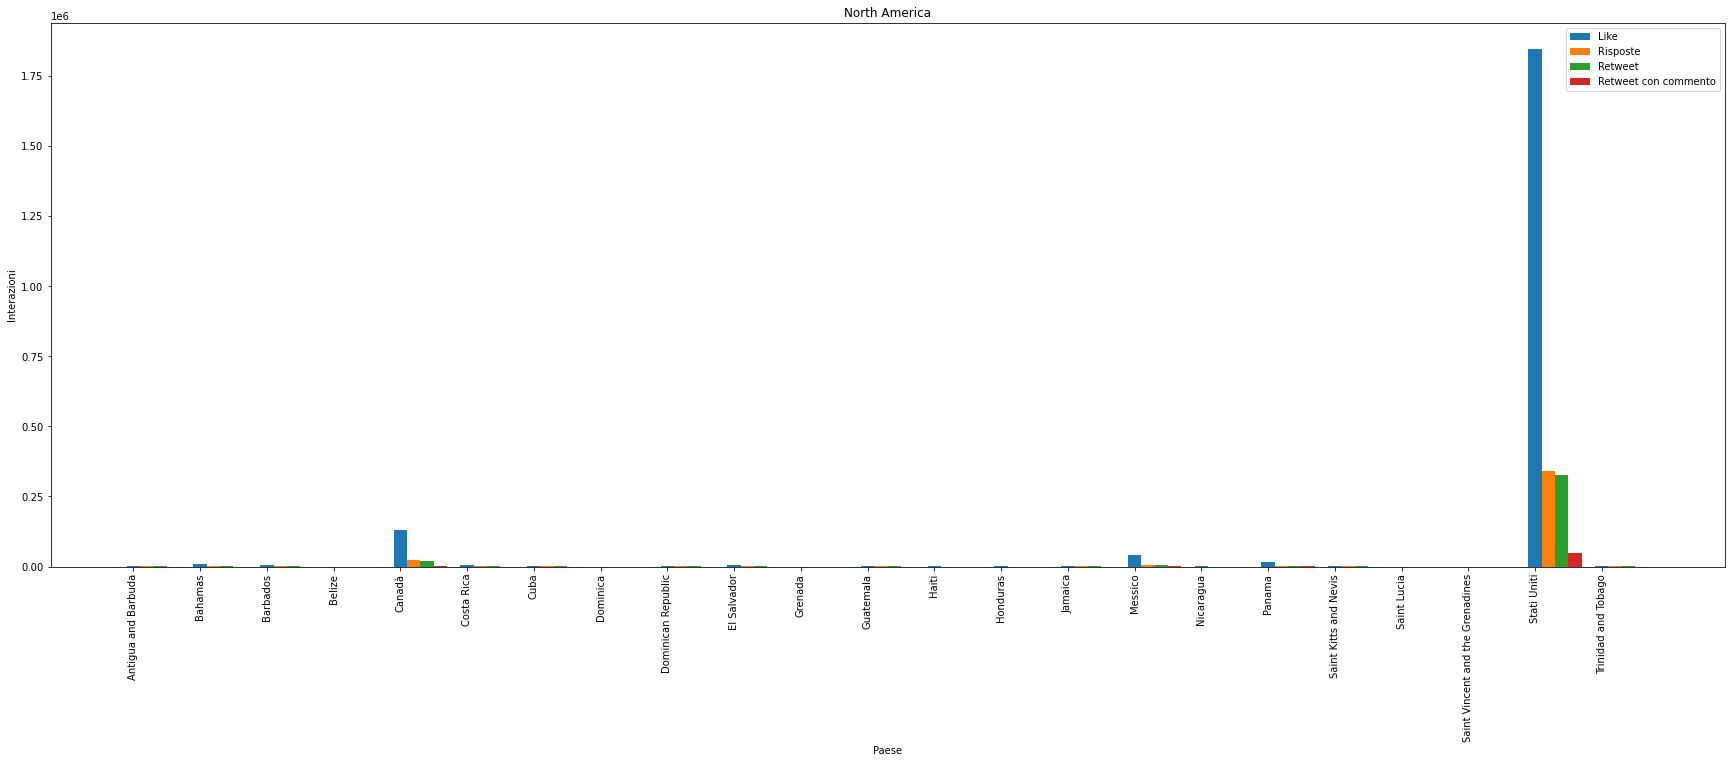

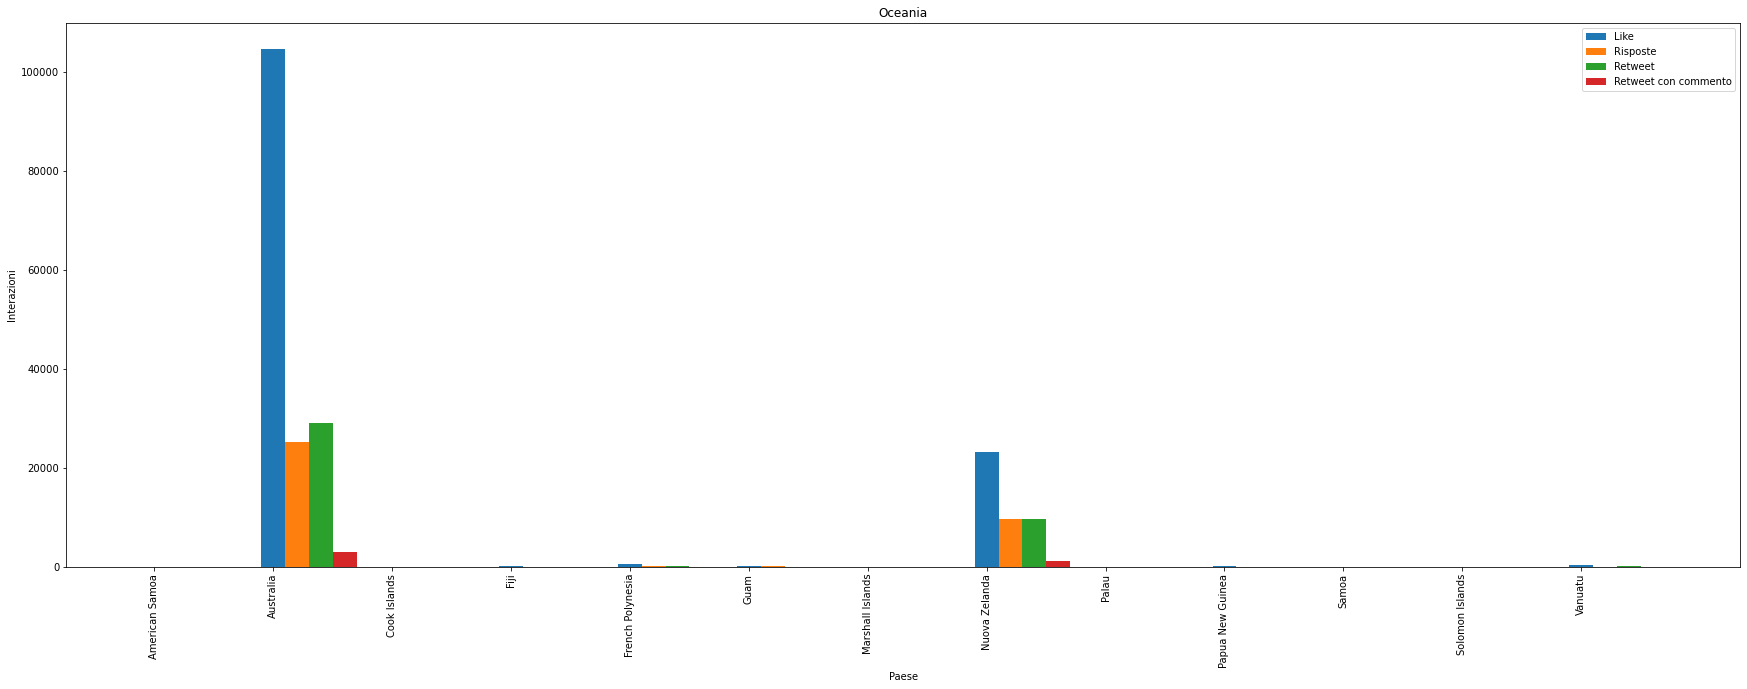

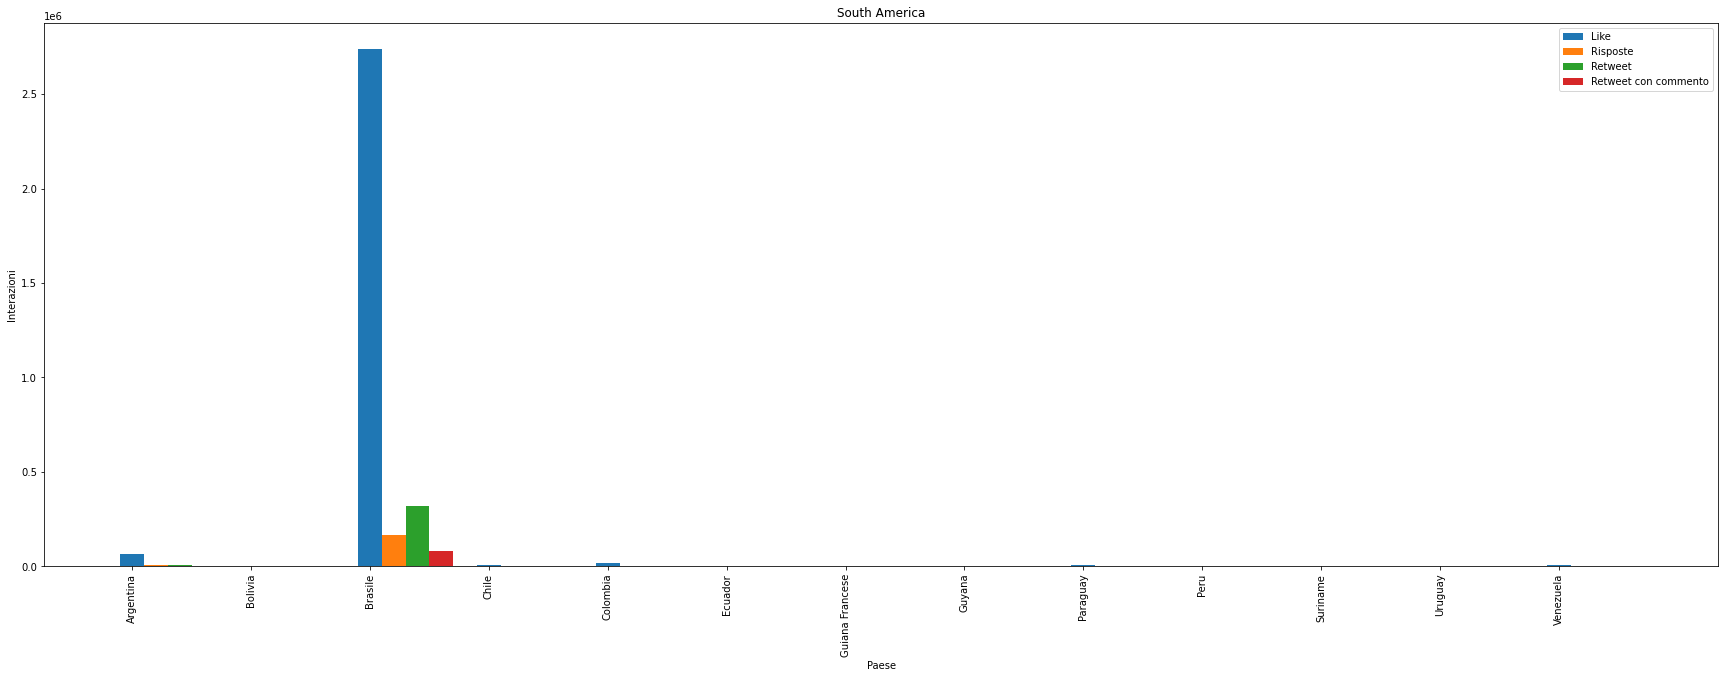

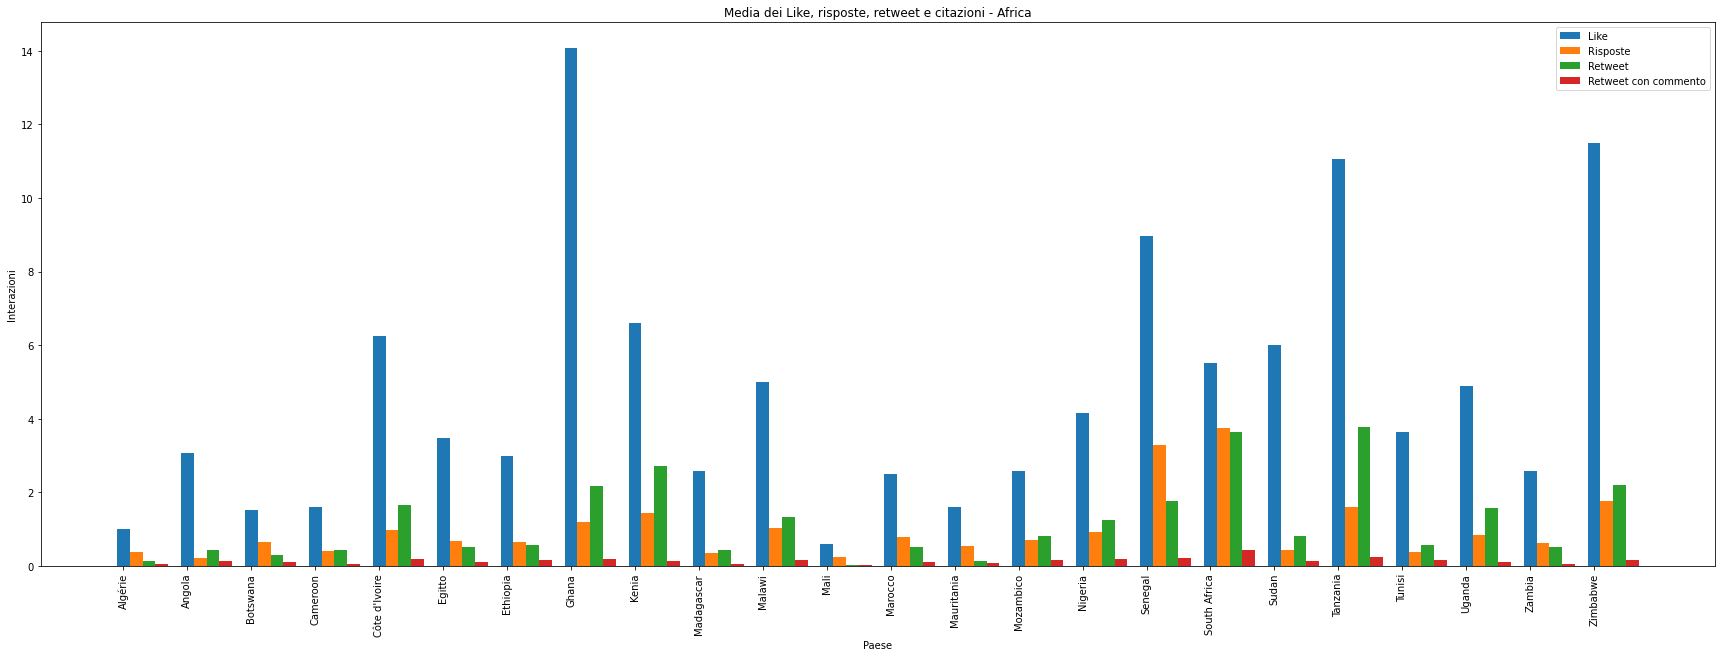

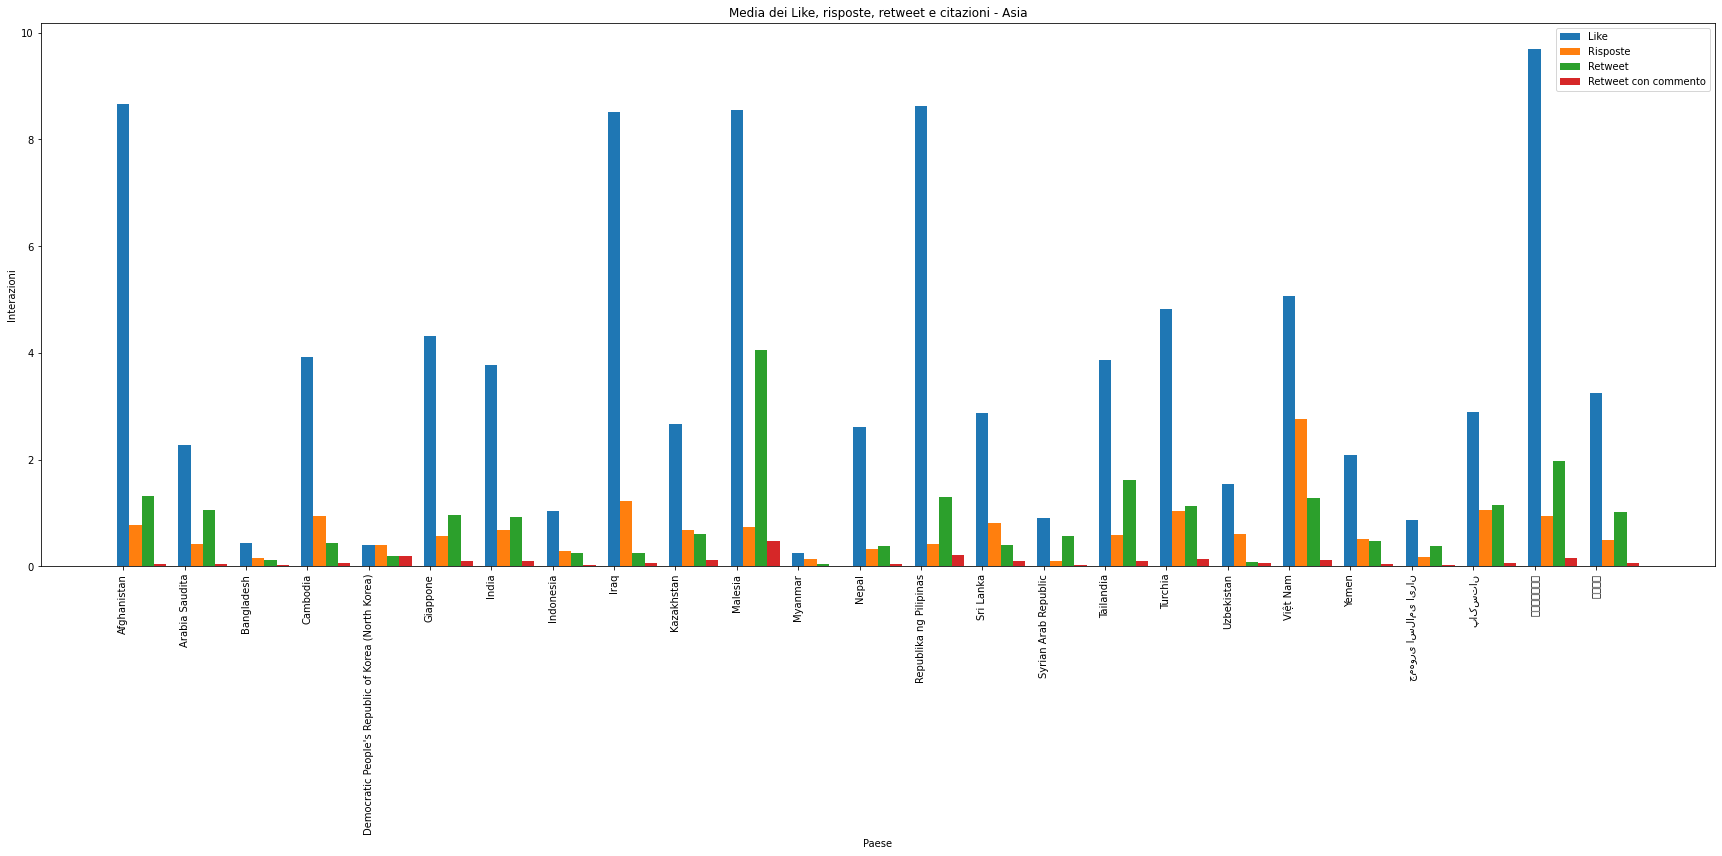

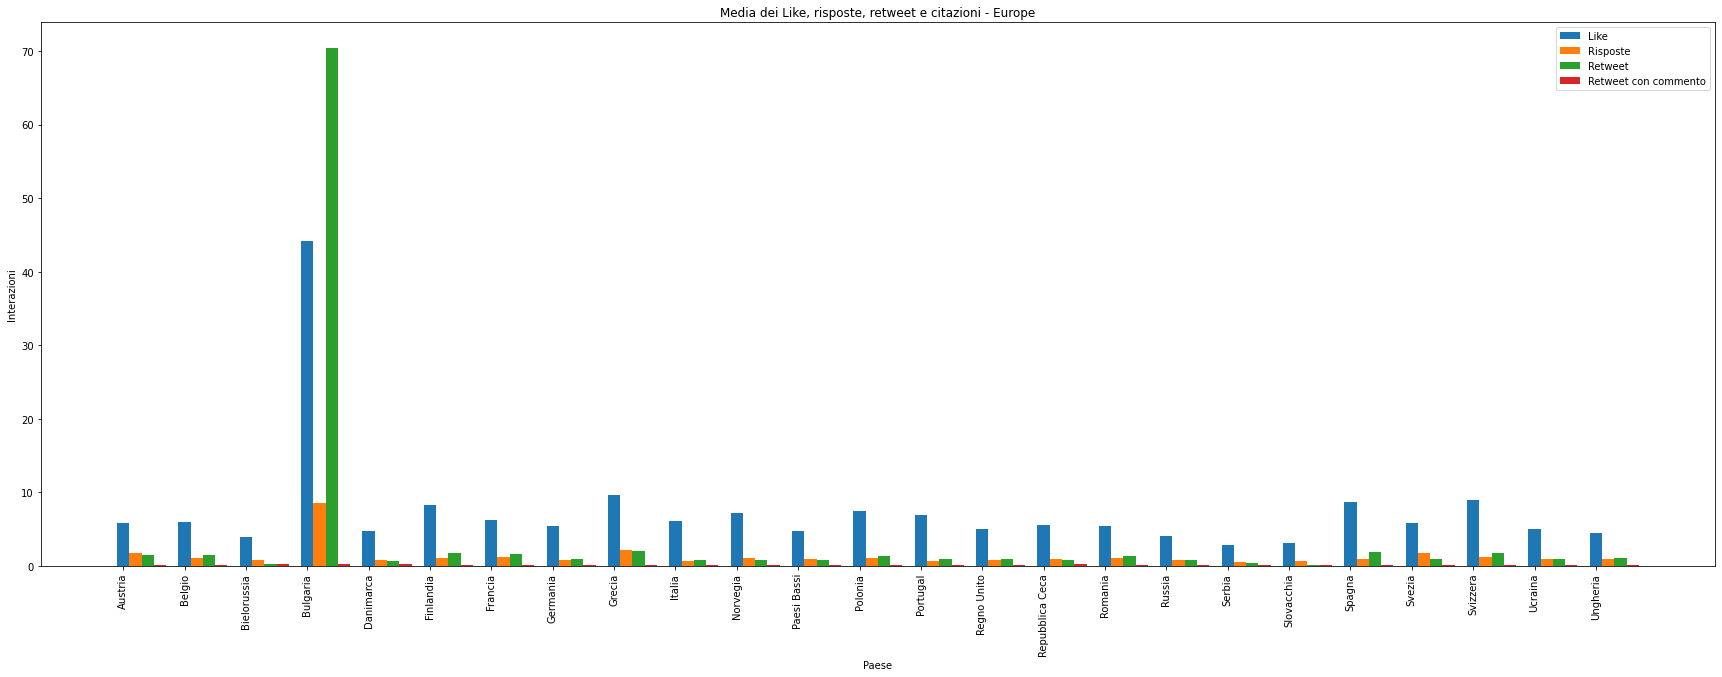

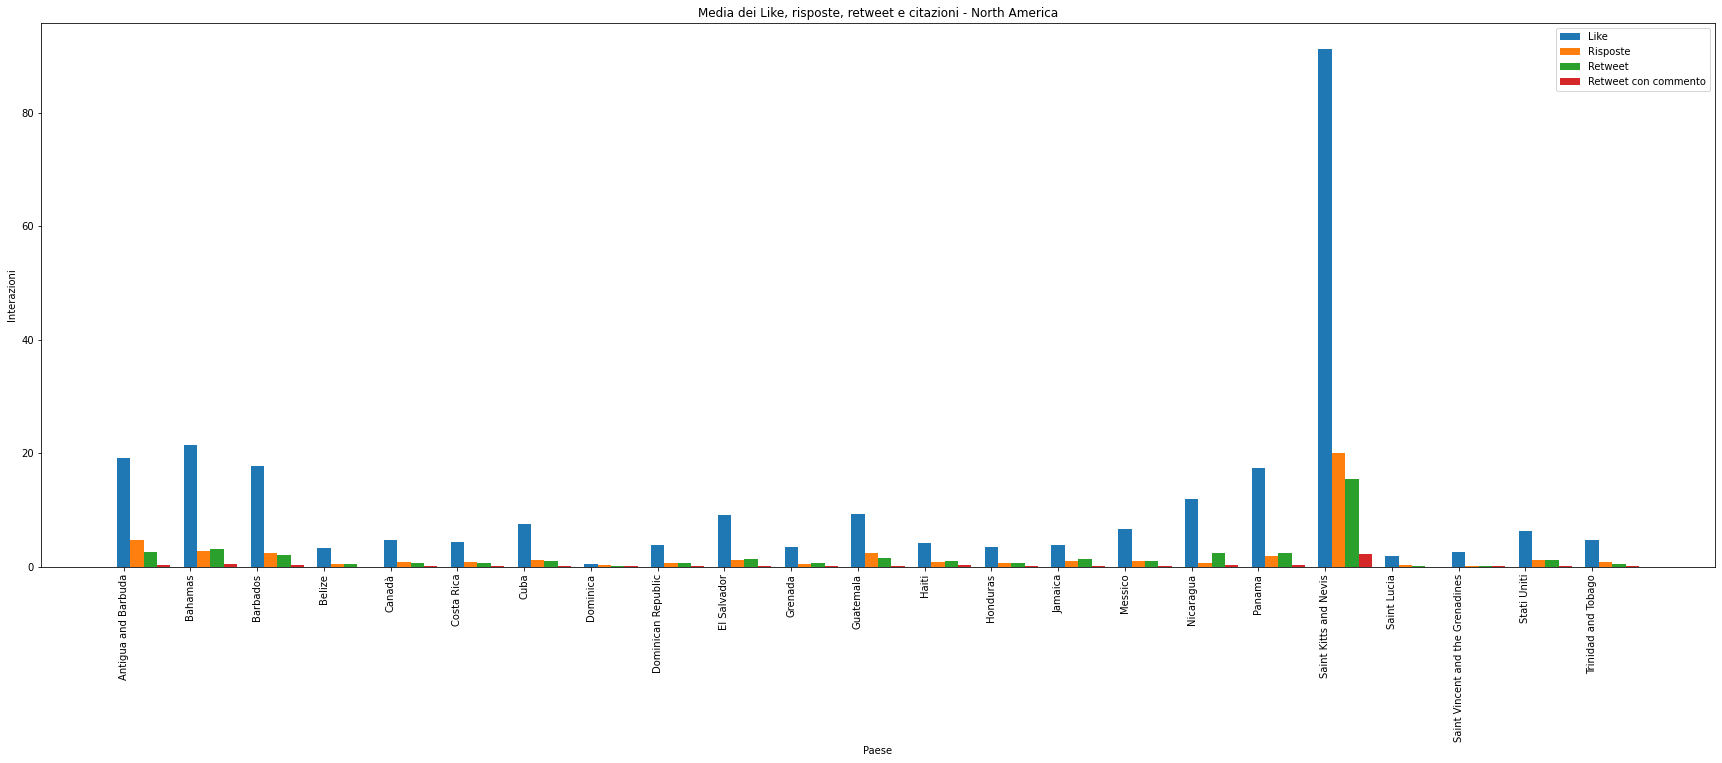

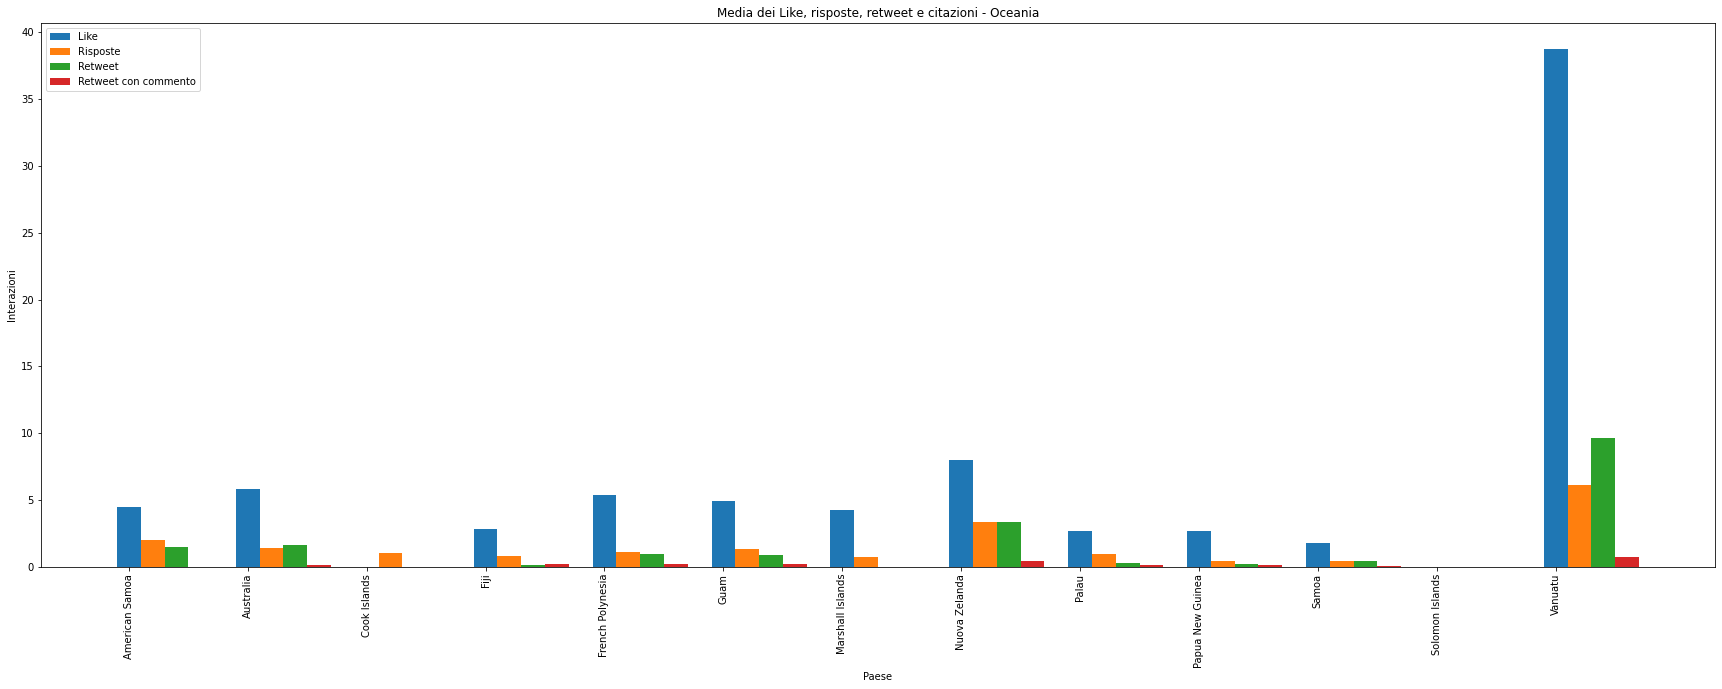

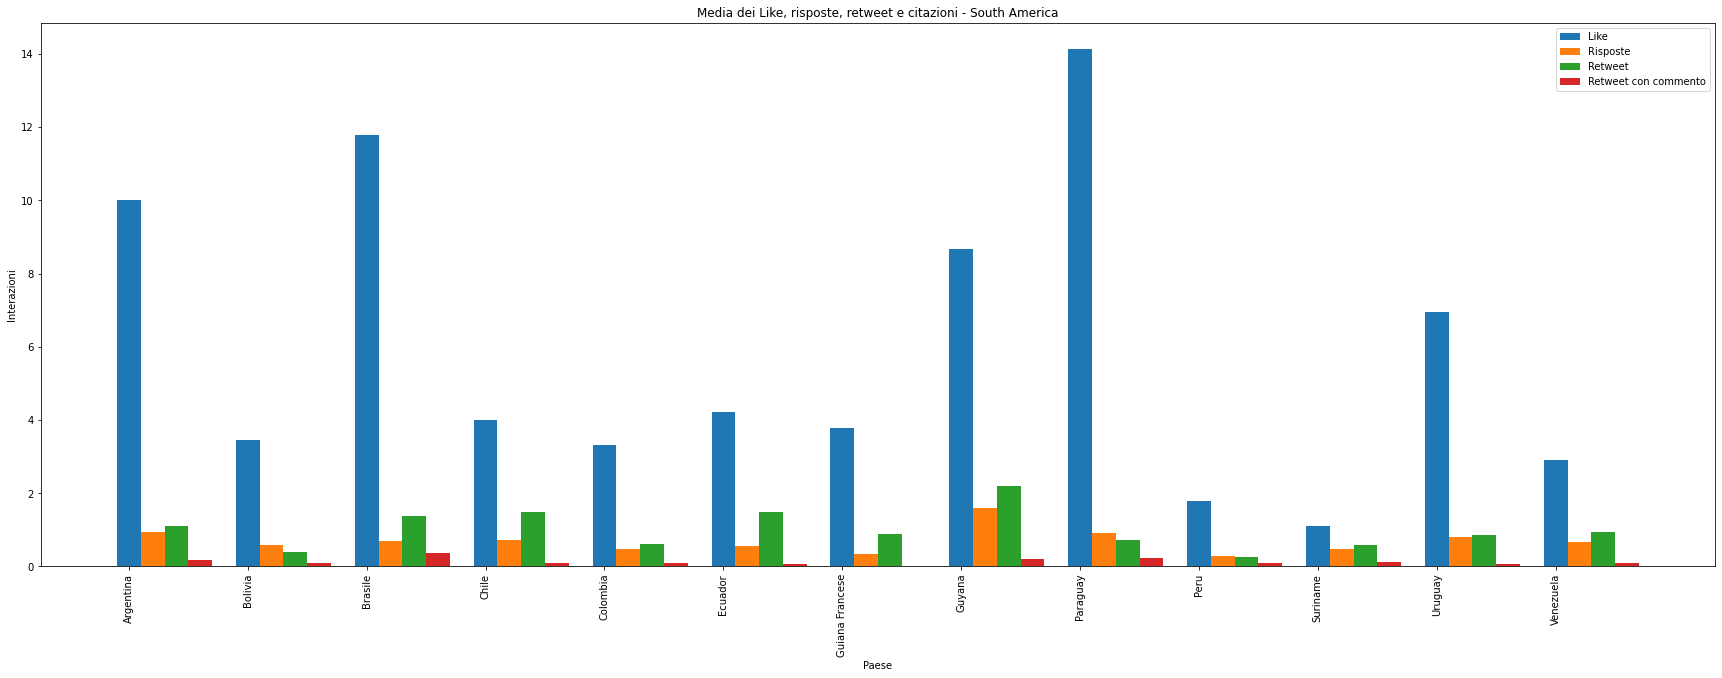

In [90]:
### OBIETTIVO 4 ###
plot_continent_sum(df_4, grouped)
plot_continent_mean(df_4, grouped)

/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


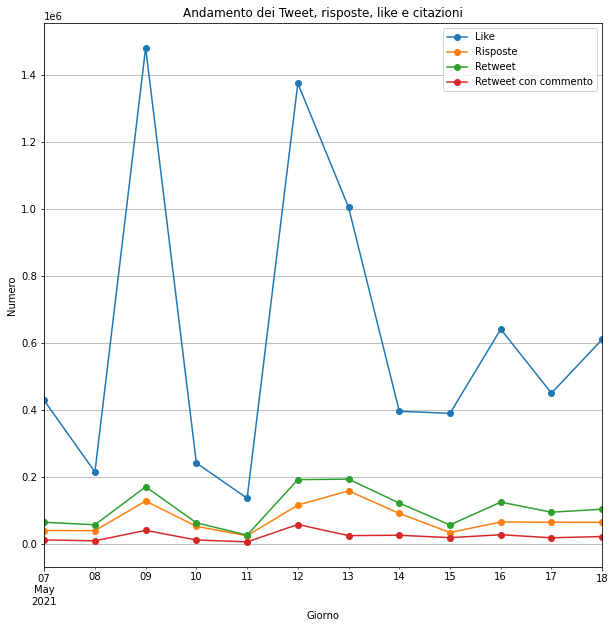

In [91]:
plot_daily_trends(df_4)

#### Obiettivo 2 - Capire il tipo di interazione tra gli utenti

Media di likes per tweet: 166.8679614376638
Media di retweets per tweet: 58.7900989017846
Media di risposte per tweet: 32.90838091226757
Media di citazioni per Citazioni: 17.449905622114066
Tasso di interazione: 0          24310.797766
1          24310.796596
2          24310.796596
3          24310.796596
4          24310.796596
               ...     
1282075    24310.796596
1282076    24310.796674
1282077    24310.796596
1282078    24310.796596
1282079    24310.796596
Name: public_metrics.reply_count, Length: 1282080, dtype: float64


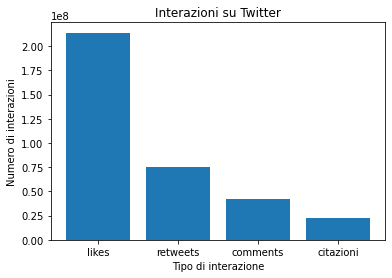

In [92]:
df_means = df[['public_metrics.like_count', 'public_metrics.reply_count', 'public_metrics.retweet_count', 'public_metrics.quote_count']]
# calcola la media delle interazioni per tweet
mean_likes = df_means['public_metrics.like_count'].mean()
mean_retweets = df_means['public_metrics.retweet_count'].mean() 
mean_comments = df_means['public_metrics.reply_count'].mean()
mean_quotes = df_means['public_metrics.quote_count'].mean()

# calcola il tasso di interazione
total_tweets = len(df_means.index)
total_interactions = df_means['public_metrics.like_count'].sum() + df_means['public_metrics.retweet_count'].sum() + df_means['public_metrics.reply_count'] + df_means['public_metrics.quote_count'].sum()
interaction_rate = total_interactions / total_tweets * 100

# stampa le metriche
print("Media di likes per tweet:", mean_likes)
print("Media di retweets per tweet:", mean_retweets)
print("Media di risposte per tweet:", mean_comments)
print("Media di citazioni per Citazioni:", mean_quotes)
print("Tasso di interazione:", interaction_rate)

# crea un grafico a barre delle interazioni per tweet
interactions = ['likes', 'retweets', 'comments', 'citazioni']
values = [df_means['public_metrics.like_count'].sum(), df_means['public_metrics.retweet_count'].sum(), df_means['public_metrics.reply_count'].sum(), df_means['public_metrics.quote_count'].sum()]
plt.bar(interactions, values)
plt.xlabel("Tipo di interazione")
plt.ylabel("Numero di interazioni")
plt.title("Interazioni su Twitter")
plt.show()

Numero totale di tweet: 1282080
Numero totale di risposte: 42191177
Numero totale di like: 213938076
Numero totale di retweet: 75373610
Numero totale di citazioni: 22372175
Percentuale di tweet con risposte: 3290.8380912267567
Percentuale di tweet con like: 16686.79614376638
Percentuale di tweet con retweet: 5879.00989017846
Percentuale di tweet con citazioni: 1744.9905622114065


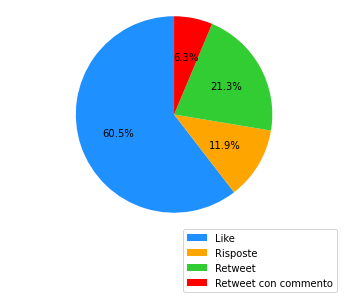

In [93]:
# Calcola il numero di commenti, like e retweet per ogni tweet
comment_counts = df['public_metrics.reply_count'].sum()
like_counts = df['public_metrics.like_count'].sum()
retweet_counts = df['public_metrics.retweet_count'].sum()
quote_counts = df['public_metrics.quote_count'].sum()

# Calcola la percentuale di tweet con commenti, like e retweet rispetto al totale dei tweet
total_tweets = len(df)
comment_percentage = (comment_counts / total_tweets) * 100
like_percentage = (like_counts / total_tweets) * 100
retweet_percentage = (retweet_counts / total_tweets) * 100
quote_percentage = (quote_counts / total_tweets) * 100


# Stampa i risultati
print("Numero totale di tweet:", total_tweets)
print("Numero totale di risposte:", comment_counts)
print("Numero totale di like:", like_counts)
print("Numero totale di retweet:", retweet_counts)
print("Numero totale di citazioni:", quote_counts)
print("Percentuale di tweet con risposte:", comment_percentage)
print("Percentuale di tweet con like:", like_percentage)
print("Percentuale di tweet con retweet:", retweet_percentage)
print("Percentuale di tweet con citazioni:", quote_percentage)

# Crea un grafico a torta per visualizzare le percentuali
labels = ['Like', 'Risposte', 'Retweet', 'Retweet con commento']
sizes = [ like_percentage, comment_percentage, retweet_percentage, quote_percentage]
colors = [ 'dodgerblue','orange','limegreen', 'red' ]

plt.pie(sizes,  colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
#plt.title('Distribuzione delle interazioni')
plt.legend(labels, loc='best', bbox_to_anchor=(1, 0))

plt.show()


### Obiettivo 3

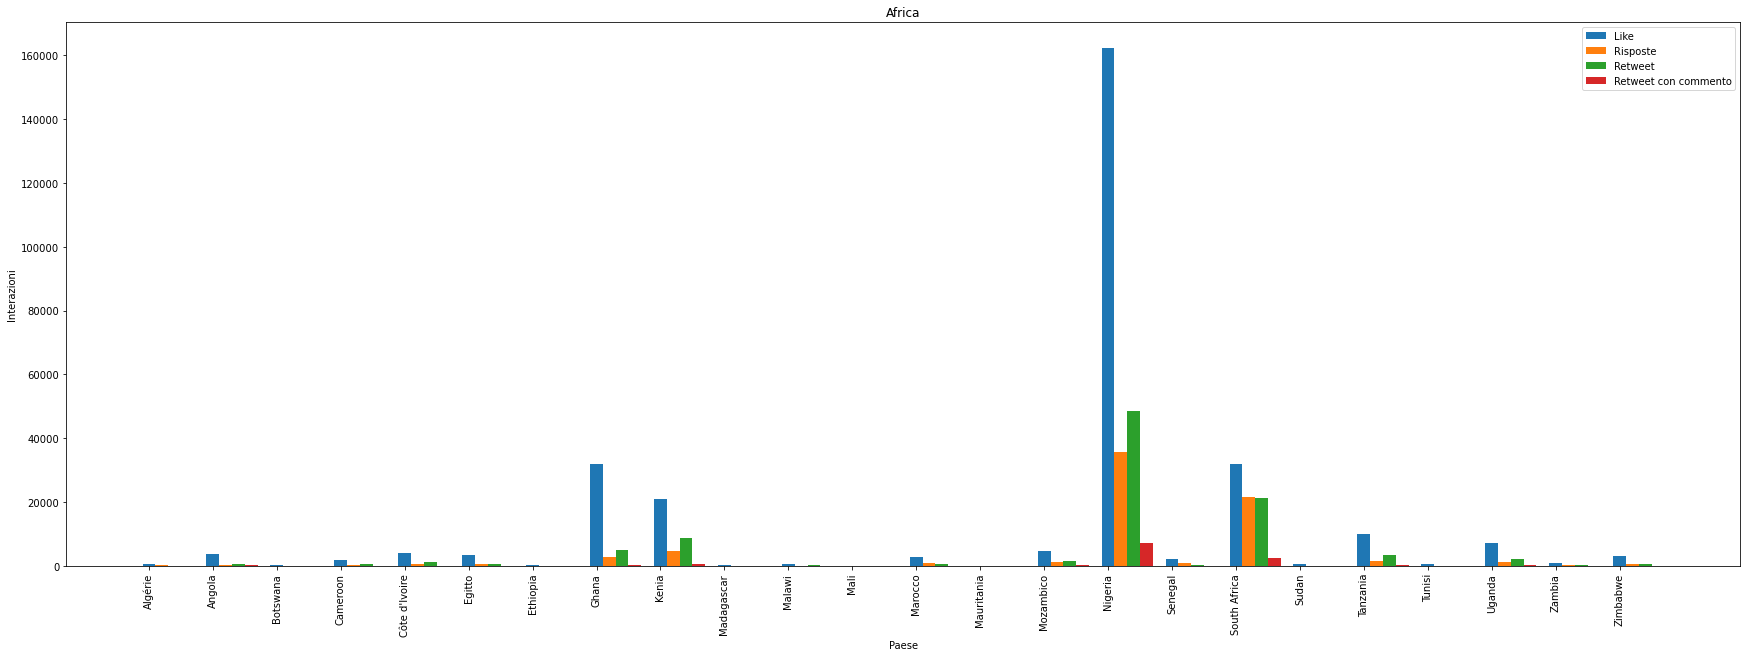

/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIF

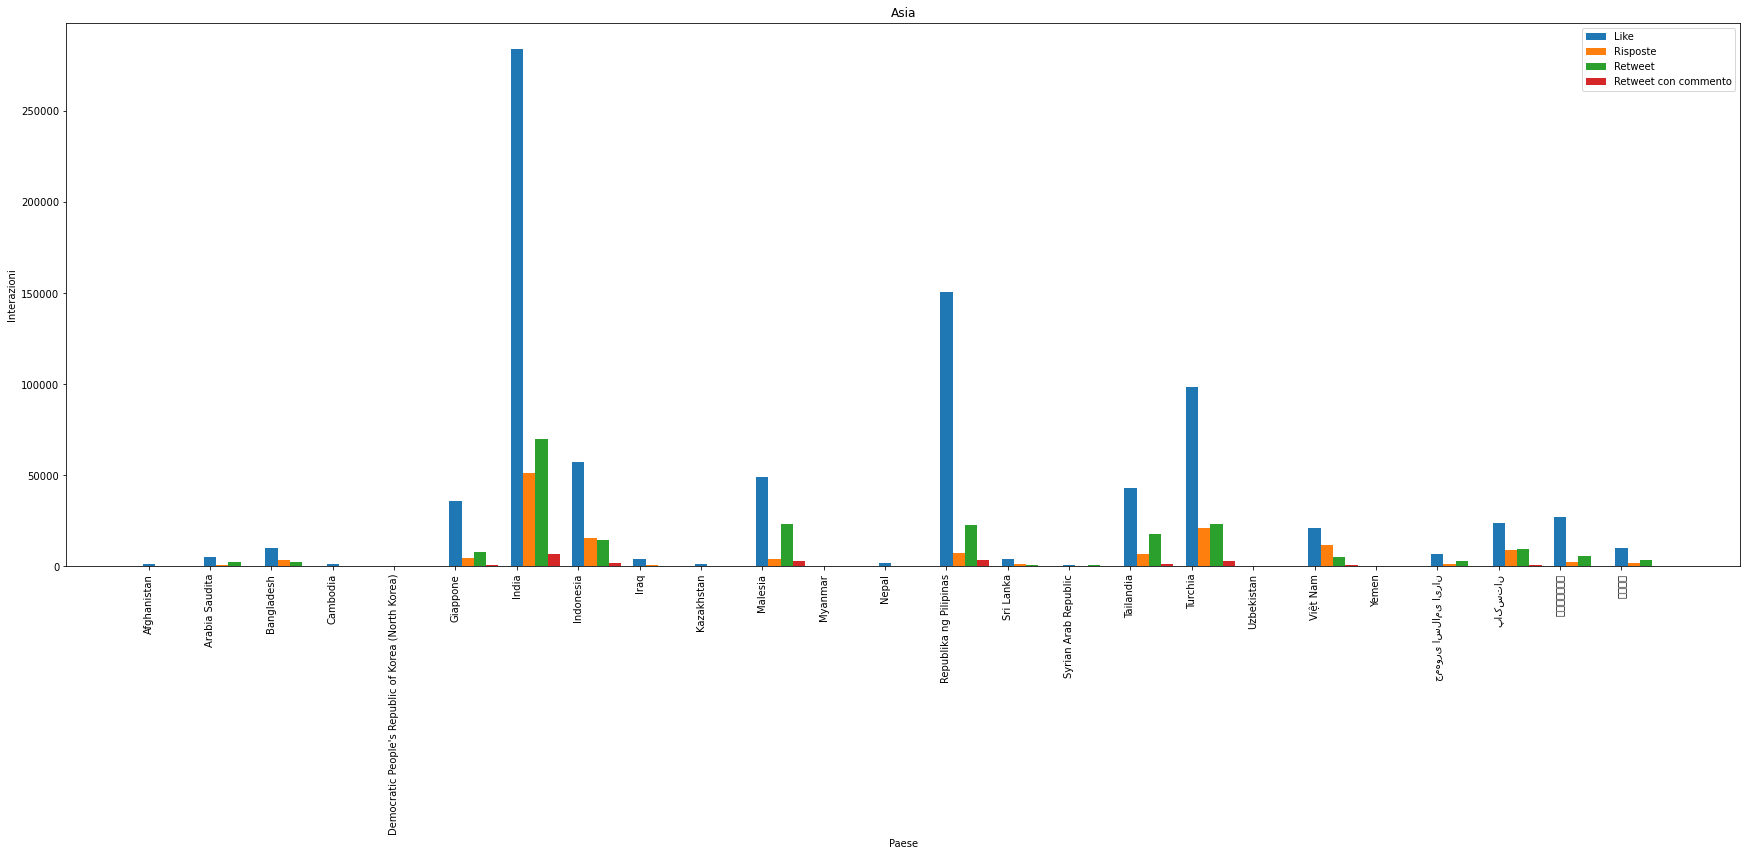

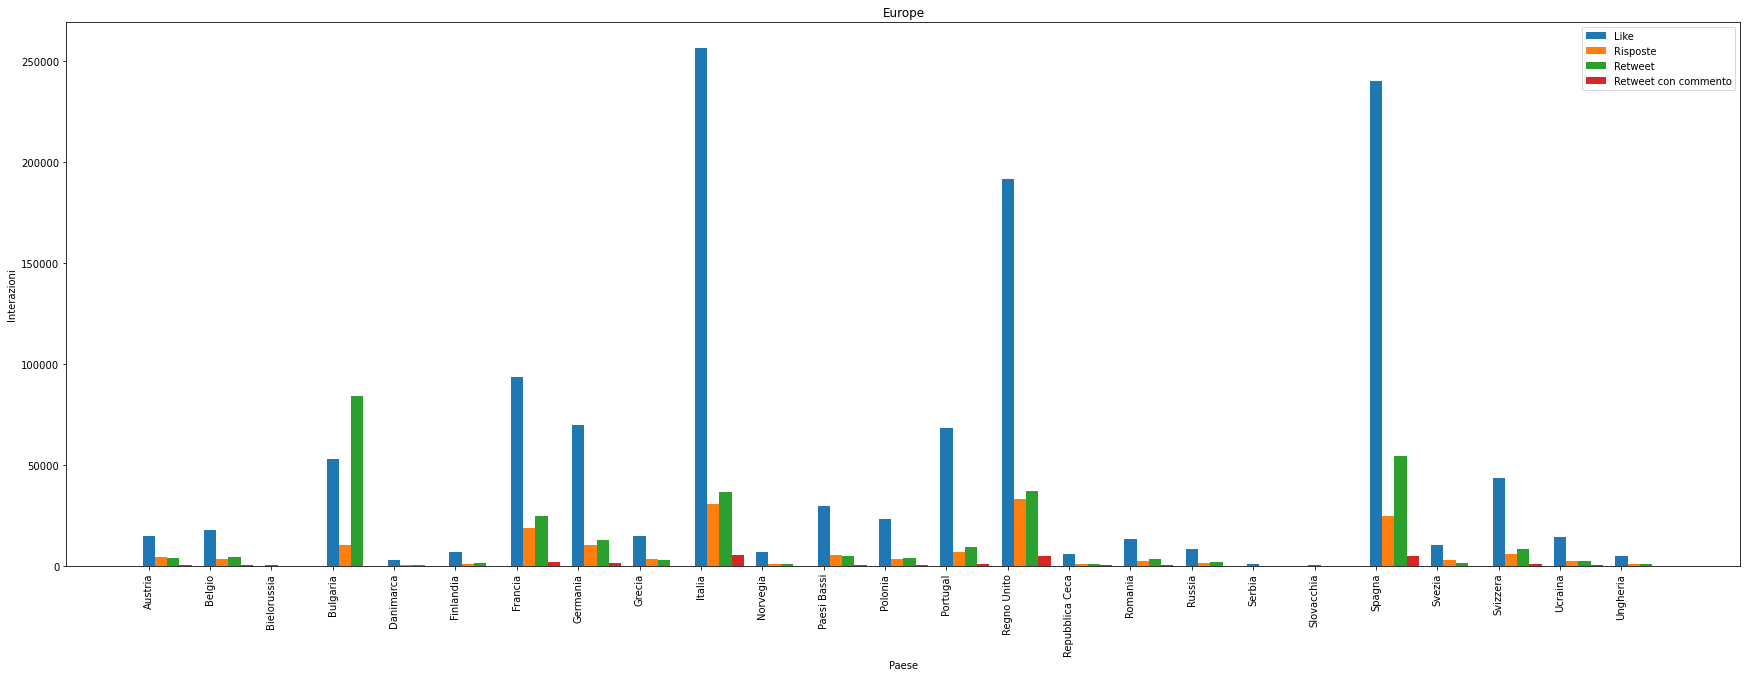

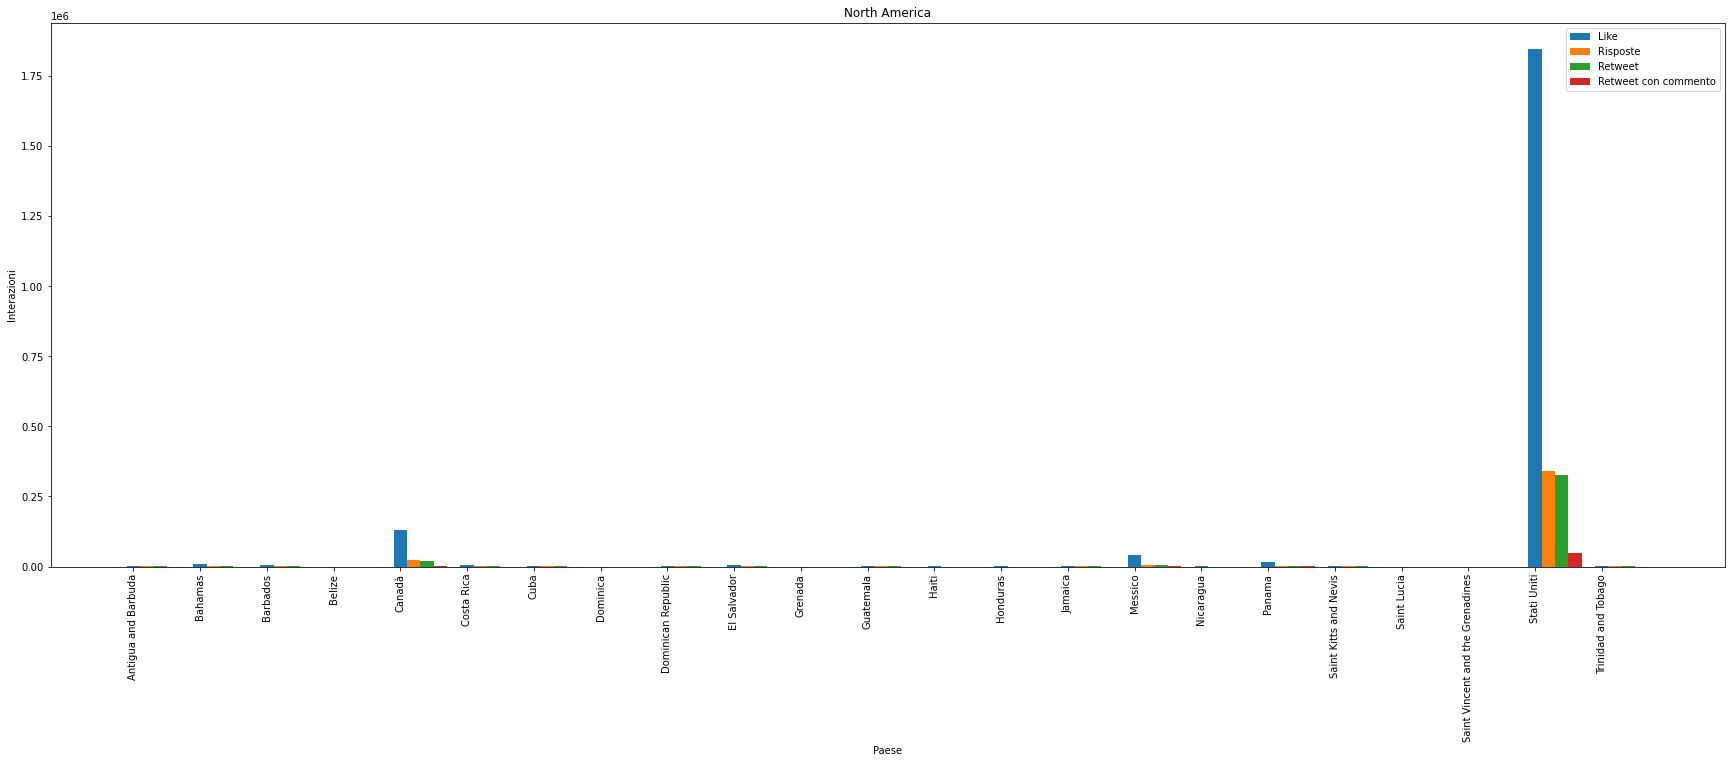

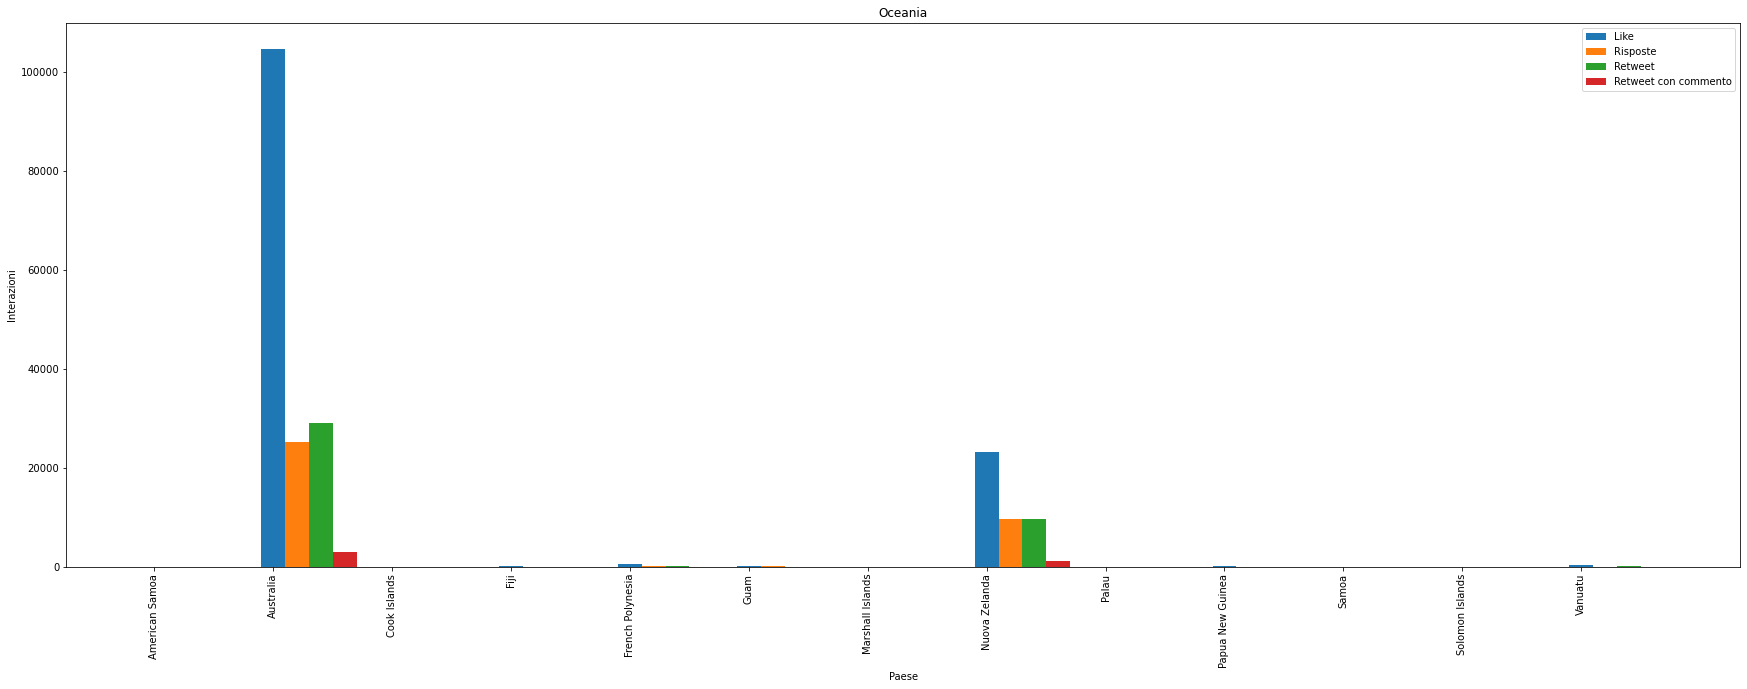

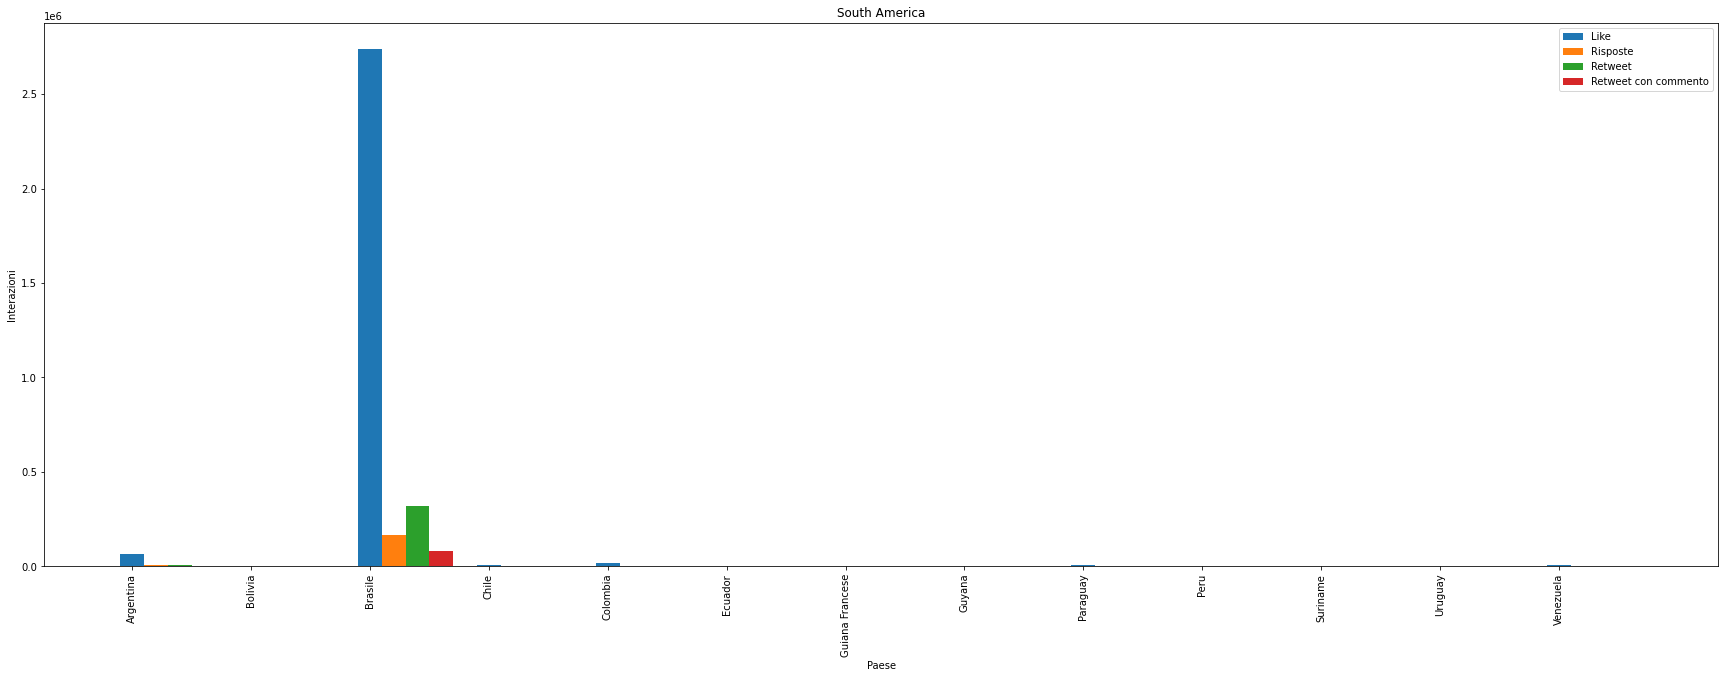

In [94]:
### OBIETTIVO 3 ###
plot_continent_sum(df, grouped)


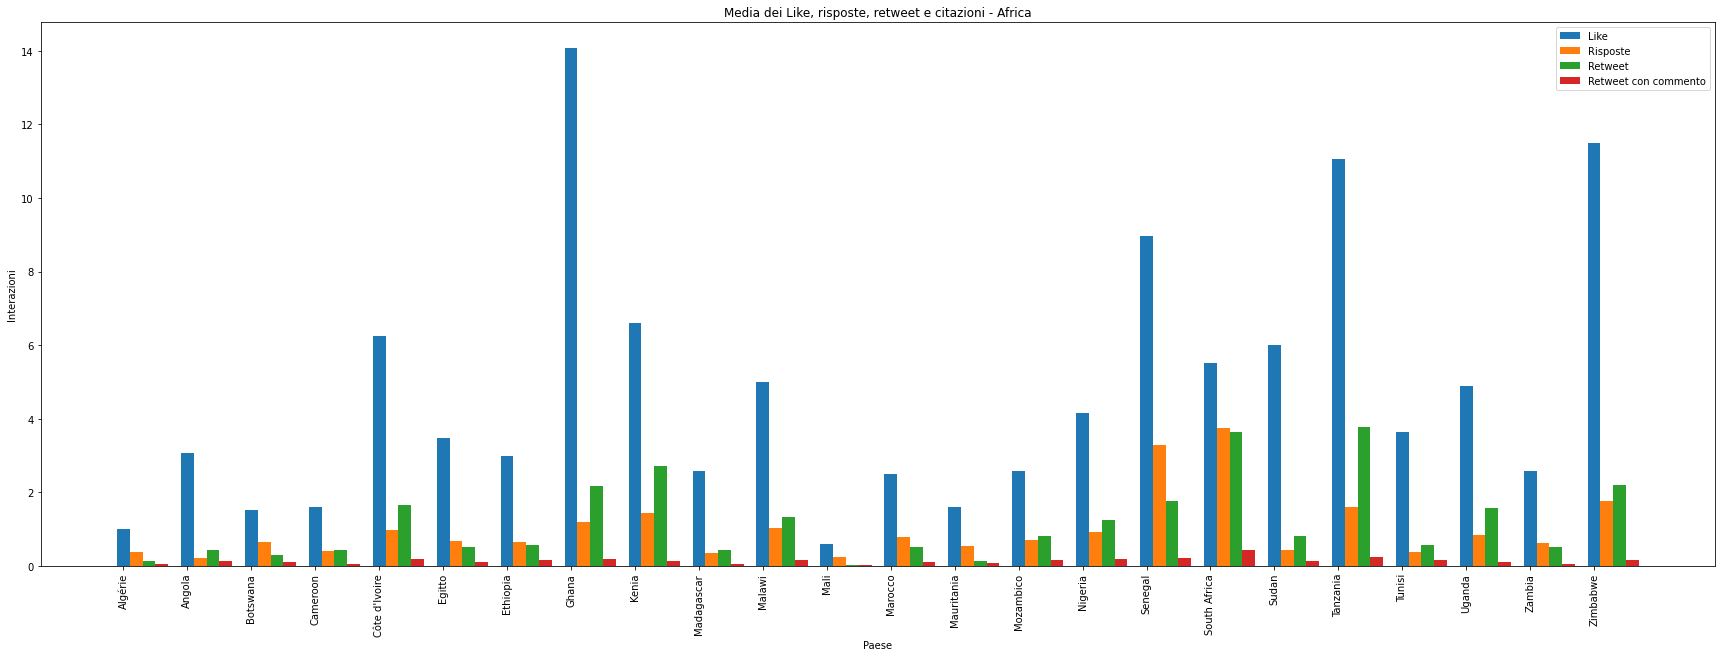

/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIF

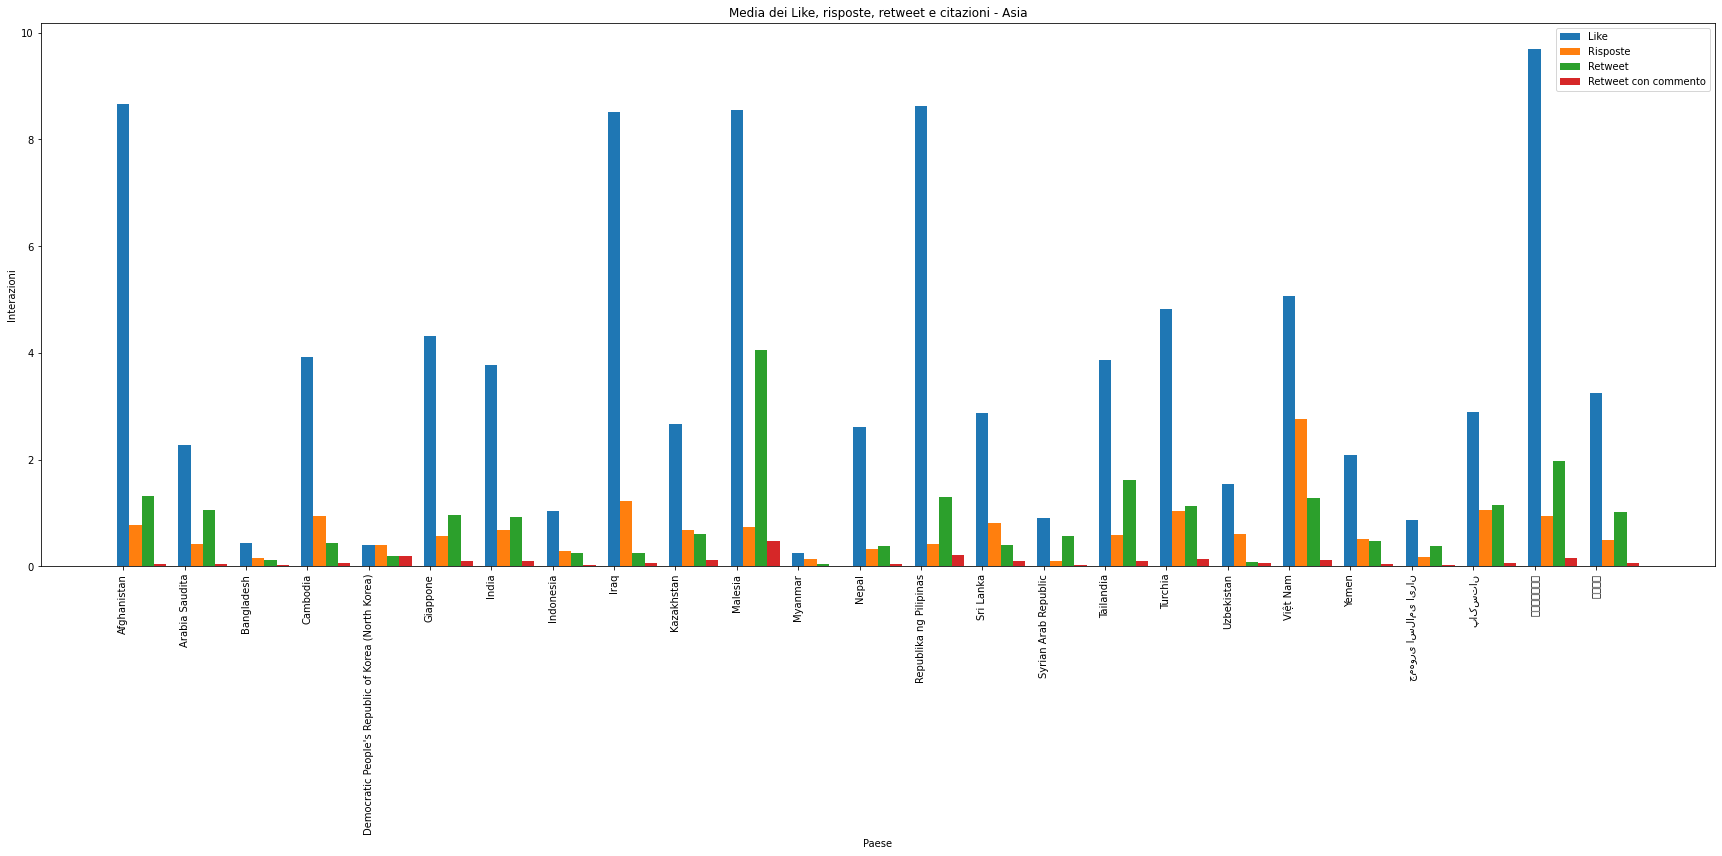

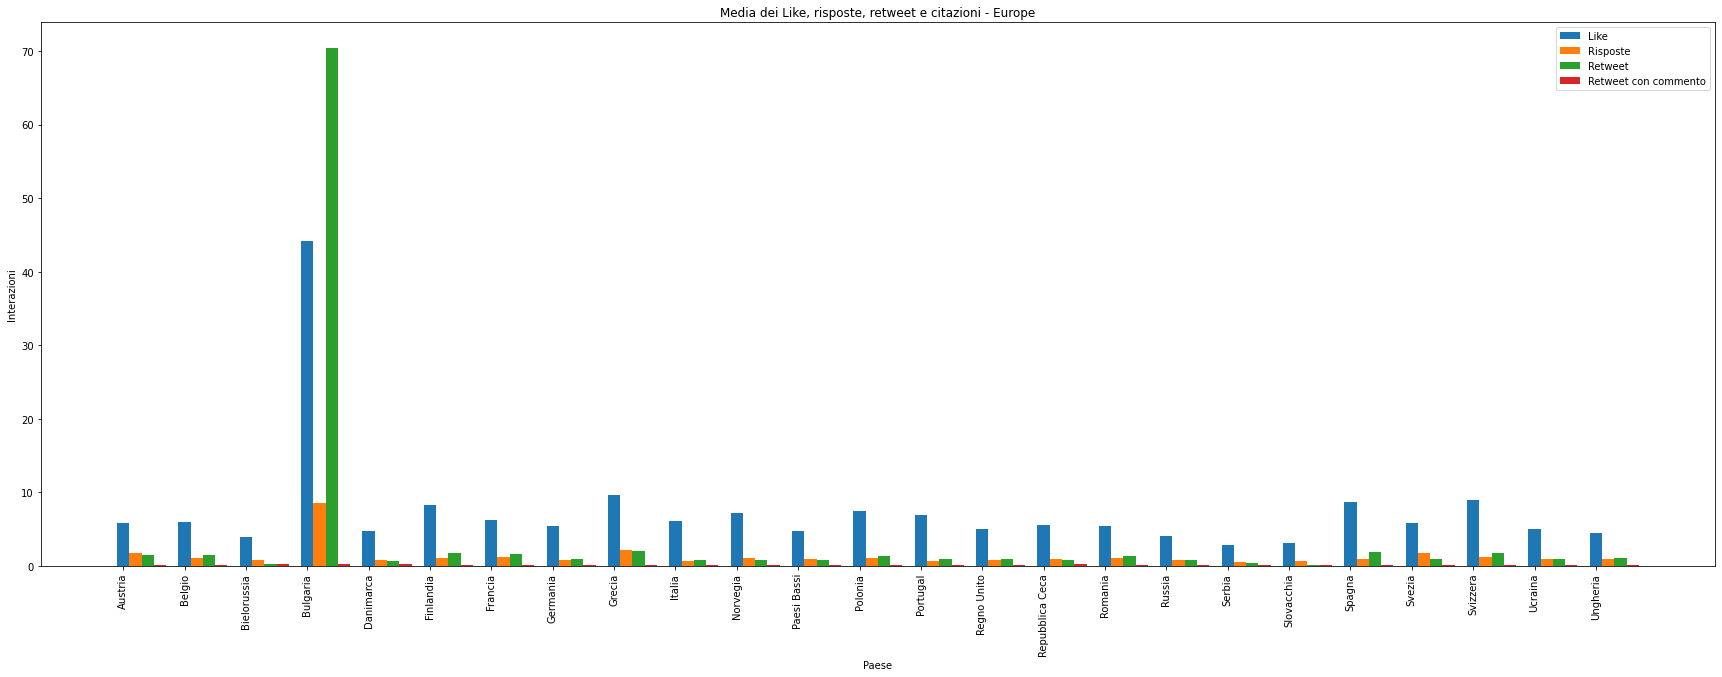

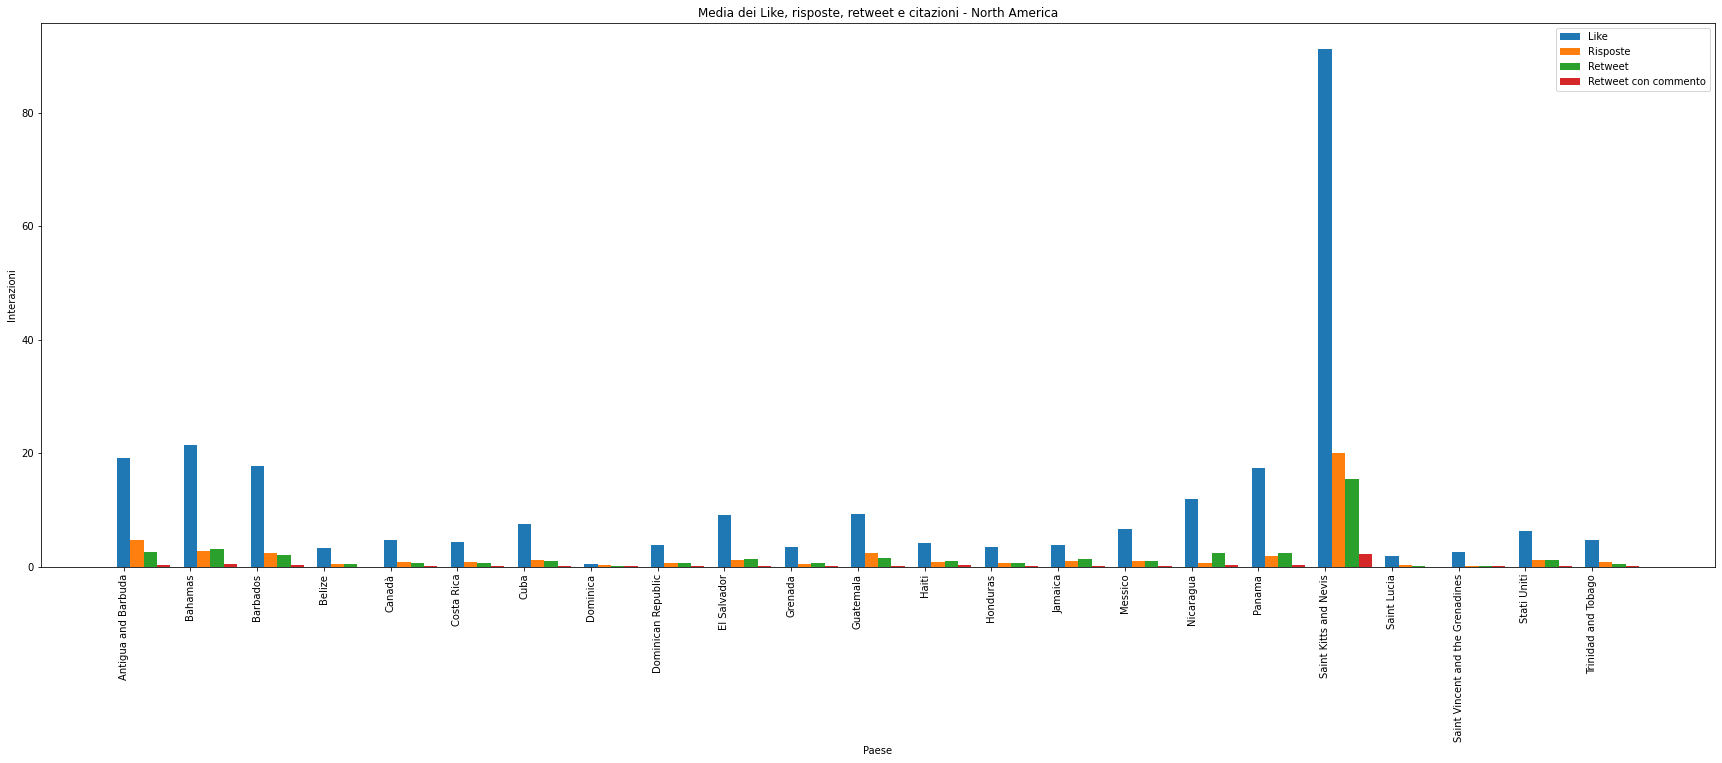

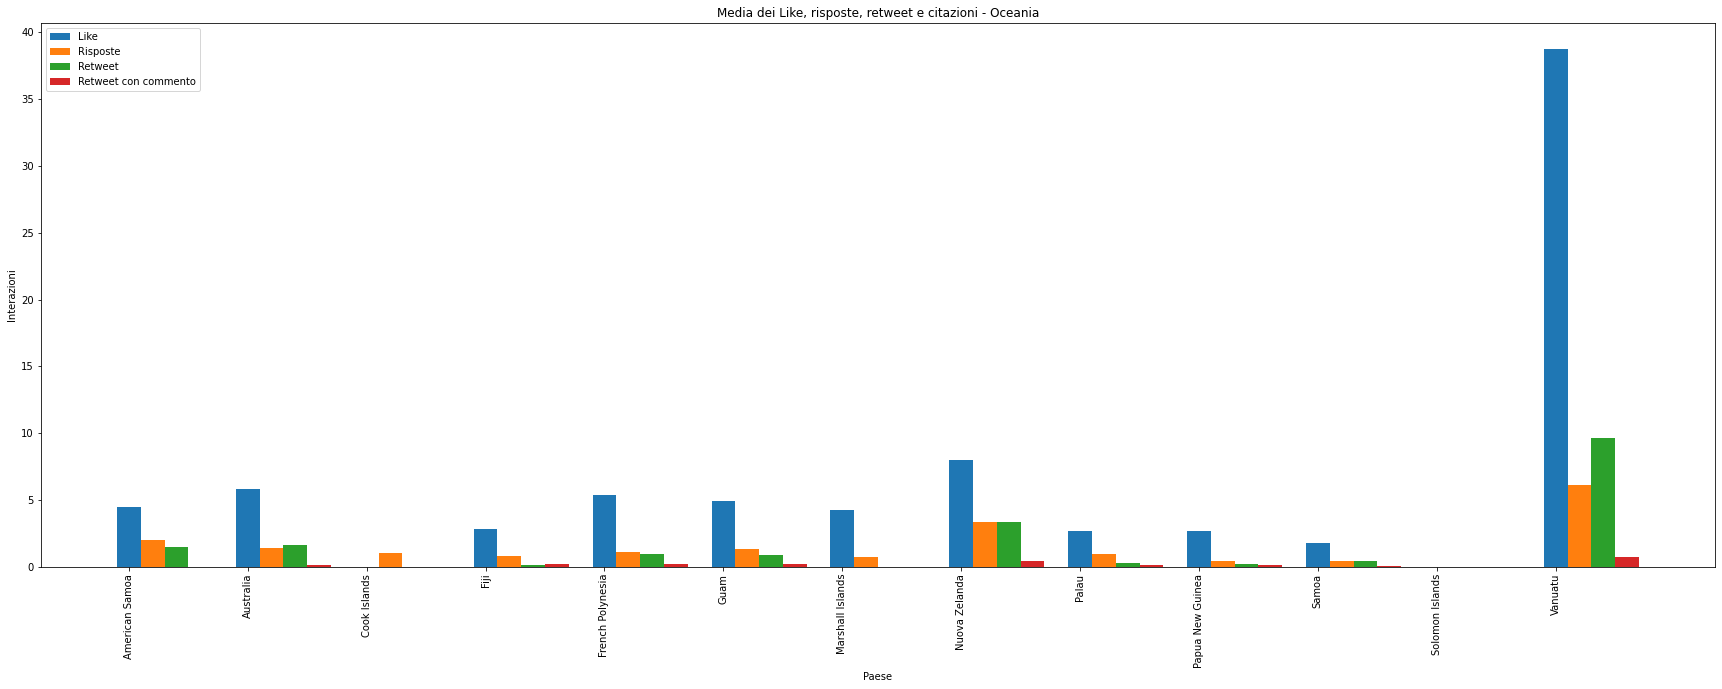

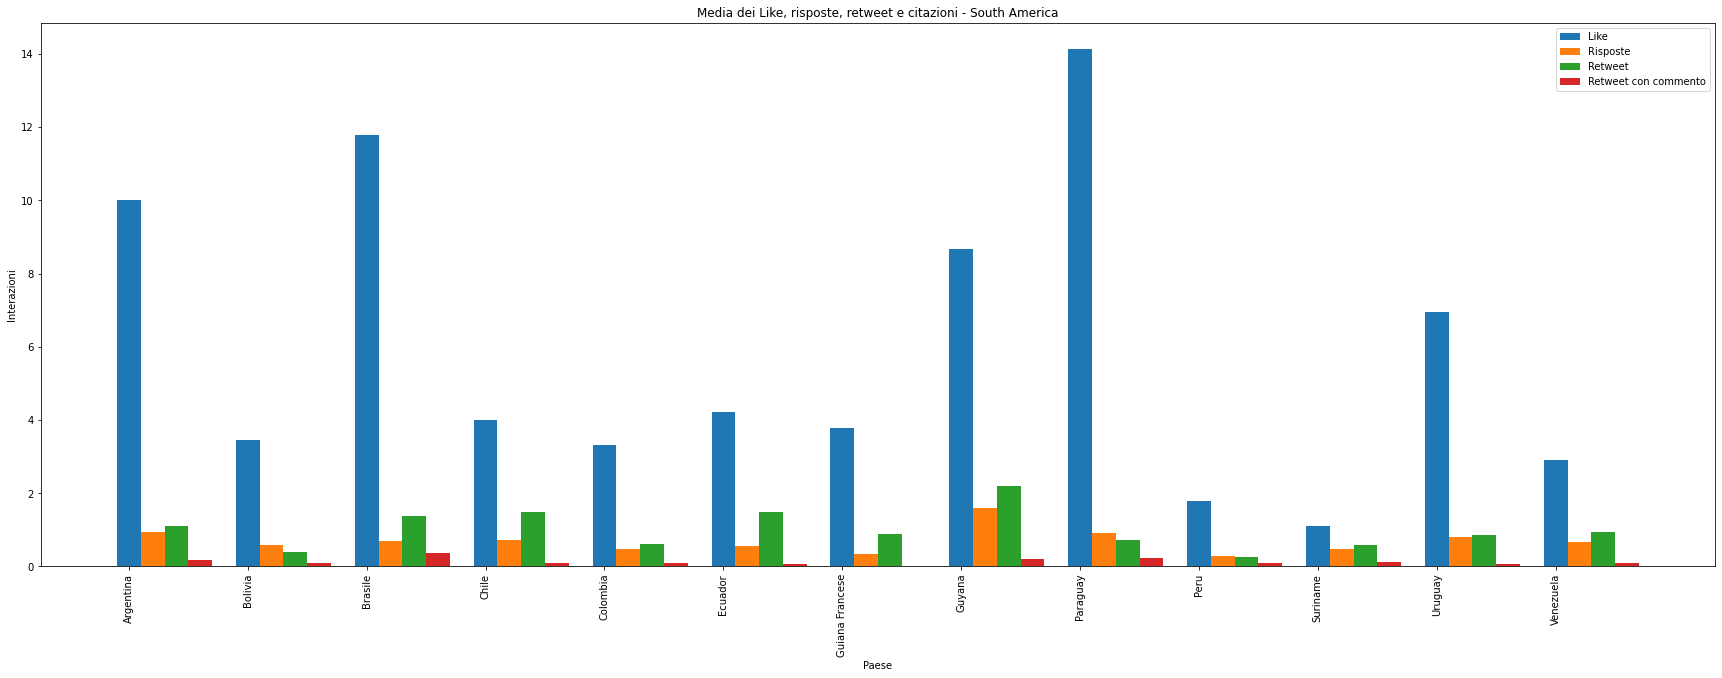

In [95]:
plot_continent_mean(df, grouped)

/Users/francesco/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


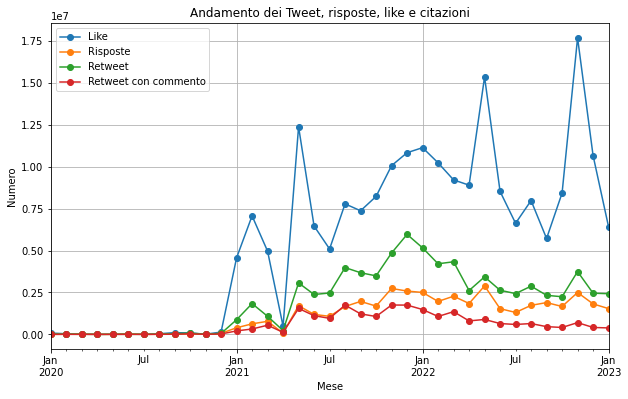

In [96]:
def plot_monthly_trends(df):
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['month'] = df['created_at'].dt.to_period('M')

    reply_counts = df['public_metrics.reply_count'].groupby(df['month']).sum()
    like_counts = df['public_metrics.like_count'].groupby(df['month']).sum()
    retweet_counts = df['public_metrics.retweet_count'].groupby(df['month']).sum()
    quote_counts = df['public_metrics.quote_count'].groupby(df['month']).sum()

    # Crea una figura e un'asse
    fig, ax = plt.subplots(figsize=(10, 6))
    like_counts.plot(kind='line', marker='o',  label='Like')
    reply_counts.plot(kind='line', marker='o', label='Risposte')
    retweet_counts.plot(kind='line',  marker='o', label='Retweet')
    quote_counts.plot(kind='line',  marker='o', label='Retweet con commento')
    ax.set_xlim(pd.Timestamp('2020-01-01'), None)
    #ax.set_ylim(0, 100)
    # Aggiungi etichette, titolo e legenda
    plt.xlabel('Mese')
    plt.ylabel('Numero')
    plt.title('Andamento dei Tweet, risposte, like e citazioni')
    plt.legend()
    plt.grid()

    # Mostra il grafico
    plt.show()

plot_monthly_trends(df)

In [97]:
#%pip install pycountry
#%pip install geopandas

In [98]:
# Mappatura dei casi speciali dei nomi dei paesi ai rispettivi country code a 2 caratteri
special_cases = {
    'United Republic of Tanzania': 'TZ',
    'United States of America': 'US',
    'Democratic Republic of the Congo': 'CD',
    'Russia': 'RU',
    'The Bahamas': 'BS',
    'Falkland Islands': 'FK',
    'French Southern and Antarctic Lands': 'TF',
    'East Timor': 'TL',
    'Bolivia': 'BO',
    'Venezuela': 'VE',
    'Ivory Coast': 'CI',
    'Republic of the Congo': 'CG',
    'Palestine': 'PS',
    'Laos': 'LA',
    'Vietnam': 'VN',
    'North Korea': 'KP',
    'South Korea': 'KR',
    'Iran': 'IR',
    'Syria': 'SY',
    'Moldova': 'MD',
    'Taiwan': 'TW',
    'Brunei': 'BN',
    'Northern Cyprus': 'CY',
    'Somaliland': 'XS',
    'Republic of Serbia': 'RS',
    'Kosovo': 'XK'
}
world_before = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
#world.head()

In [99]:
# Funzione per ottenere il country code a 2 caratteri dato il nome del paese
def get_country_code(country_name):
    if country_name in special_cases:
        return special_cases[country_name]
    country = pycountry.countries.get(name=country_name)
    if country is not None:
        return country.alpha_2
    return 'N/A'

# Applicazione della funzione get_country_code al DataFrame world per ottenere i country codes
world_before['country_code'] = world_before['ADMIN'].apply(get_country_code)

before = df[df['created_at'] <= '2022-04-30']

# Calcolo del numero di tweet per ogni paese
tweet_count_before = before['geo.country_code'].value_counts()

tweet_count_before.head()

tweet_counts_df = pd.DataFrame({'country_code': tweet_count_before.index, 'tweet_count': tweet_count_before.values})


# Merge tra il DataFrame world e tweet_counts_df utilizzando il country code come chiave
world_before = world_before.merge(tweet_counts_df, on='country_code', how='left')
#world_before.head()

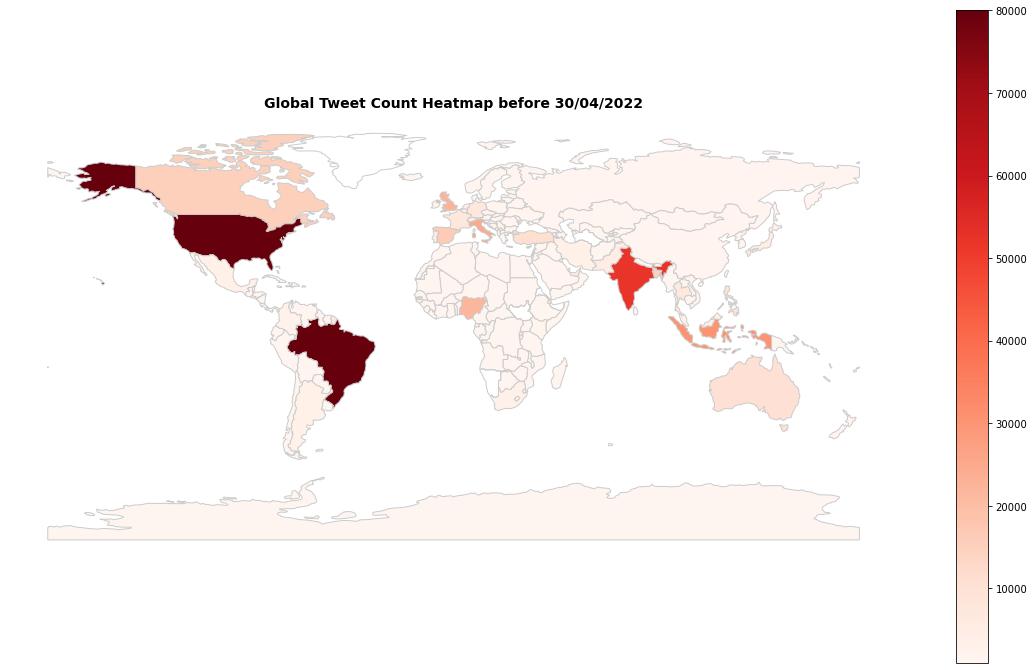

In [100]:
# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(20, 12))

# Personalizza la colormap
cmap = 'Reds'  # Colormap
cbar_label = 'Tweet Count'  # Etichetta della colorbar

# Imposta il limite massimo di intensità di colore
vmax = 80000  # Limite massimo di intensità di colore

# Disegna la heatmap con limite massimo di intensità di colore e valori mancanti bianchi
world_before.plot(column='tweet_count', cmap=cmap, linewidth=1, ax=ax, edgecolor='0.8', alpha=1, legend=True, vmax=vmax, vmin=1000, missing_kwds={'color': 'none'})

# Rimuovi gli assi
ax.set_axis_off()

# Aggiungi un titolo
ax.set_title('Global Tweet Count Heatmap before 30/04/2022', fontweight='bold', fontsize=14)

# Aggiungi una colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
#cbar = fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
#cbar.set_label(cbar_label, rotation=90)

# Mostra il plot
plt.show()

In [101]:
world_after = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Applicazione della funzione get_country_code al DataFrame world per ottenere i country codes
world_after['country_code'] = world_after['ADMIN'].apply(get_country_code)

after = df[df['created_at'] > '2022-04-30']

# Calcolo del numero di tweet per ogni paese
tweet_count_after = after['geo.country_code'].value_counts()

tweet_counts_df = pd.DataFrame({'country_code': tweet_count_after.index, 'tweet_count': tweet_count_after.values})
# Merge tra il DataFrame world e tweet_counts_df utilizzando il country code come chiave
world_after = world_after.merge(tweet_counts_df, on='country_code', how='left')
#world_after.head()

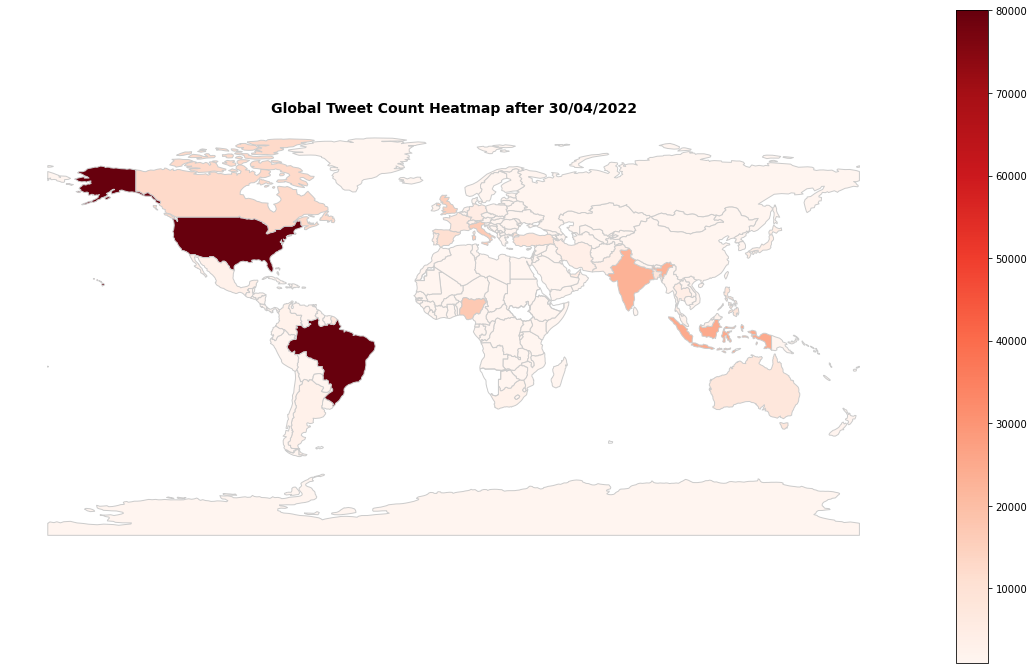

In [102]:
# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(20, 12))

# Personalizza la colormap
cmap = 'Reds'  # Colormap
cbar_label = 'Tweet Count'  # Etichetta della colorbar

# Imposta il limite massimo di intensità di colore
vmax = 80000  # Limite massimo di intensità di colore

# Disegna la heatmap con limite massimo di intensità di colore e valori mancanti bianchi
world_after.plot(column='tweet_count', cmap=cmap, linewidth=1, ax=ax, edgecolor='0.8', alpha=1, legend=True, vmax=vmax, vmin=1000, missing_kwds={'color': 'none'})

# Rimuovi gli assi
ax.set_axis_off()

# Aggiungi un titolo
ax.set_title('Global Tweet Count Heatmap after 30/04/2022', fontweight='bold', fontsize=14)

# Aggiungi una colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
#cbar = fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
#cbar.set_label(cbar_label, rotation=90)

# Mostra il plot
plt.show()

In [103]:
replies_df = df[df['in_reply_to_user_id'].notnull()]
interaction_counts = replies_df['in_reply_to_user_id'].value_counts()
interaction_counts = replies_df.groupby('in_reply_to_user_id').agg({
    'public_metrics.like_count': 'sum',
    'public_metrics.reply_count': 'sum',
    'public_metrics.retweet_count': 'sum',
    'public_metrics.quote_count': 'sum'
})
interaction_counts = interaction_counts.sort_values(by='public_metrics.like_count', ascending=False)


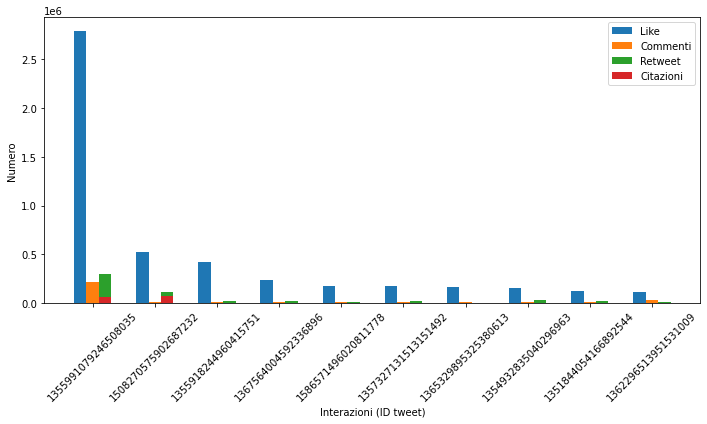

In [104]:
# Prendi i primi 10 valori da interaction_counts per il grafico
top_10_interactions = interaction_counts.head(10)

# Crea una figura e un'asse
fig, ax = plt.subplots(figsize=(10, 6))

# Crea le barre del grafico
bar_width = 0.2
index = range(len(top_10_interactions))
plt.bar(index, top_10_interactions['public_metrics.like_count'], bar_width, label='Like')
plt.bar([i + bar_width for i in index], top_10_interactions['public_metrics.reply_count'], bar_width, label='Commenti')
plt.bar([i + 2 * bar_width for i in index], top_10_interactions['public_metrics.retweet_count'], bar_width, label='Retweet')
plt.bar([i + 2 * bar_width for i in index], top_10_interactions['public_metrics.quote_count'], bar_width, label='Citazioni')

# Sostituisci gli ID degli utenti con gli ID dei tweet originali
tweet_ids = [df[df['in_reply_to_user_id'] == interaction]['id'].values[0] for interaction in top_10_interactions.index]
plt.xticks([i + bar_width for i in index], tweet_ids, rotation=45)

# Aggiungi etichette, titolo e legenda
plt.xlabel('Interazioni (ID tweet)')
plt.ylabel('Numero')
#plt.title('Numero di like, commenti, retweet e citazioni per ciascuna interazione')
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()


In [105]:
from tabulate import tabulate

# Prendi i primi 10 valori da interaction_counts per il grafico
top_10_interactions = interaction_counts.head(10)

# Sostituisci gli ID degli utenti con gli ID dei tweet originali
tweet_ids = [df[df['in_reply_to_user_id'] == interaction]['id'].values[0] for interaction in top_10_interactions.index]

# Prepara una lista di tuple contenente l'ID del tweet, l'ID del tweet a cui fa riferimento e il relativo testo
tweet_data = [(tweet_id, interaction, df[df['id'] == tweet_id]['text'].values[0]) for tweet_id, interaction in zip(tweet_ids, top_10_interactions.index)]

# Stampa la tabella dei tweet con l'ID, l'ID del tweet a cui fa riferimento e il testo
table = tabulate(tweet_data, headers=['ID del Tweet', 'ID del Tweet di Riferimento', 'Testo del Tweet'], tablefmt='grid')
print(table)


+----------------+-------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|   ID del Tweet |   ID del Tweet di Riferimento | Testo del Tweet                                                                                                                                                                                                                                                                                                          |
+================+===============================+==========================================================================================================================================================================================================================